## Tasks

### 1. Preliminary analysis

| Task    | Assigned to | Status |
|:----------------|:------------|:------:|
| What type of documents does it contain?  | Alberto | ✅ |
|       How many documents are there?       | Alberto | ✅ |
|       Calculate and visualise some simple statistics for the collection, e.g. the average document length, the average vocabulary size, etc.       | Tutti | ✅ |
|    BIO tagging for each file.       | Paolo | ✅ |
| Create datasets with sentences from the tagged dataset. | Paolo | ✅ |
| Create merged datasets | Paolo | ✅ |
| Cluster the documents and visualise the clusters to see what types of groups are present | Paolo | ✅ |
| Index the documents so that you can perform keyword search over them | Leonardo | ✅ |
| Train a Word2Vec embedding on the data and investigate the properties of the resulting embedding | Alberto | ✅ |


> **_KEY:_** [✅]() Completed [❌]() Not Completed

### 2. Training models

| Task    | Assigned to | Status |
|:----------------|:------------|:------:|
| CRF | Alberto | ✅ |
| POS tagging | Paolo o Alberto | ✅ |
| Gazzettes feature extraction | Paolo o Alberto | ✅ |
| Train a model to perform that task (by fine-tuning models on the training data)  | Leonardo | ✅ |
| Test pre-trained models on the task (if they already exist)                      | Paolo & Alberto | ✅ |
| Evaluate different models and compare their performance                          | All | ❌ |
> **_KEY:_** [✅]() Completed [❌]() Not Completed

> **_HINT_**: as a minimum here we would expect to see a linear classifier trained on the data (if an
appropriate for the task) and compare it with deep learning model, such as BERT.

### 3. Possible extensions

Depending on the dataset chosen there will be many additional investigations you can perform.
For instance, oftentimes we can improve performance of a model on a particular task by simply
including additional data that is related to the task in its training set. So see if you can find other
data that helps with the task that you chose. Moreover, there are many NLP challenges out
there, so if you can’t find more data for the task you’re working on, look for another interesting
challenge to work on.

# KIND - Kessler Italian Named-entities Dataset

`KIND (Kessler Italian Named-entities Dataset)` is an Italian dataset for Named-Entity Recognition (NER).

The purpose of NER task is to tag all the named entity, namely identify all the objects in the real world.

In this case there are three categories to annotate:
- person (PER): a single individual, an animal or a group of humans with a proper name;
- organization (ORG): every formally established association defined by an organizational structure;
- location (LOC): geographical entities defined by political and/or social groups which possess a physical location and a proper name.

The dataset is composed by four different collections with texts taken from: 
- Wikinews (WN) as a source of news texts, picking articles belonging to the last two decades; 
- Italian fiction books (FIC) in the public domain ; 
- writings and speeches from Italian politician Aldo Moro (AM);
- public documents written by Alcide De Gasperi (ADG).

The texts belong to three different domains: news, literature, and political discourses.

The dataset contains more than one million tokens, of which around 600K are manually annotated instead the remaining part is semi-automatically annotated.


| Dataset   | Documents |
| --------- | --------- |
| Wikinews  | 1,000 |
| Fiction | 86 |
| Aldo Moro | 250 |
|Alcide De Gasperi | 158 |

From the given datasets it is not possible to distinguish the different documents but only the sentences.

[Original repository with the datasets.](https://github.com/dhfbk/KIND)

[Original paper describing the datasets and tasks.](https://arxiv.org/pdf/2112.15099.pdf)

---

| The Overfitters    | PoliMi ID |
|:-------------------|:---------:|
|Pertino Paolo       | 10729600  |
|Pesce Leonardo      | 10659489  |
|Sandri Alberto      | 10698469  |

<br>

> **__Professor__** Mark James `transformer - robot + man`

> **__Teaching Assistant__** Vincenzo `Scotti`

## Table of Contents
* [0. Libraries](#libraries)
* [1. Data Import](#data-import)
    * [1.1 Merged Dataset generation](#merged-dataset-generation)
    * [1.2 Complete sentences generation](#complete-sentences-generation)
    * [1.3 BIO-tagging conversion](#bio-tagging-conversion)
* [2. Data Inspection](#data-inspection)
    * [2.1 Single dataset analysis](#single-dataset-analysis)
    * [2.2 Multiple dataset analysis](#multiple-dataset-analysis)
* [3. Vocabulary](#vocabulary)
    * [3.1 Single dataset vocabuary](#single-dataset-vocabulary)
    * [3.2 Multiple dataset vocabulary analysis](#multiple-datasets-vocabulary)
* [4. Clustering](#clustering)
    * [4.1 Documents vectorization](#documents-vectorization)
    * [4.2 KMeans algorithm](#kmeans-algorithm)
        * [4.2.1. Clusters visualization](#clusters-visualization)
        * [4.2.2. Topic modeling - c-TF-IDF](#topic-modeling---c-tf-idf)
        * [4.2.3. Topic modeling - LDA](#topic-modeling---lda)
        * [4.2.4. KMeans clustering final considerations](#kmeans-clustering-final-considerations)
* [5. Word embeddings](#word-embeddings)
    * [5.1 Word2Vec](#word2vec)
        * [5.1.1 Train Word2Vec](#train-Word2Vec)
        * [5.1.2 Properties](#properties)
    * [5.2 fastText](#fasttext) 
        * [5.2.1 Train fastText](#train-fastText)
        * [5.2.2 Properties](#properties)
* [6. Indexing](#indexing)
* [7. NER - Named Entity Recognition](#ner---named-entity-recognition)
    * [7.1 CRF - Conditional Random Fields](#crf---conditional-random-fields)
        * [7.1.1. Method overview](#method-overview)
        * [7.1.2. Cross-dataset performances evaluation](#cross-dataset-performances-evaluation)
        * [7.1.3. BIO-Tagging](#bio-tagging)
        * [7.1.4. POS-tagging gambit - Accepted variation](#crf---pos-tagging-gambit---accepted-variation)
    * [7.2 SpaCy](#spacy)
        * [7.2.1. SpaCy fine-tuning](#spacy-fine-tuning)
    * [7.3 Stanza](#stanza)
    * [7.4 BERTs](#berts)
        * [7.4.1. Dataset load](#dataset-load)
        * [7.4.2. Data preparation](#data-preparation)
        * [7.4.3. Model load](#model-load)
        * [7.4.4. Training arguments](#training-arguments)
        * [7.4.5. Tokenization](#tokenization)
        * [7.4.6 Data collator](#data-collator)
        * [7.4.7. seqeval metric](#seqeval-metric)
        * [7.4.8. Trainer](#trainer)
        * [7.4.9. Unfitted model performances](#unfitted-model-performances)
        * [7.4.10. alBERTo model training](#alberto-model-training)
        * [7.4.11. alBERTo performances evaluation](#alberto-performances-evaluation) 

## Libraries

After running this cell you have to restart the runtime, then you can skip this cell.

In [ ]:
!pip install datasets;
!pip install tokenizers;
!pip install transformers;
!pip install seqeval;
!pip install --upgrade accelerate;
!pip install umap-learn;
!pip install fasttext;
!pip install wordcloud;
!pip install git+https://github.com/MeMartijn/updated-sklearn-crfsuite.git; # version of crfsuite that works with eli5
!pip install eli5;
!pip install -q python-terrier;
!pip install stanza;
!pip install spacy;
!python -m spacy download it_core_news_sm;
!python -m spacy download it_core_news_lg;
!pip install --upgrade numpy==1.23.5; 

In [1]:
import csv
import io
import json
import os
import random
import re
import string
import sys
import locale
from collections import Counter

import eli5
import fasttext
import it_core_news_sm
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd  # USE PANDAS 1.5.1
import plotly.express as px
import plotly.graph_objects as go
import pyterrier as pt
import scipy.stats
import sklearn_crfsuite
import spacy
import stanza
import torch
import transformers
from datasets import Dataset, load_metric
from gensim.models.word2vec import Word2Vec
from IPython.display import display
from nltk.corpus import stopwords
from pandas.core.common import flatten
from plotly.subplots import make_subplots
from sklearn.cluster import KMeans
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.manifold import TSNE
from sklearn.metrics import (accuracy_score, adjusted_mutual_info_score,
                             adjusted_rand_score, classification_report,
                             completeness_score, f1_score, homogeneity_score,
                             make_scorer, precision_score, recall_score,
                             v_measure_score)
from sklearn.model_selection import (RandomizedSearchCV, cross_val_score,
                                     train_test_split)
from sklearn.preprocessing import LabelEncoder
from sklearn_crfsuite import scorers
from sklearn_crfsuite.metrics import flat_classification_report, flat_f1_score
from spacy import displacy
from spacy.tokens import Doc, DocBin
from spacy.training import Example
from tqdm import tqdm
from transformers import (AutoModel, AutoModelForTokenClassification,
                          AutoTokenizer, BertModel, BertTokenizer,
                          DataCollatorForTokenClassification, Trainer,
                          TrainingArguments, pipeline)
from umap import \
    UMAP  # if error on this import, downgrade numpy to 1.23.5 by using: pip install --upgrade numpy==1.23.5
from wordcloud import WordCloud
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

locale.getpreferredencoding = lambda: "UTF-8"

random.seed(0) # for reproducibility

nltk.download('stopwords')
nltk.download('punkt')

# Italian stopwords
italian_stopwords_extended = set(['a','abbastanza','abbia','abbiamo','abbiano','abbiate','accidenti','ad','adesso','affinché','agl','agli','ahime','ahimè','ai','al','alcuna','alcuni','alcuno','all','alla','alle','allo','allora','altre','altri','altrimenti','altro','altrove','altrui','anche','ancora','anni','anno','ansa','anticipo','assai','attesa','attraverso','avanti','avemmo','avendo','avente','aver','avere','averlo','avesse','avessero','avessi','avessimo','aveste','avesti','avete','aveva','avevamo','avevano','avevate','avevi','avevo','avrai','avranno','avrebbe','avrebbero','avrei','avremmo','avremo','avreste','avresti','avrete','avrà','avrò','avuta','avute','avuti','avuto','basta','ben','bene','benissimo','brava','bravo','buono','c','caso','cento','certa','certe','certi','certo','che','chi','chicchessia','chiunque','ci','ciascuna','ciascuno','cima','cinque','cio','cioe','cioè','circa','citta','città','ciò','co','codesta','codesti','codesto','cogli','coi','col','colei','coll','coloro','colui','come','cominci','comprare','comunque','con','concernente','conclusione','consecutivi','consecutivo','consiglio','contro','cortesia','cos','cosa','cosi','così','cui','d','da','dagl','dagli','dai','dal','dall','dalla','dalle','dallo','dappertutto','davanti','degl','degli','dei','del','dell','della','delle','dello','dentro','detto','deve','devo','di','dice','dietro','dire','dirimpetto','diventa','diventare','diventato','dopo','doppio','dov','dove','dovra','dovrà','dovunque','due','dunque','durante','e','ebbe','ebbero','ebbi','ecc','ecco','ed','effettivamente','egli','ella','entrambi','eppure','era','erano','eravamo','eravate','eri','ero','esempio','esse','essendo','esser','essere','essi','ex','fa','faccia','facciamo','facciano','facciate','faccio','facemmo','facendo','facesse','facessero','facessi','facessimo','faceste','facesti','faceva','facevamo','facevano','facevate','facevi','facevo','fai','fanno','farai','faranno','fare','farebbe','farebbero','farei','faremmo','faremo','fareste','faresti','farete','farà','farò','fatto','favore','fece','fecero','feci','fin','finalmente','finche','fine','fino','forse','forza','fosse','fossero','fossi','fossimo','foste','fosti','fra','frattempo','fu','fui','fummo','fuori','furono','futuro','generale','gente','gia','giacche','giorni','giorno','giu','già','gli','gliela','gliele','glieli','glielo','gliene','grande','grazie','gruppo','ha','haha','hai','hanno','ho','i','ie','ieri','il','improvviso','in','inc','indietro','infatti','inoltre','insieme','intanto','intorno','invece','io','l','la','lasciato','lato','le','lei','li','lo','lontano','loro','lui','lungo','luogo','là','ma','macche','magari','maggior','mai','male','malgrado','malissimo','me','medesimo','mediante','meglio','meno','mentre','mesi','mezzo','mi','mia','mie','miei','mila','miliardi','milioni','minimi','mio','modo','molta','molti','moltissimo','molto','momento','mondo','ne','negl','negli','nei','nel','nell','nella','nelle','nello','nemmeno','neppure','nessun','nessuna','nessuno','niente','no','noi','nome','non','nondimeno','nonostante','nonsia','nostra','nostre','nostri','nostro','novanta','nove','nulla','nuovi','nuovo','o','od','oggi','ogni','ognuna','ognuno','oltre','oppure','ora','ore','osi','ossia','ottanta','otto','paese','parecchi','parecchie','parecchio','parte','partendo','peccato','peggio','per','perche','perchè','perché','percio','perciò','perfino','pero','persino','persone','però','piedi','pieno','piglia','piu','piuttosto','più','po','pochissimo','poco','poi','poiche','possa','possedere','posteriore','posto','potrebbe','preferibilmente','presa','press','prima','primo','principalmente','probabilmente','promesso','proprio','puo','pure','purtroppo','può','qua','qualche','qualcosa','qualcuna','qualcuno','quale','quali','qualunque','quando','quanta','quante','quanti','quanto','quantunque','quarto','quasi','quattro','quel','quella','quelle','quelli','quello','quest','questa','queste','questi','questo','qui','quindi','quinto','realmente','recente','recentemente','registrazione','relativo','riecco','rispetto','salvo','sara','sarai','saranno','sarebbe','sarebbero','sarei','saremmo','saremo','sareste','saresti','sarete','sarà','sarò','scola','scopo','scorso','se','secondo','seguente','seguito','sei','sembra','sembrare','sembrato','sembrava','sembri','sempre','senza','sette','si','sia','siamo','siano','siate','siete','sig','solito','solo','soltanto','sono','sopra','soprattutto','sotto','spesso','sta','stai','stando','stanno','starai','staranno','starebbe','starebbero','starei','staremmo','staremo','stareste','staresti','starete','starà','starò','stata','state','stati','stato','stava','stavamo','stavano','stavate','stavi','stavo','stemmo','stessa','stesse','stessero','stessi','stessimo','stesso','steste','stesti','stette','stettero','stetti','stia','stiamo','stiano','stiate','sto','su','sua','subito','successivamente','successivo','sue','sugl','sugli','sui','sul','sull','sulla','sulle','sullo','suo','suoi','tale','tali','talvolta','tanto','te','tempo','terzo','th','ti','titolo','tra','tranne','tre','trenta','triplo','troppo','trovato','tu','tua','tue','tuo','tuoi','tutta','tuttavia','tutte','tutti','tutto','uguali','ulteriore','ultimo','un','una','uno','uomo','va','vai','vale','vari','varia','varie','vario','verso','vi','vicino','visto','vita','voi','volta','volte','vostra','vostre','vostri','vostro','è','ch', 'disse'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
RunningInCOLAB = 'google.colab' in str(get_ipython()) if hasattr(__builtins__,'__IPYTHON__') else False

if RunningInCOLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    import os
    os.chdir('/content/drive/MyDrive/Colab Notebooks/NLP/KIND-main')
    os.getcwd()

    print("Colab environment detected. Paths have been set.")
else:
    print("You are not running in Google Colab. Skipping this step...")

Mounted at /content/drive
Colab environment detected. Paths have been set.


## Data Import

In this section we manipulate the datasets provided to get the full sentences that have been annotated by the original authors and to get new datasets with additional tags.

### Directories generation

First we create the directories if they do not exist.

In [ ]:
os.mkdir(os.path.join(os.getcwd(), 'dataset')) if not os.path.exists(os.path.join(os.getcwd(), 'dataset')) else None
os.mkdir(os.path.join(os.getcwd(), 'dataset/txt-version')) if not os.path.exists(os.path.join(os.getcwd(), 'dataset/txt-version')) else None
os.mkdir(os.path.join(os.getcwd(), 'dataset/BIO-tagged-version')) if not os.path.exists(os.path.join(os.getcwd(), 'dataset/BIO-tagged-version')) else None
os.mkdir(os.path.join(os.getcwd(), 'dataset/POS-tagged-version')) if not os.path.exists(os.path.join(os.getcwd(), 'dataset/POS-tagged-version')) else None
os.mkdir(os.path.join(os.getcwd(), 'dataset/spacy-train')) if not os.path.exists(os.path.join(os.getcwd(), 'dataset/spacy-train')) else None
os.mkdir(os.path.join(os.getcwd(), 'dataset/BILUO-tagged-version')) if not os.path.exists(os.path.join(os.getcwd(), 'dataset/BILUO-tagged-version')) else None

### Merged dataset generation

We want to provide an additional dataset in which the content of all the files is merged together. This will be useful for the subsequent tasks.

First we merge the initial `.tsv` train files:

In [ ]:
# Get the list of files in the dataset directory
dataset_dir = os.path.join(os.getcwd(), 'dataset')
dataset_files = os.listdir(dataset_dir)

# Merging all train.tsv files together
content = ""
for file in tqdm(dataset_files):
    # We are dealing with the train.tsv files only
    if file.endswith('test.tsv') or not file.endswith('.tsv'):
        continue

    file_path = os.path.join(dataset_dir, file)  

    # Read the content of the file and appending it to the content variable
    with open(file_path, 'r') as f:
        content += f.read()
    
# Write the merged content back to the file if it doesn't exist already
if not os.path.exists(f'{dataset_dir}/merged_dataset_train.tsv'):
    with open(f'{dataset_dir}/merged_dataset_train.tsv', 'w') as f:
        f.write(content)

100%|██████████| 12/12 [00:00<00:00, 356.78it/s]


Now we do the same for the test files:

In [ ]:
# Get the list of files in the dataset directory
dataset_dir = os.path.join(os.getcwd(), 'dataset')
dataset_files = os.listdir(dataset_dir)

# Merging all test.tsv files together
content = ""
for file in tqdm(dataset_files):
    # We are dealing with the test.tsv files only
    if file.endswith('train.tsv') or not file.endswith('.tsv'):
        continue

    file_path = os.path.join(dataset_dir, file)  

    # Read the content of the file and appending it to the content variable
    with open(file_path, 'r') as f:
        content += f.read()
    
# Write the merged content back to the file if it doesn't exist already
if not os.path.exists(f'{dataset_dir}/merged_dataset_test.tsv'):
    with open(f'{dataset_dir}/merged_dataset_test.tsv', 'w') as f:
        f.write(content)

100%|██████████| 13/13 [00:00<00:00, 2404.35it/s]


### Complete sentences generation

Now for each train and test `.tsv` file we want to retrieve the compact form of the sentences that have been annotated by the original authors.

For each file, sentences have been reconstructed and allocated one-for-row in the corresponding `.txt` file.

In [ ]:
# Get the list of files in the dataset directory
dataset_dir = os.path.join(os.getcwd(), 'dataset')
dataset_files = os.listdir(dataset_dir)

# For each file in the dataset directory split the content when finding empty lines
for file in tqdm(dataset_files):
    # Do not read txt files
    if not file.endswith('.tsv'):
        continue

    # Get the .tsv file path
    file_path = os.path.join(dataset_dir, file)

    # Inserting the content of the tsv file into a dataframe keeping the blank lines (i.e. the end of a sentence)
    data_df = pd.read_csv(file_path, sep='\t', names=['Word', 'Entity'], skip_blank_lines=False, quoting=csv.QUOTE_NONE)

    # Replace NaN values with a new line (\n) to mark the beginning of a new phrase
    data_df.fillna('\n', inplace=True)
    
    # Reconsetructing the sentences by joining the words together
    sentences = " ".join(data_df['Word']).replace('\n ', '\n') #.replace(' .', '.').replace(' ,', ',').replace(' !', '!').replace(' ?', '?').replace(' :', ':').replace(' ;', ';').replace(' %', '%').replace(' )', ')').replace('( ', '(').replace(' ]', ']').replace('[ ', '[').replace(' }', '}').replace('{ ', '{')
    
    # Write the content back to a text file if it doesn't exist already
    output_file_path = f"{os.path.join(os.getcwd(), 'dataset/txt-version')}/{file[:-3] + 'txt'}"
    if not os.path.exists(output_file_path):
        with open(output_file_path , 'w') as f:
            f.write(sentences)

100%|██████████| 14/14 [00:01<00:00, 10.76it/s]


### Bio tagging conversion

Next, we convert into BIO-tagging format the entities in the datasets:
- `B` indicates that the tag is the beginning of a chunk of tags all referred to the same entity;
- `I` indicates that the tag is inside a chunk;
- `O` indicates that the tag is outside a chunk. 


In [ ]:
o_tag = "O"
types = set()
count = {}

# Dictionary of input and output files names
files = {
	"wikinews_train.tsv": "WN_train.tsv",
	"wikinews_test.tsv": "WN_test.tsv",
	"fiction_train.tsv": "FIC_train.tsv",
	"fiction_test.tsv": "FIC_test.tsv",
	"degasperi_train.tsv": "ADG_train.tsv",
	"degasperi_test.tsv": "ADG_test.tsv",
	"moro_train.tsv": "AM_train.tsv",
	"moro_test.tsv": "AM_test.tsv",
	"merged_dataset_train.tsv": "MERGED_train.tsv",
	"merged_dataset_test.tsv": "MERGED_test.tsv",
}

for file in tqdm(files):
	with open(f"{os.path.join(os.getcwd(), 'dataset')}/{file}", "r") as f:
		# Getting the output file name related to the current file
		out_file = files[file]
		count[out_file] = {"sentences": 0, "tags": {}, "tokens": 0}

		sentences = []
		current_sentence = []

		for line in f:
			line = line.strip()
			if len(line) == 0:
				if len(current_sentence) > 0:
					sentences.append(current_sentence)
					current_sentence = []
				continue
			parts = line.split("\t")
			current_sentence.append(parts)
			count[out_file]["tokens"] += 1

		if len(current_sentence) > 0:
			sentences.append(current_sentence)

		count[out_file]["sentences"] = len(sentences)

		# BIO tagging conversion. The first non-O tag after a sequence of O-tags is converted to B-tag.
		# The following non-O tags (the ones that follow the B-tag) are converted to I-tags until
		# an O-tag is found. The same procedure is repeated for each sequence of non-O tags
		for sentence in sentences:
			previous_ner = o_tag
			for token in sentence:
				ner = token[1]
				new_ner = ner
				if ner != o_tag:
					if previous_ner != ner:
						if ner not in count[out_file]["tags"]:
							count[out_file]["tags"][ner] = 0
						new_ner = "B-" + ner
						count[out_file]["tags"][ner] += 1
						types.add(ner)
					else:
						new_ner = "I-" + ner
				token[1] = new_ner
				previous_ner = ner

		# Writing the converted file into the appropriate directory if it doesn't exist already
		if not os.path.exists(f"{os.path.join(os.getcwd(), 'dataset/BIO-tagged-version')}/{out_file}"):
			with open(f"{os.path.join(os.getcwd(), 'dataset/BIO-tagged-version')}/{out_file}", "w") as fw:
				for sentence in sentences:
					for token in sentence:
						fw.write(token[0])
						fw.write("\t")
						fw.write(token[1])
						fw.write("\n")
					fw.write("\n")

100%|██████████| 10/10 [00:06<00:00,  1.58it/s]


### BILUO-tagging

From the BIO-tagged files just created we'll generate their BILUO-version.
The additional tags are:
- `L` indicates that the tag is the last of a chunk;
- `U` indicates that the chunk is unit-length.

In [ ]:
if not os.path.exists(os.path.join(os.getcwd(), 'dataset/spacy-train/ADG_train.spacy')):
    !python -m spacy convert ./dataset/BIO-tagged-version/ADG_train.tsv ./dataset/spacy-train -c ner
    !python -m spacy convert ./dataset/BIO-tagged-version/ADG_train.tsv ./dataset/spacy-train -c ner -t json
if not os.path.exists(os.path.join(os.getcwd(), 'dataset/spacy-train/AM_train.spacy')):
    !python -m spacy convert ./dataset/BIO-tagged-version/AM_train.tsv ./dataset/spacy-train -c ner
    !python -m spacy convert ./dataset/BIO-tagged-version/AM_train.tsv ./dataset/spacy-train -c ner -t json
if not os.path.exists(os.path.join(os.getcwd(), 'dataset/spacy-train/FIC_train.spacy')):
    !python -m spacy convert ./dataset/BIO-tagged-version/FIC_train.tsv ./dataset/spacy-train -c ner
    !python -m spacy convert ./dataset/BIO-tagged-version/FIC_train.tsv ./dataset/spacy-train -c ner -t json
if not os.path.exists(os.path.join(os.getcwd(), 'dataset/spacy-train/MERGED_train.spacy')):
    !python -m spacy convert ./dataset/BIO-tagged-version/MERGED_train.tsv ./dataset/spacy-train -c ner
    !python -m spacy convert ./dataset/BIO-tagged-version/MERGED_train.tsv ./dataset/spacy-train -c ner -t json
if not os.path.exists(os.path.join(os.getcwd(), 'dataset/spacy-train/WN_train.spacy')):
    !python -m spacy convert ./dataset/BIO-tagged-version/WN_train.tsv ./dataset/spacy-train -c ner
    !python -m spacy convert ./dataset/BIO-tagged-version/WN_train.tsv ./dataset/spacy-train -c ner -t json
if not os.path.exists(os.path.join(os.getcwd(), 'dataset/spacy-train/ADG_test.spacy')):
    !python -m spacy convert ./dataset/BIO-tagged-version/ADG_test.tsv ./dataset/spacy-train -c ner
    !python -m spacy convert ./dataset/BIO-tagged-version/ADG_test.tsv ./dataset/spacy-train -c ner -t json
if not os.path.exists(os.path.join(os.getcwd(), 'dataset/spacy-train/AM_test.spacy')): 
    !python -m spacy convert ./dataset/BIO-tagged-version/AM_test.tsv ./dataset/spacy-train -c ner
    !python -m spacy convert ./dataset/BIO-tagged-version/AM_test.tsv ./dataset/spacy-train -c ner -t json
if not os.path.exists(os.path.join(os.getcwd(), 'dataset/spacy-train/FIC_test.spacy')):
    !python -m spacy convert ./dataset/BIO-tagged-version/FIC_test.tsv ./dataset/spacy-train -c ner
    !python -m spacy convert ./dataset/BIO-tagged-version/FIC_test.tsv ./dataset/spacy-train -c ner -t json
if not os.path.exists(os.path.join(os.getcwd(), 'dataset/spacy-train/MERGED_test.spacy')):
    !python -m spacy convert ./dataset/BIO-tagged-version/MERGED_test.tsv ./dataset/spacy-train -c ner
    !python -m spacy convert ./dataset/BIO-tagged-version/MERGED_test.tsv ./dataset/spacy-train -c ner -t json
if not os.path.exists(os.path.join(os.getcwd(), 'dataset/spacy-train/WN_test.spacy')):  
    !python -m spacy convert ./dataset/BIO-tagged-version/WN_test.tsv ./dataset/spacy-train -c ner 
    !python -m spacy convert ./dataset/BIO-tagged-version/WN_test.tsv ./dataset/spacy-train -c ner -t json

In [ ]:
spacy_dir = os.path.join(os.getcwd(), 'dataset/spacy-train/')
biluo_dir = os.path.join(os.getcwd(), 'dataset/BILUO-tagged-version/')
spacy_json_files = os.listdir(spacy_dir)

for file in tqdm(spacy_json_files):
    if file.endswith('.json'):
        if not os.path.exists(os.path.join(biluo_dir, file[:-4] + 'tsv')):
            with open(os.path.join(spacy_dir, file), 'r') as f, open(os.path.join(biluo_dir, file[:-4] + 'tsv'), 'w') as biluo:
                data = json.load(f)

                for dataset in data:
                    for sentence in dataset.get('paragraphs'):
                        for sentence_elems in sentence.get('sentences'):
                            for token in sentence_elems.get('tokens'):
                                biluo.write(f"{token.get('orth')}\t{token.get('ner')}\n")
                            biluo.write('\n')
        else:
            continue
    else:
        continue

100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


### Part-of-Speech tagging

Finally, for each train and test dataset we create a file containing the `Part-of-Speech tagging` of the sentences.

To do so we will use the `spaCy` library that provides a pre-trained model for the Italian language.

In [ ]:
# Loading the downloaded italian model
it_spacy_model = spacy.load("it_core_news_lg")

In [ ]:
def sentences_transform(data_df : pd.DataFrame) -> list:
  """
  Given in input a dataframe containing words and entities,
  returns a list of tuples where each tuple is associated to a sentence
  and has as first element a list of words which compose the sentence, 
  as second element a list of associated entities and as third element
  the full sentence corpus as string.

  Args:
  -----
      `data_df` (`pd.DataFrame`): dataframe containing words and corresponding entities.

  Returns:
  --------
      `list`: list of tuples in which the first element is a list of words,
      the second the corresponding list of words' entities and the third is 
      the string of the sentence itself.
  """

  # Group the DataFrame by sentence using the '\n' separator
  grouped = data_df.groupby(data_df['Word'].eq('\n').cumsum())

  # Iterate over the groups and concatenate the words and tags into sentences
  sentences = []
  for _, group in grouped:
      sentence = ' '.join(group['Word'])
      tags = ' '.join(group['Entity'])
      sentences.append((sentence.strip().split(), tags.strip().split(), sentence.strip()))
      
  return sentences

In [ ]:
tsv_dataset_dir = os.path.join(os.getcwd(), 'dataset')
tsv_dataset_files = os.listdir(tsv_dataset_dir)
tsv_dataset_files = [file for file in tsv_dataset_files if file.endswith('.tsv')]
pos_dataset_dir = os.path.join(os.getcwd(), 'dataset/POS-tagged-version')

for file in tqdm(tsv_dataset_files):
    file_path = os.path.join(tsv_dataset_dir, file)  
    output_file_path = os.path.join(pos_dataset_dir, file)

    # Read the content of the file and appending it to the content variable
    input_file = pd.read_csv(file_path, sep='\t', names=['Word', 'Entity'], skip_blank_lines = False, quoting=csv.QUOTE_NONE)
    input_file.fillna('\n', inplace=True)
    file_sentences = sentences_transform(input_file)

    # Using spaCy with custom tokenization to extract the POS tags and write them to file
    with open(output_file_path, 'w') as f:
        for i, sentence in enumerate(file_sentences):
            current_words = sentence[0]
            current_spaces = [True for _ in range(len(current_words))]

            # After the last word there are no spaces
            try:
                current_spaces[-1] = False
            except IndexError:
                current_spaces = None

            doc = Doc(it_spacy_model.vocab, words=current_words, spaces=current_spaces)
            parsed_doc = it_spacy_model(doc)

            for token in parsed_doc:
                f.write(f"{token.text}\t{token.pos_}\n")
            
            if i < len(file_sentences) - 1:
                f.write('\n')

## Data inspection

Here we do some preliminary analysis by inspecting the content of the datasets.

### Single dataset analysis

Let's analyze a single dataset, we take `degasperi_train.tsv`

In [ ]:
# Path of file degasperi_train.tsv
file_path = os.path.join(os.getcwd(), 'dataset/degasperi_train.tsv')

# Each row of the dataframe is a word with associated type of entity
data_df = pd.read_csv(file_path, sep='\t', names=['Word', 'Entity'])

In [ ]:
# See the first elements
data_df.head()

,Word,Entity
0,Il,O
1,ministro,O
2,degli,O
3,Esteri,O
4,al,O


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123504 entries, 0 to 123503
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Word    123504 non-null  object
 1   Entity  123504 non-null  object
dtypes: object(2)
memory usage: 1.9+ MB


All elements are not null. 

In this dataset there are 123504 word-entity pairs.

In [ ]:
data_df.describe()

,Word,Entity
count,123504,123504
unique,15449,4
top,",",O
freq,6200,118933


As said before there are 4 possible tags for the entities and the most frequent one is the `O` tag.

In [ ]:
data_df[:15]

,Word,Entity
0,Il,O
1,ministro,O
2,degli,O
3,Esteri,O
4,al,O
5,commissario,O
6,capo,O
7,della,O
8,Commissione,ORG
9,alleata,ORG


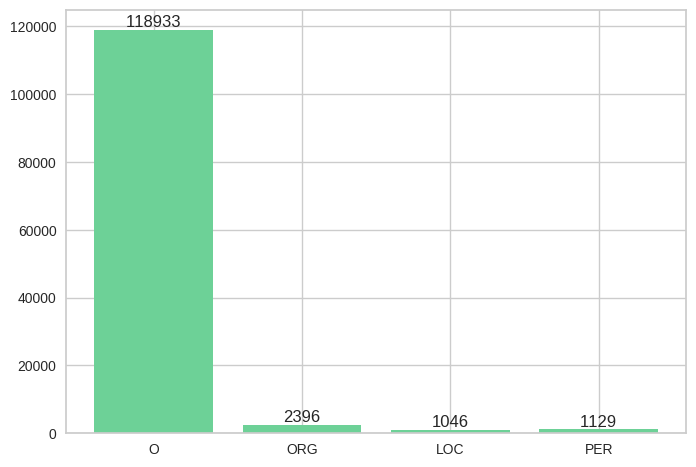

In [ ]:
counts_entity = Counter(data_df['Entity'])

plt.bar(counts_entity.keys(), counts_entity.values(), color="#6dd197", width=0.8)

# Add the values to the plot
for i, value in enumerate(counts_entity.values()):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.show()

We can see that there is a huge unbalance between the `O` class and the other classes.

There are three classes: person (PER), location (LOC) and organization(ORG).

The tag 'O' is used when a word is not a named entity.

In [ ]:
# Retrieve all words with label 'PER'
persons = data_df.loc[data_df['Entity'] == 'PER', 'Word']
persons_set = set(persons)
print(f'There are {len(persons_set)} different words labelled as PER')
sorted(persons_set)[:10]

There are 412 different words labelled as PER


['A.',
 'Achille',
 'Adami',
 'Adenauer',
 'Adler',
 'Aehrenthal',
 'Agnesi',
 'Agostino',
 'Alcide',
 'Alessio']

In [ ]:
# Retrieve all words with label 'LOC'
locations = data_df.loc[data_df['Entity'] == 'LOC', 'Word']
locations_set = set(locations)
print(f'There are {len(locations_set)} different words labelled as LOC')
sorted(locations_set)[:10]

There are 304 different words labelled as LOC


['10',
 'Adige',
 'Adria',
 'Adriatico',
 'Africa',
 'Aia',
 'Aja',
 'Ala',
 'Aldeno',
 'Aldobrandini']

In [ ]:
# Retrieve all words with label 'ORG'
organizations = data_df.loc[data_df['Entity'] == 'ORG', 'Word']
organizations_set = set(organizations)
print(f'There are {len(organizations_set)} different words labelled as ORG')
sorted(organizations_set)[:10]

There are 521 different words labelled as ORG


['(uniti)',
 '5ª',
 'Adige',
 'Agricoltura',
 'Aja',
 'Alleate',
 'Alleati',
 'Alleato',
 'Alpine',
 'Alto']

### Multiple dataset analysis

In this section we retrieve some statistics for all the four training datasets plus the merged one.

In [ ]:
# Get the list of files in the dataset directory
dataset_dir = os.path.join(os.getcwd(), 'dataset')
dataset_files = os.listdir(dataset_dir)
datasets = dict()

# Create a dictionary with all train datasets
for file in tqdm(dataset_files):
    # We are dealing with the train.tsv files only
    if file.endswith('test.tsv') or not file.endswith('.tsv'):
        continue

    file_path = os.path.join(dataset_dir, file)  

    # Inserting the content of the tsv file into a dataframe and add it to the dictionary
    datasets[str(file)[:-4]] = pd.read_csv(file_path, sep='\t', names=['Word', 'Entity'])

100%|██████████| 19/19 [00:02<00:00,  7.21it/s]


In [ ]:
for dataset in datasets.keys():
  print(f'\nDataset {dataset}')
  datasets[dataset].info()


Dataset fiction_train
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170940 entries, 0 to 170939
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Word    170940 non-null  object
 1   Entity  170940 non-null  object
dtypes: object(2)
memory usage: 2.6+ MB

Dataset moro_train
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309796 entries, 0 to 309795
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Word    309796 non-null  object
 1   Entity  309796 non-null  object
dtypes: object(2)
memory usage: 4.7+ MB

Dataset wikinews_train
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154193 entries, 0 to 154192
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Word    154193 non-null  object
 1   Entity  154193 non-null  object
dtypes: object(2)
memory usage: 2.4+ MB

Dataset degasperi_train
<class 'pandas

In [ ]:
for dataset in datasets.keys():
  print(f'\nDataset {dataset}')
  display(datasets[dataset].describe())


Dataset fiction_train


,Word,Entity
count,170940,170940
unique,19169,4
top,",",O
freq,8984,166586



Dataset moro_train


,Word,Entity
count,309796,309796
unique,17315,4
top,",",O
freq,20053,301471



Dataset wikinews_train


,Word,Entity
count,154193,154193
unique,22029,4
top,",",O
freq,8854,139334



Dataset degasperi_train


,Word,Entity
count,123504,123504
unique,15449,4
top,",",O
freq,6200,118933



Dataset merged_dataset_train


,Word,Entity
count,758433,758433
unique,48133,4
top,",",O
freq,44091,726324


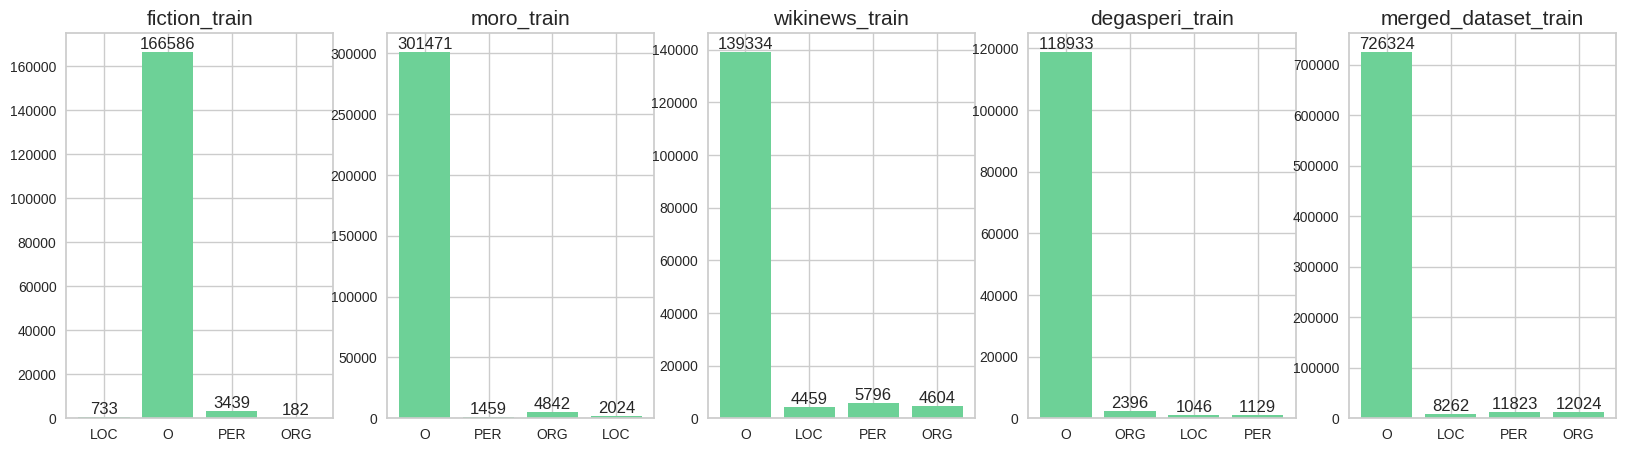

In [ ]:
_, axs = plt.subplots(1, len(datasets.keys()), figsize=(20, 5))
for i, dataset in enumerate(datasets.keys()):
  counts_entity = Counter(datasets[dataset]['Entity'])

  axs[i].bar(counts_entity.keys(), counts_entity.values(), color="#6dd197", width=0.8)

  # Add the values to the plot
  for j, value in enumerate(counts_entity.values()):
      axs[i].text(j, value, str(value), ha='center', va='bottom')
  axs[i].set_title(dataset, fontsize=15)   

`Wikinews` is the dataset with the highest ratio of named entities to total words, but the unbalance is still very large.

In [ ]:
# Get the list of files in the dataset directory
dataset_dir = os.path.join(os.getcwd(), 'dataset/txt-version')
dataset_files = os.listdir(dataset_dir)
datasets = dict()

# Create a dictionary with all train datasets
for file in tqdm(dataset_files):
    # We are dealing with the train.txt files only
    if file.endswith('test.txt') or not file.endswith('.txt'):
        continue

    file_path = os.path.join(dataset_dir, file)  

    # Add each txt file to the dictionary
    with open(file_path, 'r', encoding='UTF-8') as f:
      datasets[str(file)[:-4]] = f.read()

100%|██████████| 11/11 [00:02<00:00,  4.38it/s]


In [ ]:
for dataset in datasets.keys():
  print(f'The length of the text of {dataset} is {len(datasets[dataset])} characters.')

The length of the text of wikinews_train is 1425418 characters.
The length of the text of moro_train is 1843647 characters.
The length of the text of fiction_train is 909398 characters.
The length of the text of degasperi_train is 723072 characters.
The length of the text of merged_dataset_train is 4901535 characters.


In [ ]:
for dataset in datasets.keys():
  # Obtain all the sentences
  sentences = re.split('\n', datasets[dataset])
  # Obtain all words
  words = re.sub('\W', ' ', datasets[dataset]).split()
  print(f'The dataset {dataset} has {len(sentences)} sentences and {len(words)} words.') 

The dataset wikinews_train has 10913 sentences and 221266 words.
The dataset moro_train has 10284 sentences and 277161 words.
The dataset fiction_train has 11424 sentences and 147333 words.
The dataset degasperi_train has 5148 sentences and 110692 words.
The dataset merged_dataset_train has 37766 sentences and 756452 words.


We have an even distribution of sentences across `Wikinews`, `Moro` and `Fiction`, but we have more or less half the sentences in `De Gasperi`. This may be relevant for future analysis.

Visualize the most common words, once the stopwords are removed since they are very frequent in the documents.

In [ ]:
def remove_stopwords(text : str) -> list:
  """Given a text it removes all the italian stopwords and returns a list with the remaining words.
  
  Args:
  -----
      `text` (`str`): a string containing a text. 
  
  Returns:
  --------
      `list`: contains all the words of the original string except for the italian stopwords. Words are separated on the white space.
  """

  # List of stopwords to remove
  words_to_remove = italian_stopwords_extended

  # Regex to match the stopwords
  pattern = re.compile(r'\b(' + '|'.join(words_to_remove) + r')\b', flags=re.IGNORECASE)

  # Replace the stopwords with an empty string
  clean_text = pattern.sub('', text)

  # Tokenize text
  words_list = re.sub('[^a-zA-Z_]', ' ', clean_text).split() 

  words_list = [word for word in words_list if len(word) > 1]

  return words_list

In [ ]:
counters = list()

# Count most common words in each dataset
for dataset in datasets.keys():
  counts_word = Counter(remove_stopwords(datasets[dataset]))
  counters.append(counts_word)
  print(f'\nDataset {dataset} {counts_word.most_common(10)}')


Dataset wikinews_train [('presidente', 315), ('Italia', 315), ('causa', 176), ('Roma', 171), ('governo', 170), ('morte', 157), ('polizia', 144), ('dichiarato', 142), ('vittime', 137), ('morti', 135)]

Dataset moro_train [('politica', 1092), ('Governo', 743), ('Democrazia', 537), ('Italia', 519), ('Cristiana', 470), ('partito', 459), ('Moro', 446), ('politico', 438), ('Partito', 391), ('situazione', 387)]

Dataset fiction_train [('casa', 259), ('Ada', 216), ('Giorgio', 183), ('occhi', 162), ('Miriam', 153), ('signora', 150), ('essa', 150), ('padre', 148), ('altra', 129), ('Severa', 127)]

Dataset degasperi_train [('governo', 257), ('partito', 178), ('Italia', 178), ('politica', 171), ('libert', 138), ('popolo', 135), ('guerra', 123), ('Camera', 112), ('nazionale', 103), ('Governo', 102)]

Dataset merged_dataset_train [('politica', 1359), ('Italia', 1028), ('Governo', 898), ('partito', 759), ('governo', 745), ('situazione', 578), ('politico', 567), ('libert', 556), ('Democrazia', 555), 

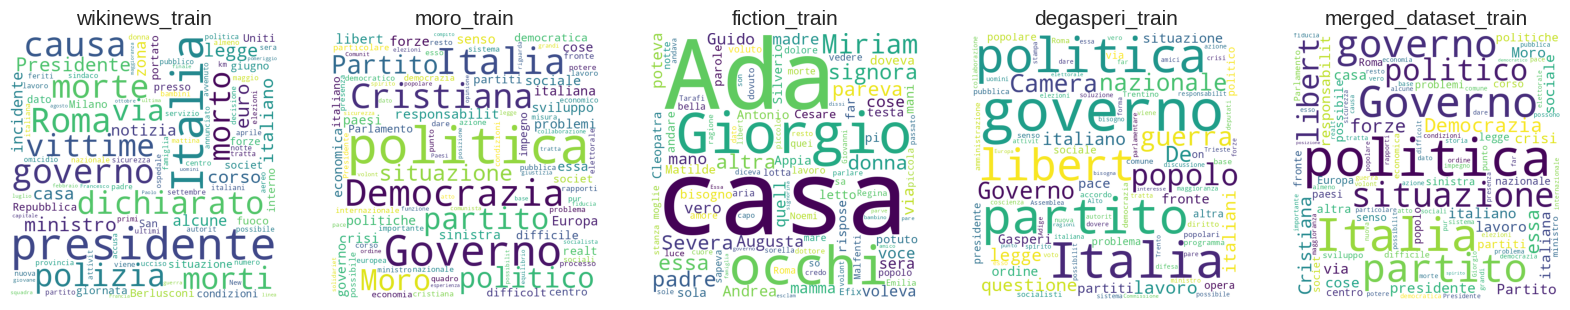

In [ ]:
_, axs = plt.subplots(1, len(datasets.keys()), figsize=(20, 5))

for i,dataset in enumerate(datasets.keys()):
  # Generate the word cloud
  wordcloud = WordCloud(height=600, width=600,
                        background_color='white',
                        min_font_size=10, max_words=100,
                        colormap='viridis').generate_from_frequencies(counters[i])

  axs[i].imshow(wordcloud)
  axs[i].axis("off")
  axs[i].set_title(dataset, fontsize=15) 

From the word clouds it is easy to see that the main topic of `Moro` and `De Gasperi` is the politics. In `Wikinews` we have terms related both to politics and chronicle. Instead `Fiction` contains lot of names of characters of the stories.

## Vocabulary

In this section we breifly analyze the vocabularies of the datasets.


### Single dataset vocabulary

Vocabulary for a single dataset, we take `degasperi_train.txt` as running example.

In [ ]:
# Open the text file degasperi_train.txt
file_path = os.path.join(os.getcwd(), 'dataset/txt-version/degasperi_train.txt')

with open(file_path, 'r', encoding="UTF-8") as f:
    text = f.read()

print(text[:152])

Il ministro degli Esteri al commissario capo della Commissione alleata 
Sono informato che l' ordine n. 14 , emesso il 10 settembre dal Governo Militare


In [ ]:
regex = '[' + string.punctuation + ']'

# Remove all the punctuation
text_no_punctuation = re.sub(regex,'',text)

print(text_no_punctuation[:150])

Il ministro degli Esteri al commissario capo della Commissione alleata 
Sono informato che l ordine n 14  emesso il 10 settembre dal Governo Militare 


In [ ]:
# Obtain all the sentences
sentences = re.split('\n', text_no_punctuation)

In [ ]:
print(f'The length of the text with punctuation is {len(text)} characters.')
print(f'The length of the text without punctuation is {len(text_no_punctuation)} characters.')
print(f'{len(text) - len(text_no_punctuation)} characters are removed.')

The length of the text with punctuation is 723072 characters.
The length of the text without punctuation is 707468 characters.
15604 characters are removed.


Build the vocabulary.

In [ ]:
# Convert to lowercase, split on whitespace, select only distinct words, sort the words alphabetically
words = text_no_punctuation.lower().split()
vocabulary = sorted(set(words))
print(f'The vocabulary contains {len(vocabulary)} words.')
#print(vocabulary)

counts_word = Counter(words)
print(f'Most common words: {counts_word.most_common(10)}')

The vocabulary contains 14395 words.
Most common words: [('di', 3684), ('e', 3235), ('che', 3080), ('la', 2432), ('il', 2314), ('non', 1409), ('in', 1406), ('è', 1379), ('l', 1337), ('per', 1296)]


As expected the most common words are the stopwords, so let's build another vocabulary by removing them.

In [ ]:
# Build vocabulary using CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(sentences)

print(f'The vocabulary contains {len(vectorizer.get_feature_names_out())} words.')
vectorizer.get_feature_names_out()[:150]

The vocabulary contains 14357 words.


array(['10', '100', '10859554', '11', '12', '120', '127', '128', '13',
       '131', '14', '143', '1456', '15', '156', '16', '160', '1644231',
       '167', '17', '170', '1700', '18', '1814', '1848', '1879', '1881',
       '1882', '1890', '1892', '19', '1900', '1903', '1908', '1909',
       '1910', '1911', '1912', '1913', '1914', '1918', '1919', '1920',
       '192021', '1921', '1922', '1923', '1924', '1939', '1943', '1944',
       '1945', '1946', '194654', '1947', '194748', '1948', '1949',
       '195051', '1951', '1952', '1953', '1992', '20', '200', '20000',
       '2021', '207', '21', '210', '22', '221', '2295', '23', '230',
       '2315', '2345', '238', '24', '25', '26', '27', '2730', '28', '29',
       '30', '300', '31', '33', '344', '346486', '347', '35', '36', '362',
       '363', '38', '380', '381', '395', '40', '400', '407', '41', '45',
       '4600', '48', '49', '50', '51', '52', '53', '55', '557', '5657',
       '58', '580', '591', '5ª', '60', '61', '6122638', '62', '625', '

In [ ]:
#print('Italian stopwords:')
#print(stopwords.words('italian'))

In [ ]:
# Build vocabulary by removing italian stopwords and by keeping only words with at least 3 occurences
vectorizer = CountVectorizer(min_df=3, stop_words=stopwords.words('italian'))
vectorizer.fit(sentences)
print(f'The vocabulary contains {len(vectorizer.get_feature_names_out())} words.')
vectorizer.get_feature_names_out()[:50]

The vocabulary contains 4090 words.


array(['10', '100', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '1910', '1911', '1912', '1921', '1922', '1943', '1944', '1945',
       '1946', '1947', '1948', '1951', '20', '22', '23', '25', '27', '28',
       '30', '31', '400', '50', '52', '58', '60', '70', '90',
       'abbandonare', 'abbandonato', 'abbandono', 'abbasso', 'abbastanza',
       'abbattere', 'abbienti', 'abile', 'abisso', 'abitanti', 'abolire',
       'abolizione'], dtype=object)

### Multiple datasets vocabulary


Let's build the vocabulary for each training set.

In [ ]:
# Get the list of files in the dataset directory
dataset_dir = os.path.join(os.getcwd(), 'dataset/txt-version')
dataset_files = os.listdir(dataset_dir)
datasets = dict()

# Create a dictionary with all train datasets
for file in tqdm(dataset_files):
    # We are dealing with the train.txt files only
    if file.endswith('test.txt') or not file.endswith('.txt'):
        continue

    file_path = os.path.join(dataset_dir, file)  

    # Add each txt file to the dictionary
    with open(file_path, 'r', encoding="UTF-8") as f:
      datasets[str(file)[:-4]] = f.read()

100%|██████████| 11/11 [00:00<00:00, 92.07it/s]


Here we directly build the vocabularies using CountVectorizer with the same parameters as before and we show their sizes.

In [ ]:
# Dictionary that contains the vocabulary of each dataset
vocabularies = dict()

regex = '[' + string.punctuation + ']'

for dataset in datasets.keys():
  # Get the text
  text = datasets[dataset]

  # Remove all the punctuation (maybe not necessary)
  text_no_punctuation = re.sub(regex,'',text)

  # Obtain all the sentences
  sentences = re.split('\n', text_no_punctuation)

  # Build vocabulary by removing italian stop words and with words with at least 3 occurences
  vectorizer = CountVectorizer(min_df=3, stop_words=stopwords.words('italian'))
  vectorizer.fit(sentences)

  # Save vocabulary
  vocabularies[dataset] = vectorizer
  print(f"{dataset} vocabulary size: {len(vectorizer.get_feature_names_out())}")

wikinews_train vocabulary size: 8438
moro_train vocabulary size: 6705
fiction_train vocabulary size: 5079
degasperi_train vocabulary size: 4090
merged_dataset_train vocabulary size: 17727


In [ ]:
vocabularies['merged_dataset_train'].get_feature_names_out()[-50:]

array(['xvi', 'xx', 'yahoo', 'york', 'you', 'your', 'youtube', 'zabel',
       'zaccagnini', 'zaccaria', 'zacharčenko', 'zack', 'zag', 'zaia',
       'zame', 'zampe', 'zardari', 'zarqawi', 'zauker', 'zecchino',
       'zeitung', 'zelanda', 'zelinda', 'zelo', 'zeno', 'zero',
       'zhumayev', 'zia', 'zie', 'ziegler', 'zig', 'zika', 'zilli', 'zio',
       'zitta', 'zitto', 'zolfo', 'zona', 'zone', 'zoom', 'zootecnia',
       'zootecnico', 'zoppicando', 'zotpa', 'zu', 'zuccalà', 'zuppa',
       'zurigo', 'zurma', 'óscar'], dtype=object)

## Clustering

In this section we perform clustering on the aggregated dataset in order to find out if there are any groups of documents that are similar to each other and if they are related to the original domain they belong to.

> **_REMARK:_** To do clustering tasks we should have enough long corpus. In our case we have sentences, so by nature not very long texts. We can try to cluster them, but the results may not be very good.

First of all we are going to read the merged dataset (both the training and the test one) and we collect them together.

In [ ]:
content_train = []
content_test  = []

with open('dataset/txt-version/merged_dataset_train.txt', 'r') as f_train, open('dataset/txt-version/merged_dataset_test.txt', 'r') as f_test:
    for i, train_line in enumerate(f_train):
        content_train.append(train_line)
    
    for i, test_line in enumerate(f_test):
        content_test.append(test_line)

# Setting up the labels
train_labels = [3 for i in range(10283)] + [2 for i in range(10912)] + [1 for i in range(11423)] + [0 for i in range(5147)] # [MORO, WIKINEWS, FICTION, DEGASPERI]
test_labels = [1 for i in range(1051)] + [2 for i in range(2594)] + [3 for i in range(2618)] + [0 for i in range(1122)] # [FICTION, WIKINEWS, MORO, DEGASPERI]

indices_train = [i for i in range(len(content_train))]
indices_test = [i for i in range(len(content_test))]

random.shuffle(indices_train)
random.shuffle(indices_test)

random_content_train = [content_train[i] for i in indices_train]
random_content_test = [content_test[i] for i in indices_test]
random_train_labels = [train_labels[i] for i in indices_train]
random_test_labels = [test_labels[i] for i in indices_test]

content_train = random_content_train
content_test = random_content_test
train_labels = random_train_labels
test_labels = random_test_labels

# random.shuffle(content_train)
# random.shuffle(content_test)

In [ ]:
len(content_train)

37765

As we can see the final training dataset is composed by 37765 sentences which has to be clustered.

### Documents vectorization

In order to cluster the documents, we need to first convert them into a numerical vector format. To do so a `FastText` model is trained on our corpus and then used to embed the sentences of the dataset.

Two main types of models can be used:
* `Continuous Bag of Words` (CBOW) model
* `Skip-gram` model

The skipgram model learns to predict a target word thanks to a nearby word. On the other hand, the CBOW model predicts the target word according to its context. The context is represented as a bag of the words contained in a fixed size window around the target word.

We decided to use the `CBOW` model because it is faster to train and it performs better on frequent words.

<img src="https://fasttext.cc/img/cbo_vs_skipgram.png">

In [ ]:
if os.path.exists('./ft_cbow_model.bin'):
    ft_cbow_model = fasttext.load_model('./ft_cbow_model.bin')
else:
    ft_cbow_model = fasttext.train_unsupervised('./dataset/txt-version/merged_dataset_train.txt', model='cbow')
vocabulary = ft_cbow_model.words

Finally let's vectorize all the sentences.

In [ ]:
vectorized_sentences_train = np.array([ft_cbow_model.get_sentence_vector(sentence.strip()) for sentence in content_train])
vectorized_sentences_test = np.array([ft_cbow_model.get_sentence_vector(sentence.strip()) for sentence in content_test])

### KMeans Algorithm

Now, we'll try to cluster the data. To do so the KMeans algorithm is being applied. Even though this algorithm is one of the most used to deal with clustering tasks, it has one main drawback: the number of clusters to use has to be chosen in advance. There are several methods which helps in defining such a number. We'll use the most used ones, i.e. `Elbow Method` and `Avarage Silhouette Method`.

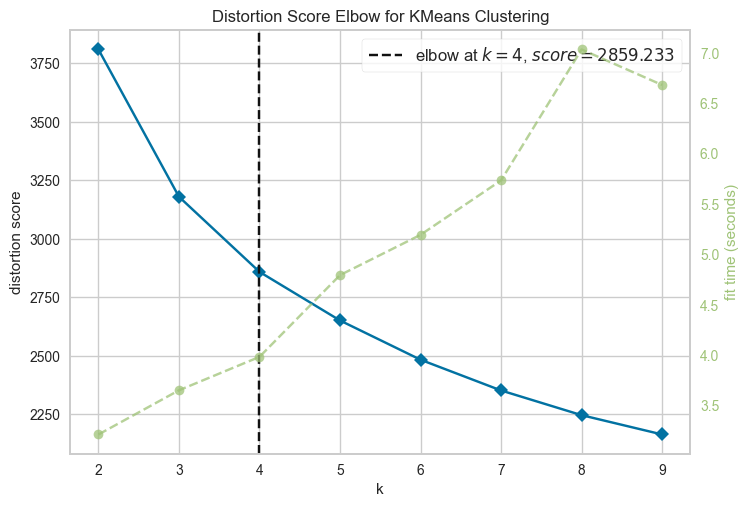

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
kmeans = KMeans(random_state=2)
elbow_visualizer = KElbowVisualizer(kmeans, k=(2,10))

elbow_visualizer.fit(vectorized_sentences_train)        # Fit the data to the visualizer
elbow_visualizer.show() 

The elbow method is not giving us a clear answer. It suggests a number of clusters equal to 4, but as we can see from the plot of the Elbow Curve there is not a clear elbow point.

Let's proceed by applying the Avarage Silhouette method. Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of $[-1, 1]$.

Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

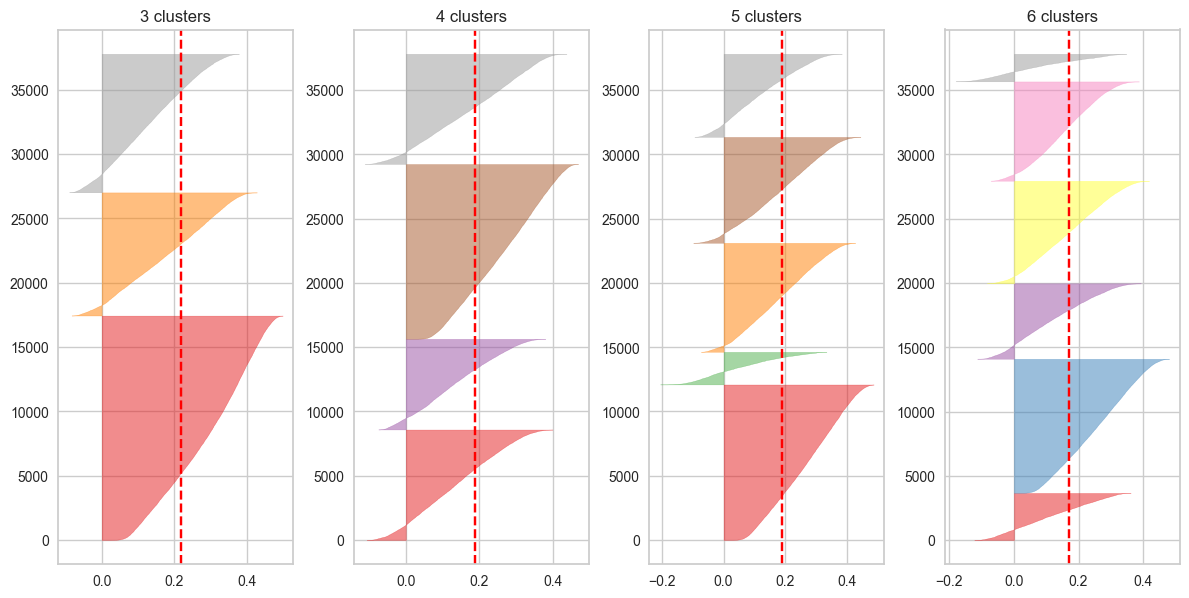

In [ ]:
possible_cluster_numbers = range(3, 7)

# We have 4 possible cluster numbers, so 4 plots
fig, axs = plt.subplots(nrows = 1, ncols = 4, figsize = (12, 6))
fig.tight_layout()

for i, cluster_number in enumerate(possible_cluster_numbers):
    model_current_cluster_number = KMeans(n_clusters = cluster_number, random_state=3)
    sil_visualizer = SilhouetteVisualizer(model_current_cluster_number, ax = axs[i])
    sil_visualizer.fit(vectorized_sentences_train)    
    axs[i].set_title(f'{cluster_number} clusters') 

The following conditions should be checked to pick the right ‘K’ using the Silhouette plots:
1. For a particular K, all the clusters should have a Silhouette score more than the average score of the dataset (represented by a red dotted line). The x-axis represents the Silhouette score. For each case the average score is around 0.2, which in principle is quite a low value (as a rule of thumb, a value of 0.5 and above is considered a good score).
2. There should not be wide fluctuations in the size of the clusters. The width of the clusters represents the number of data points and it should be similar for all the clusters. This property reduces our scope to a cluster number equal to 3 or 4 clusters.

Let's keep for the moment the number of clusters equal to 4 and let's see how the sentences are distributed among them.

In [ ]:
n_cluster = 4

kmeans = KMeans(n_clusters=n_cluster, random_state=0).fit(vectorized_sentences_train)
labels = kmeans.labels_

#### Clusters visualization

Our initial embedding has projected the original sentences into a 100-dimensional space. In order to visualize the clusters we need to reduce the dimensionality of the data.

As first attempt we tried to use the `t-SNE` algorithm, but it was not able to reduce the dimensionality of the data in a reasonable time. For this reason we decided to move to the `Uniform Manifold Approximation and Projection` (UMAP) algorithm.

`UMAP` is a novel manifold learning technique for dimension reduction. UMAP is constructed from a theoretical framework based in Riemannian geometry and algebraic topology. The result is a practical scalable algorithm that applies to real world data. The UMAP algorithm is competitive with t-SNE for visualization quality, and arguably preserves more of the global structure with superior run time performance. Furthermore, UMAP has no computational restrictions on embedding dimension, making it viable as a general purpose dimension reduction technique for machine learning. 

In [ ]:
# tsne = TSNE(n_components=3, n_iter=250, verbose = 5)
# tsne_embedding = tsne.fit_transform(vectorized_sentences_train)

umap_embedding = UMAP(n_components=3, random_state = 0).fit_transform(vectorized_sentences_train)
x, y, z = np.transpose(umap_embedding)

Let's plot the sentences in a 3D space.

In the following plot the sentences are colored according to the cluster they belong to. By hovering the mouse over the points we can see the original sentence.

In [ ]:
fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'scatter3d'}, {'type': 'scatter3d'}]], subplot_titles=['Clustered Sentences', 'Original Sources'])

trace_clusters = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    hovertext=content_train,
    marker=dict(
        color=labels,
        colorscale='Jet',
        size=2,
        opacity=0.8,
        colorbar=dict(
            title='Cluster',
            tickvals=[0, 1, 2, 3],
            ticktext=['Degasperi', 'Fiction', 'Wikinews', 'Moro'] 
        )
    )
)

trace_original = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    hovertext=content_train,
    marker=dict(
        color=train_labels,
        colorscale='Jet',
        size=2,
        opacity=0.8,
        colorbar=dict(
            title='Cluster',
            tickvals=[0, 1, 2, 3],
            ticktext=['Degasperi', 'Fiction', 'Wikinews', 'Moro'] # Moro = 3, Degasperi 0,  Fiction 1, Wikinews 2
        )
    )
)

# Set the initial camera position and orientation
camera = dict(
    eye=dict(x=-0.9, y=0.2, z=0.35),
    center=dict(x=0, y=0, z=0.1),
    up=dict(x=0, y=0, z=1)
)
scene = dict(camera=camera)

# Define the layout
layout = go.Layout(
    scene=scene,
    height=600,
    margin=dict(l=40, r=40, b=30, t=30)
)

# Create the figure and plot it
#  fig = go.Figure(data=[trace], layout=layout)
fig.add_trace(trace_clusters, row=1, col=1)
fig.add_trace(trace_original, row=1, col=2)
fig.layout.scene1.camera = camera
fig.layout.scene2.camera = camera
fig.update_layout(layout)
fig.show()

As we can see by inspecting manually the points of the scatterplot, the sentences coming from Aldo Moro, Wikinews and Fiction books are quite well clustered together. On the other hand, the sentences coming from Alcide De Gasperi are more spread out. This may be due to the fact that the number of sentences coming from this source is an half with respect to the number of sentences coming from the other classes.

As next step we are going to inspect the sentences belonging to the same cluster.

Cluster 0 (blue cluster in picture):        1291 De Gasperi, 1502 Fiction, 2933 Wikinews, 1356 Moro
Cluster 1 (light blue cluster in picture):  455 De Gasperi, 7228 Fiction, 531 Wikinews, 320 Moro
Cluster 2 (yellow cluster in picture):      899 De Gasperi, 1154 Fiction, 5902 Wikinews, 627 Moro
Cluster 3 (red cluster in picture):         2502 De Gasperi, 1539 Fiction, 1546 Wikinews, 7980 Moro


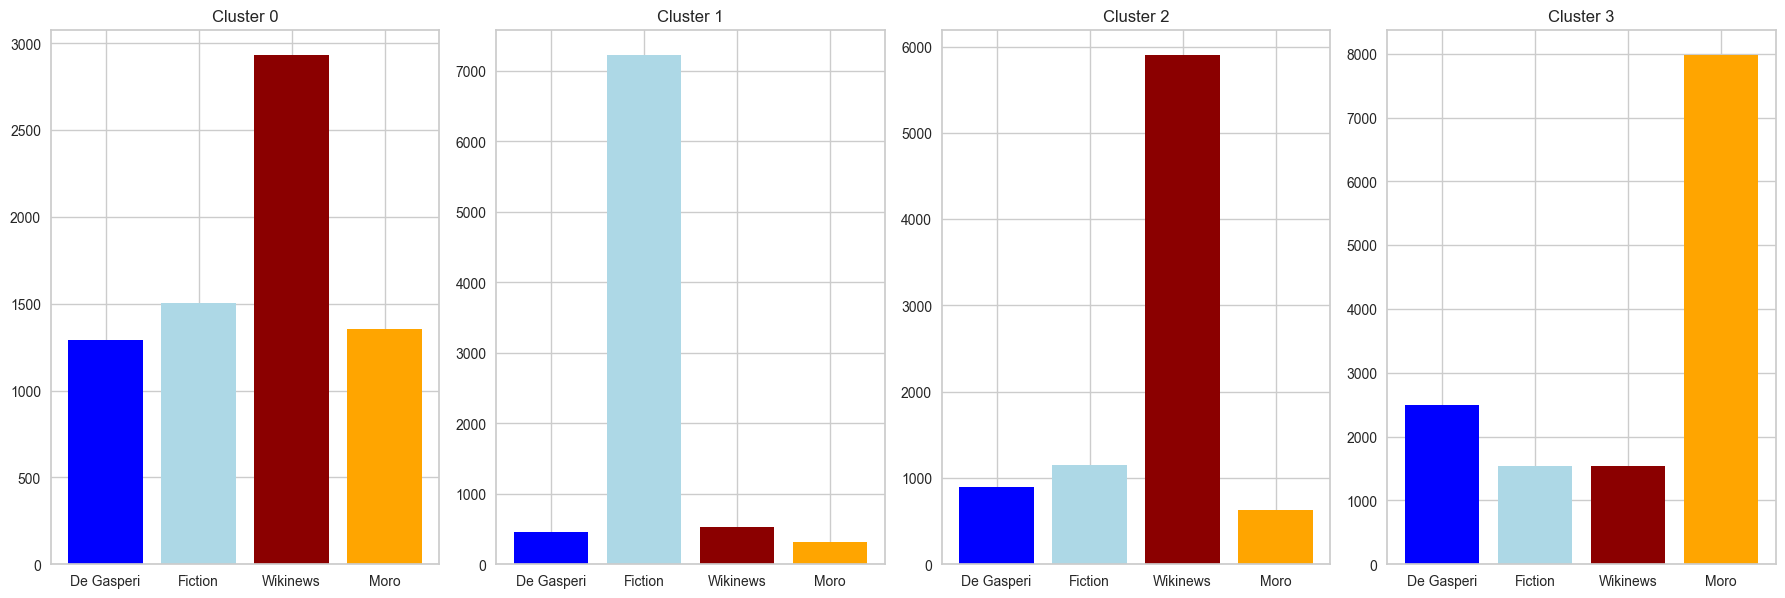

In [ ]:
sentences_cluster_0 = [content_train[i] for i in range(len(content_train)) if labels[i] == 0] # De Gasperi sentenced
sentences_cluster_1 = [content_train[i] for i in range(len(content_train)) if labels[i] == 1] # Fiction sentences
sentences_cluster_2 = [content_train[i] for i in range(len(content_train)) if labels[i] == 2] # Wikinews sentences
sentences_cluster_3 = [content_train[i] for i in range(len(content_train)) if labels[i] == 3] # Moro sentences

true_labels_cluster_0 = [train_labels[i] for i in range(len(content_train)) if labels[i] == 0] # Labels cluster 0
true_labels_cluster_1 = [train_labels[i] for i in range(len(content_train)) if labels[i] == 1] # Labels cluster 1
true_labels_cluster_2 = [train_labels[i] for i in range(len(content_train)) if labels[i] == 2] # Labels cluster 2
true_labels_cluster_3 = [train_labels[i] for i in range(len(content_train)) if labels[i] == 3] # Labels cluster 3

fig, axs = plt.subplots(nrows = 1, ncols = 4, figsize = (18, 6))
fig.tight_layout()
axs[0].bar(x = ['De Gasperi', 'Fiction', 'Wikinews', 'Moro'], height = [true_labels_cluster_0.count(0), true_labels_cluster_0.count(1), true_labels_cluster_0.count(2), true_labels_cluster_0.count(3)], color = ['blue', 'lightblue', 'darkred', 'orange'])
axs[0].set_title('Cluster 0')
axs[1].bar(x = ['De Gasperi', 'Fiction', 'Wikinews', 'Moro'], height = [true_labels_cluster_1.count(0), true_labels_cluster_1.count(1), true_labels_cluster_1.count(2), true_labels_cluster_1.count(3)], color = ['blue', 'lightblue', 'darkred', 'orange'])
axs[1].set_title('Cluster 1')
axs[2].bar(x = ['De Gasperi', 'Fiction', 'Wikinews', 'Moro'], height = [true_labels_cluster_2.count(0), true_labels_cluster_2.count(1), true_labels_cluster_2.count(2), true_labels_cluster_2.count(3)], color = ['blue', 'lightblue', 'darkred', 'orange'])
axs[2].set_title('Cluster 2')
axs[3].bar(x = ['De Gasperi', 'Fiction', 'Wikinews', 'Moro'], height = [true_labels_cluster_3.count(0), true_labels_cluster_3.count(1), true_labels_cluster_3.count(2), true_labels_cluster_3.count(3)], color = ['blue', 'lightblue', 'darkred', 'orange'])
axs[3].set_title('Cluster 3')

print(f'Cluster 0 (blue cluster in picture):        {true_labels_cluster_0.count(0)} De Gasperi, {true_labels_cluster_0.count(1)} Fiction, {true_labels_cluster_0.count(2)} Wikinews, {true_labels_cluster_0.count(3)} Moro')
print(f'Cluster 1 (light blue cluster in picture):  {true_labels_cluster_1.count(0)} De Gasperi, {true_labels_cluster_1.count(1)} Fiction, {true_labels_cluster_1.count(2)} Wikinews, {true_labels_cluster_1.count(3)} Moro')
print(f'Cluster 2 (red cluster in picture):      {true_labels_cluster_2.count(0)} De Gasperi, {true_labels_cluster_2.count(1)} Fiction, {true_labels_cluster_2.count(2)} Wikinews, {true_labels_cluster_2.count(3)} Moro')
print(f'Cluster 3 (yellow cluster in picture):         {true_labels_cluster_3.count(0)} De Gasperi, {true_labels_cluster_3.count(1)} Fiction, {true_labels_cluster_3.count(2)} Wikinews, {true_labels_cluster_3.count(3)} Moro')

#### Topic modeling - c-TF-IDF

Before starting doing topic modeling, we need to preprocess the data. In particular, we need to remove stopwords, punctuation and numbers. This operation will be useful both in this section and in the following one, in which a `LDA` approach will be applied.

In [ ]:
# Regex to match the stopwords (list from https://github.com/stopwords-iso/stopwords-it/blob/master/stopwords-it.txt)
pattern = re.compile(r'\b(' + '|'.join(italian_stopwords_extended) + r')\b', flags=re.IGNORECASE)

content_train_no_stopwords = []

# Replace the stopwords with an empty string
for sentence in content_train:
    clean_text = pattern.sub('', sentence)
    only_words_sentence = re.sub('[^a-zA-Z_]', ' ', clean_text)
    content_train_no_stopwords.append(only_words_sentence)

Here we check the main topics of each cluster. To do so we will apply a class-based variant of the TF-IDF, the `c-TF-IDF`. It allows us to extract the topics from clustered documents, reaching the set of words which makes each set of documents unique compared to the others.

When applying TF-IDF as usual on a set of documents, what we are basically comparing is the importance of words between documents.

If we instead treat all documents in a single category (e.g., a cluster) as a single document and then apply TF-IDF, the resulting TF-IDF score would demonstrate the important words in a topic.

<img src="https://miro.medium.com/v2/resize:fit:720/0*XV925DDdq5x_Gio4">

Where the frequency of each word $t_i$ is extracted for each class `i` and divided by the total number of words `w`. This action can be seen as a form of regularization of frequent words in the class. Next, the `total unjoined number of documents m` is divided by the total frequency of word t across all classes n.

In [ ]:
docs_df = pd.DataFrame(content_train_no_stopwords, columns=["Doc"])
docs_df['Topic'] = kmeans.labels_
docs_per_topic = docs_df.groupby(['Topic'], as_index = False).agg({'Doc': ' '.join})
docs_per_topic['Doc'] = docs_per_topic['Doc'].apply(lambda x: x.replace('\n', ' '))
docs_per_topic.head()

,Topic,Doc
0,0,ragazzi guida motoscafo rimasti feri...
1,1,Intrecciava mani forte sino farsi par...
2,2,Luglio laurea candidato Partito...
3,3,avviene dispetto dobbiamo ...


In [ ]:
def c_tf_idf(documents : np.ndarray, unjoined_number_of_documents : int, ngram_range : tuple = (1, 1), stopwords_to_remove : list = []) -> tuple[np.ndarray, CountVectorizer]:
    """Computes the `c-TF-IDF`, i.e. a class-based variant of `TF-IDF` of the input documents.

    Args:
    -----
        `documents` (`np.ndarray`): array of documents, where a document is a single corpus containing all the documents of a cluster.

        `unjoined_number_of_documents` (`int`): total number of documents in the original corpus.

        `ngram_range` (`tuple, optional`): ngram range for the `Count Vectorizer`. Defaults to (1, 1).

        `stopwords_to_remove` (`list, optional`): list of stopwords to remove from the sentences. Defaults to [].

    Returns:
    --------
        `tuple[np.ndarray, CountVectorizer]`: importance values for each word in a cluster which can be used to create the topic, `Count Vectorizer` fitted on the input documents.
    """
    count = CountVectorizer(ngram_range=ngram_range, stop_words=stopwords_to_remove).fit(documents)

    term_freq = count.transform(documents).toarray()
    total_num_of_words = term_freq.sum(axis=1)
    tf = np.divide(term_freq.T, total_num_of_words)
    sum_t = term_freq.sum(axis=0)
    idf = np.log(np.divide(unjoined_number_of_documents, sum_t)).reshape(-1, 1)
    tf_idf = np.multiply(tf, idf)

    return tf_idf, count

def extract_top_n_words_per_topic(tf_idf : np.ndarray, count : CountVectorizer, docs_per_topic : pd.DataFrame, n : int = 20) -> dict:
    """Extracts the top n words for each topic.

    Args:
    -----
        `tf_idf` (`np.ndarray`): tf-idf matrix.

        `count` (`CountVectorizer`): CountVectorizer object trained on the corpus.

        `docs_per_topic` (`pd.DataFrame`): DataFrame containing the documents per topic condensed all together.

        `n` (`int, optional`): top n words to extract from each topic. Defaults to 20.

    Returns:
    --------
        `dict`: the keys are the topics, the values are the top n words for that topic.
    """
    words = count.get_feature_names_out()
    labels = list(docs_per_topic.Topic)
    tf_idf_transposed = tf_idf.T
    indices = tf_idf_transposed.argsort()[:, -n:]
    top_n_words = {label: [(words[j], tf_idf_transposed[i][j]) for j in indices[i]][::-1] for i, label in enumerate(labels)}
    return top_n_words

def extract_topic_sizes(df : pd.DataFrame) -> pd.DataFrame:
    """Extract the number of sentences contained in each topic.

    Args:
    -----
        `df` (`pd.DataFrame`): dataframe containing the sentences and the topic they belong to.

    Returns:
    --------
        `pd.DataFrame`: dataframe containing the number of sentences per topic.
    """
    topic_sizes = (df.groupby(['Topic'])
                     .Doc
                     .count()
                     .reset_index()
                     .rename({"Topic": "Topic", "Doc": "Size"}, axis='columns')
                     .sort_values("Size", ascending=False))
    return topic_sizes

In order to create a topic representation, we take the top 20 words per topic based on their c-TF-IDF scores. The higher the score, the more representative it should be of its topic as the score is a proxy of information density.

In [ ]:
tf_idf, count = c_tf_idf(docs_per_topic.Doc.values, unjoined_number_of_documents=len(content_train_no_stopwords), stopwords_to_remove = italian_stopwords_extended)
top_n_words = extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20)
topic_sizes = extract_topic_sizes(docs_df) 
topic_sizes.head(10)

,Topic,Size
3,3,13567
2,2,8582
1,1,8534
0,0,7082


In [ ]:
print(f"""
De Gasperi cluster :       {top_n_words[0][:5]}, 
Fiction cluster :    {top_n_words[1][:5]},
Wikinews cluster : {top_n_words[2][:5]},
Moro cluster:    {top_n_words[3][:5]}
""")


De Gasperi cluster :       [('paesi', 0.013217828322892556), ('governo', 0.009669291086454203), ('italiani', 0.009425150586494312), ('alcune', 0.008030377877248907), ('italia', 0.00756334513536606)], 
Fiction cluster :    [('casa', 0.025445096353501673), ('ada', 0.02544058232281332), ('miriam', 0.020955901665103756), ('giorgio', 0.02028358882063858), ('signora', 0.019052072254234862)],
Wikinews cluster : [('presidente', 0.02658306151285479), ('roma', 0.013462326680737447), ('italia', 0.012511594324066306), ('de', 0.011691786215205103), ('ministro', 0.011366574167318993)],
Moro cluster:    [('politica', 0.024680008429615163), ('governo', 0.02429988098151622), ('partito', 0.02161883133167779), ('democrazia', 0.018587115571166723), ('cristiana', 0.01614157636724308)]



Let's finally compare these topics with the ones got from the original division.

In [ ]:
original_docs_df = pd.DataFrame(content_train, columns=["Doc"])
original_docs_df['Topic'] = train_labels
original_docs_per_topic = original_docs_df.groupby(['Topic'], as_index = False).agg({'Doc': ' '.join})
original_docs_per_topic['Doc'] = original_docs_per_topic['Doc'].apply(lambda x: x.replace('\n', ' '))

original_tf_idf, original_count = c_tf_idf(original_docs_per_topic.Doc.values, unjoined_number_of_documents=len(content_train), stopwords_to_remove = italian_stopwords_extended)
original_top_n_words = extract_top_n_words_per_topic(original_tf_idf, original_count, original_docs_per_topic, n=20)

print(f"""
De Gasperi dataset :       {original_top_n_words[0][:5]}, 
Fiction dataset :    {original_top_n_words[1][:5]},
Wikinews dataset : {original_top_n_words[2][:5]},
Moro dataset:    {original_top_n_words[3][:5]}
""")


De Gasperi dataset :       [('governo', 0.022718203161754425), ('partito', 0.013742594600611502), ('popolo', 0.013360507443318343), ('italia', 0.012935107722670983), ('guerra', 0.012559892638010767)], 
Fiction dataset :    [('casa', 0.018747769794569172), ('ada', 0.017901655963964133), ('giorgio', 0.014895129806957662), ('occhi', 0.013785759970015594), ('miriam', 0.01349151256980925)],
Wikinews dataset : [('presidente', 0.015922756552402505), ('italia', 0.010634960379192693), ('00', 0.008096261102446706), ('causa', 0.007976006783153935), ('polizia', 0.007913526201862156)],
Moro dataset:    [('politica', 0.029693863058474688), ('governo', 0.025894787832025184), ('partito', 0.023901982466410735), ('democrazia', 0.023145654388240018), ('cristiana', 0.02111129037694608)]



As we can see the topics retrieved by the clusters are very similar to the ones retrieved by the documents grouped by their original sources. This means that the clustering algorithm has been able, more or less, to group the sentences in a way that the sentences belonging to the same source are grouped together.

#### Topic modeling - LDA

In this section we'll fit an LDA topic model to the dataset. We'll start by looking at 10 topics.

In [ ]:
count_vectorizer = CountVectorizer(stop_words=italian_stopwords_extended ,min_df=5,max_df=.7)
lda_vectorized_sentences_train = count_vectorizer.fit_transform(content_train_no_stopwords)
vocabulary = count_vectorizer.get_feature_names_out()

In [ ]:

lda_model = LatentDirichletAllocation(n_components = 10, verbose=1, learning_method='online', max_iter=30).fit(lda_vectorized_sentences_train)

iteration: 1 of max_iter: 30
iteration: 2 of max_iter: 30
iteration: 3 of max_iter: 30
iteration: 4 of max_iter: 30
iteration: 5 of max_iter: 30
iteration: 6 of max_iter: 30
iteration: 7 of max_iter: 30
iteration: 8 of max_iter: 30
iteration: 9 of max_iter: 30
iteration: 10 of max_iter: 30
iteration: 11 of max_iter: 30
iteration: 12 of max_iter: 30
iteration: 13 of max_iter: 30
iteration: 14 of max_iter: 30
iteration: 15 of max_iter: 30
iteration: 16 of max_iter: 30
iteration: 17 of max_iter: 30
iteration: 18 of max_iter: 30
iteration: 19 of max_iter: 30
iteration: 20 of max_iter: 30
iteration: 21 of max_iter: 30
iteration: 22 of max_iter: 30
iteration: 23 of max_iter: 30
iteration: 24 of max_iter: 30
iteration: 25 of max_iter: 30
iteration: 26 of max_iter: 30
iteration: 27 of max_iter: 30
iteration: 28 of max_iter: 30
iteration: 29 of max_iter: 30
iteration: 30 of max_iter: 30


Once the model has been trained, let's print in descending order the top 10 words for each topic.

In [ ]:
for i in range(len(lda_model.components_)):
    sorted_terms = lda_model.components_[i].argsort()[::-1]
    concatenated_terms = '[' + ', '.join(vocabulary[i] for i in sorted_terms[:10]) + ']'
    print (f'Topic {i + 1}:\t', concatenated_terms)

Topic 1:	 [presidente, sviluppo, dato, problema, corso, presenza, dobbiamo, giorgio, sera, parole]
Topic 2:	 [essa, lavoro, pubblica, nuova, causa, camera, morte, opinione, opera, piano]
Topic 3:	 [politico, fronte, esso, altra, atto, mano, difficolt, bisogna, violenza, forte]
Topic 4:	 [libert, via, condizioni, resto, sociali, pur, potuto, bisogno, dovere, necessit]
Topic 5:	 [partito, sociale, casa, partiti, popolo, legge, responsabilit, roma, realt, socialista]
Topic 6:	 [crisi, elezioni, vero, elettorale, democratico, popolare, dc, posizione, amici, giustizia]
Topic 7:	 [forze, possibile, particolare, comune, economia, politiche, collaborazione, de, pare, movimento]
Topic 8:	 [democrazia, cristiana, situazione, nazionale, ada, accordo, tratta, lotta, coscienza, far]
Topic 9:	 [europa, societ, sinistra, centro, punto, possibilit, italia, credo, guerra, viene]
Topic 10:	 [governo, politica, italia, paesi, cose, italiano, parlamento, difficile, economica, problemi]


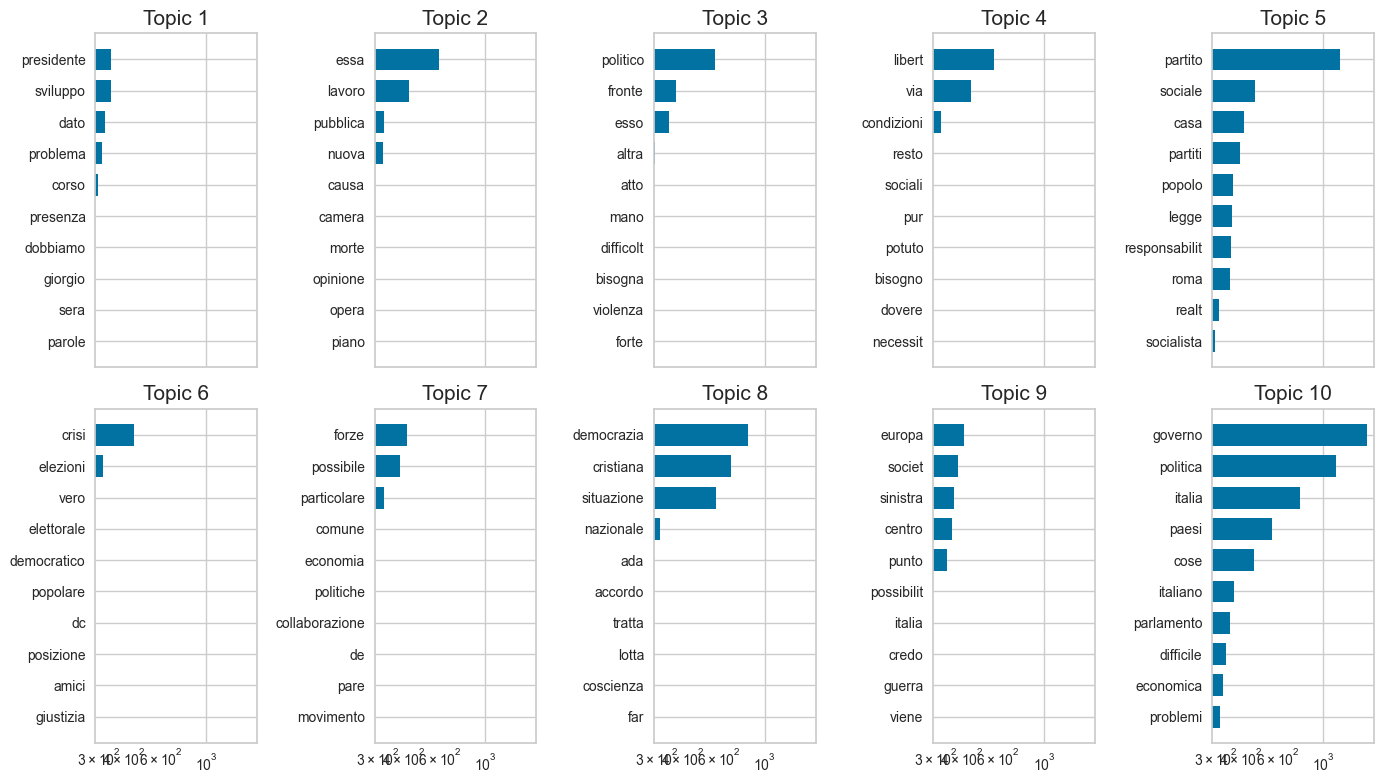

In [ ]:
num_words = 10
cols = 5
rows = int(len(lda_model.components_)/5)

fig, axes = plt.subplots(rows, cols, figsize=(14, 4 * rows), sharex=True)
axes = axes.flatten()
for topic_idx, topic in enumerate(lda_model.components_):
    top_terms_index = topic.argsort()[:-num_words - 1:-1]
    top_terms = [vocabulary[i] for i in top_terms_index]
    weights = topic[top_terms_index]
    ax = axes[topic_idx]
    ax.barh(top_terms, weights, height=0.7)
    ax.set_title(f'Topic {topic_idx +1}',fontdict={'fontsize': 15})
    ax.invert_yaxis()
    ax.set_xscale('log')

plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
plt.tight_layout()
plt.show()

#### KMeans Clustering final considerations

Finally let's try to calculate some metrics to see if the clustering effectively respect the original domain of the sentences.

In [ ]:
test_sentences_clusters = kmeans.predict(vectorized_sentences_test)

In [ ]:
print('Extrinsic evaluation measures:')
print("Homogeneity:", str(homogeneity_score(test_labels, test_sentences_clusters)))
print("Completeness:", str(completeness_score(test_labels, test_sentences_clusters)))
print("V-measure:", str(v_measure_score(test_labels, test_sentences_clusters)))
print("Adjusted Rand-Index:", str(adjusted_rand_score(test_labels, test_sentences_clusters)))
print("Adjusted mutual info score:", str(adjusted_mutual_info_score(test_labels, test_sentences_clusters)))
print("Precision:", str(precision_score(test_labels, test_sentences_clusters, average='macro')))
print("Recall:", str(recall_score(test_labels, test_sentences_clusters, average='macro')))
print("F1-Score:", str(f1_score(test_labels, test_sentences_clusters, average='macro')))
print("Accuracy:", str(accuracy_score(test_labels, test_sentences_clusters)))

Extrinsic evaluation measures:
Homogeneity: 0.22028894081023667
Completeness: 0.22358603615808512
V-measure: 0.22192524310168063
Adjusted Rand-Index: 0.26928721596335936
Adjusted mutual info score: 0.2215570111041471
Precision: 0.539043242783152
Recall: 0.5031489337821973
F1-Score: 0.511084441109577
Accuracy: 0.569532836831415


We are getting quite reasonable results compared to what we achieved by performing a manual check before. If we remove the sentences coming from Alcide De Gasperi, the results may get even better.

> **_N.B.:_** Running the code without our `fastText` model would lead to incorrect result in the evaluation stage. We hard coded the labels of the sentences in the dataset, so if the sentences are not clustered in the same way as we did, the results will be wrong (this is unfortunately possible because the fastText unsupervised model training procedure is affected by randomness and through the available API is not possible to set a seed for reproducibility. This fact may lead to slightly different embeddings for our sentences that may lead the KMeans algorithm to assign them different labels from the ones we have shown in this notebook. Obviously the clustering procedure will work, but the names given to the labels on the plot and the subsequent metrics calculations will be misaligned, since we matched them by manual inspection).

Moreover it's worth noting that these results comes from an our interpretation of the clusters. Since they come from 4 different sources we imagined they could be identified in 4 different clusters that refers to their original source, but we cannot know exactly if it is the right interpretation.

## Indexing

Let's now create an index to search the dataset. For this task we put together the merged dataset both train and test.

In [ ]:
d1 = pd.read_csv('dataset/txt-version/merged_dataset_train.txt', sep="\t", header=None)
d2 = pd.read_csv('dataset/txt-version/merged_dataset_test.txt', sep="\t", header=None)
docs_df = pd.concat([d1, d2], ignore_index=True)
docs_df.rename(columns={0:'text'}, inplace=True)
doc_name = [f'd{i}' for i in range(docs_df.size)]
docs_df['docno'] = doc_name
docs_df[:5]

,text,docno
0,"In fiamme l' Istituto Lama Tzong Khapa , monas...",d0
1,"In fiamme il Monastero Lama Tzong Khapa , cent...",d1
2,Si sarebbe trattato di un corto circuito nell'...,d2
3,I danni all' antico castello adibito a monaste...,d3
4,si stimano superiori ad un milione di euro .,d4


Remove custom stopwords.

In [ ]:
stop = italian_stopwords_extended
print(stop)
docs_df['text'] = docs_df['text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in (stop)]))
print(docs_df[:5])

{'dall', 'esser', 'co', 'senza', 'tutti', 'ore', 'deve', 'stetti', 'ed', 'trovato', 'percio', 'magari', 'fra', 'effettivamente', 'staresti', 'ha', 'nostro', 'ultimo', 'soltanto', 'riecco', 'gli', 'altrimenti', 'qua', 'varia', 'possedere', 'cioè', 'fecero', 'lontano', 'ex', 'farà', 'stemmo', 'nell', 'recentemente', 'abbia', 'comprare', 'quest', 'stiano', 'codesta', 'anni', 'fino', 'piu', 'miliardi', 'spesso', 'verso', 'stando', 'forse', 'aveste', 'avrebbe', 'alla', 'eravamo', 'adesso', 'sono', 'sullo', 'miei', 'ansa', 'avendo', 'tuttavia', 'dice', 'nome', 'nessun', 'stava', 'codesti', 'i', 'neppure', 'peggio', 'doppio', 'steste', 'invece', 'lasciato', 'ognuno', 'glielo', 'medesimo', 'farebbe', 'sareste', 'farete', 'fai', 'fummo', 'poco', 'sarebbe', 'giu', 'era', 'grande', 'cio', 'staranno', 'tutte', 'siete', 'contro', 'starebbero', 'dovrà', 'quello', 'loro', 'coll', 'tua', 'attraverso', 'quelle', 'sotto', 'entrambi', 'anno', 'città', 'partendo', 'me', 'farò', 'facevi', 'facendo', 'pochi

Start pyterrier.

In [ ]:
if not pt.started():
  pt.init()

PyTerrier 0.9.2 has loaded Terrier 5.7 (built by craigm on 2022-11-10 18:30) and terrier-helper 0.0.7



Before any search engine can estimate which documents are most likely to be relevant for a given query, it must index the documents. 

In the following cell, we index the dataframe's documents. The index, with all its data structures, is written into a directory that we will call `index_docs`.

In [ ]:
indexer = pt.DFIndexer("./indexes/index_docs", overwrite=True, stemmer="ItalianSnowballStemmer")
index_ref = indexer.index(docs_df.text, docs_df["docno"])
index_ref.toString()

/usr/local/lib/python3.10/dist-packages/pyterrier/index.py:628: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, value in meta_column[1].iteritems():


16:17:07.789 [main] WARN org.terrier.structures.indexing.Indexer - Adding an empty document to the index (d670) - further warnings are suppressed
16:18:12.097 [main] WARN org.terrier.structures.indexing.Indexer - Indexed 513 empty documents


'./indexes/index_docs/data.properties'

We can now load the index.

In [ ]:
index_ref = './indexes/index_docs/data.properties'
index = pt.IndexFactory.of(index_ref)

This is a Terrier index structure, which provides methods such as:
 - `getCollectionStatistics()`
 - `getInvertedIndex()`
 - `getLexicon()`

Note Terrier is written in Java. (The best language ever created). 
The Javadoc documentation is here: 
http://terrier.org/docs/current/javadoc/org/terrier/structures/Index.html

Let's see what is returned by the `CollectionStatistics()` method:

In [ ]:
print(index.getCollectionStatistics().toString())

Number of documents: 45041
Number of terms: 25050
Number of postings: 413977
Number of fields: 0
Number of tokens: 425972
Field names: []
Positions:   false



Let's check some values (pick the 10 most document frequent terms).

In [ ]:
sorted_terms = sorted(list(index.getLexicon()), key=lambda x: x.getValue().getDocumentFrequency(), reverse=True)
print("Top 10 terms by document frequency:")
for kv in sorted_terms[:10]:
    print(kv.getKey(),": ", kv.getValue().toString())

Top 10 terms by document frequency:
dell :  term46 Nt=3386 TF=3750 maxTF=5 @{0 199534 7}
polit :  term147 Nt=2898 TF=3191 maxTF=4 @{0 496555 4}
govern :  term122 Nt=2094 TF=2238 maxTF=4 @{0 314984 0}
part :  term281 Nt=2065 TF=2372 maxTF=5 @{0 472197 6}
ital :  term791 Nt=1845 TF=1947 maxTF=5 @{0 367590 3}
social :  term2629 Nt=1339 TF=1454 maxTF=4 @{0 640947 3}
un :  term141 Nt=1125 TF=1169 maxTF=6 @{0 708467 3}
parl :  term488 Nt=1084 TF=1134 maxTF=4 @{0 469651 5}
nell :  term23 Nt=1081 TF=1119 maxTF=3 @{0 435632 7}
econom :  term3604 Nt=1076 TF=1164 maxTF=3 @{0 242145 0}


We see the terms and the statistics collected about each.
Here:
 - `Nt` is the number of unique documents that each term occurs in – this is useful for calculating IDF.
 - `TF` is the total number of occurrences of term in corpus.

Finally, we can use the square bracket notation to lookup terms in the lexicon:

In [ ]:
query_word = "president"
index.getLexicon()[query_word].toString()

'term48 Nt=932 TF=1017 maxTF=6 @{0 518573 2}'

And we can see how many times this term is used in each document that it occurs in (by iterating over the posting lists):

In [ ]:
pointer = index.getLexicon()[query_word]
count = 10
for posting in index.getInvertedIndex().getPostings(pointer):
    print(f'{posting.toString()} doclen = {posting.getDocumentLength()}')
    count -= 1
    if count == 0:
        break

ID(6) TF(1) doclen = 13
ID(37) TF(1) doclen = 27
ID(38) TF(1) doclen = 19
ID(49) TF(1) doclen = 7
ID(55) TF(1) doclen = 25
ID(57) TF(1) doclen = 14
ID(59) TF(1) doclen = 13
ID(153) TF(1) doclen = 7
ID(310) TF(1) doclen = 12
ID(352) TF(1) doclen = 13


Now that we have indexed our documents, we can run a search over the document collection:

In [ ]:
br = pt.BatchRetrieve(index, wmodel="TF_IDF")
br.search(query_word)

,qid,docid,docno,rank,score,query
0,1,44476,d44476,0,4.985471,president
1,1,32757,d32757,1,4.837552,president
2,1,32764,d32764,2,4.837552,president
3,1,33051,d33051,3,4.837552,president
4,1,33067,d33067,4,4.837552,president
...,...,...,...,...,...,...
927,1,6926,d6926,927,1.018107,president
928,1,9392,d9392,928,0.989692,president
929,1,39407,d39407,929,0.949924,president
930,1,10490,d10490,930,0.518964,president


In [ ]:
bm25 = pt.BatchRetrieve(index, wmodel="BM25")
bm25.search(query_word)

,qid,docid,docno,rank,score,query
0,1,44476,d44476,0,9.041760,president
1,1,32757,d32757,1,8.773491,president
2,1,32764,d32764,2,8.773491,president
3,1,33051,d33051,3,8.773491,president
4,1,33067,d33067,4,8.773491,president
...,...,...,...,...,...,...
927,1,6926,d6926,927,1.846460,president
928,1,9392,d9392,928,1.794927,president
929,1,39407,d39407,929,1.722804,president
930,1,10490,d10490,930,0.941205,president


## Word embeddings

In this section we use all the train data we have to learn word embeddings and we check whether the expected properties are satisfied. Word embeddings are a dense vector representation of words that is much more compact than one-hot encoding. They are also able to capture semantic and syntactic similarities among words.


### Word2Vec

One of the most popular technique to obtain word embeddings is Word2Vec that uses a neural network with just one hidden layer.
To train the word embeddings we use `merged_dataset_train.txt` to have the largest corpus, since using separately the other dataset there aren't enough data to learn something meaningful.


To train Word2Vec we divide the dataset into individual sentences and then we tokenize them.

In [ ]:
# Open the text file merged_dataset_train.txt
file_path = os.path.join(os.getcwd(), 'dataset/txt-version/merged_dataset_train.txt')

with open(file_path, 'r', encoding="UTF-8") as f:
  text = f.read()

# Obtain all the sentences
sentences = re.split('\n', text)

print(f'There are {len(sentences)} sentences')
sentences[:5]

There are 37766 sentences


["In fiamme l' Istituto Lama Tzong Khapa , monastero buddhista ",
 'In fiamme il Monastero Lama Tzong Khapa , centro buddhista di Pisa , una delle istituzioni più importanti per lo studio e la pratica del Buddhismo di tradizione tibetana in tutta Europa . ',
 "Si sarebbe trattato di un corto circuito nell' impianto elettrico del gompa , la sala di meditazione . ",
 "I danni all' antico castello adibito a monastero risultano ingenti : ",
 'si stimano superiori ad un milione di euro . ']

Data preprocess: 
- remove stopwords; 
- remove non-letter characters from each sentence; 
- lowercase; 
- tokenize the sentences based on whitespace;
- remove any sentence with length less than 2 since it won't be useful for training Word2Vec. 

In this way we remove noise from data to help the embeddings to capture only the essential meaning of the words instead of focusing on irrelevant details.

In [ ]:
# List of stopwords to remove
words_to_remove = stopwords.words('italian')

# Regex to match the stopwords
pattern = re.compile(r'\b(' + '|'.join(words_to_remove) + r')\b', flags=re.IGNORECASE)

# Replace the stopwords with an empty string
clean_text = pattern.sub('', text)

# Obtain all the sentences
sentences = re.split('\n', clean_text)

# Tokenize sentences
tokenized_sentences = [re.sub('\W', ' ', sentence).lower().split() for sentence in sentences]

# Remove sentences that are only 1 word long
tokenized_sentences = [sentence for sentence in tokenized_sentences if len(sentence) > 1]

print(f'There are {len(tokenized_sentences)} sentences')
for sentence in tokenized_sentences[:5]:
    print(sentence)

There are 36015 sentences
['fiamme', 'istituto', 'lama', 'tzong', 'khapa', 'monastero', 'buddhista']
['fiamme', 'monastero', 'lama', 'tzong', 'khapa', 'centro', 'buddhista', 'pisa', 'istituzioni', 'importanti', 'studio', 'pratica', 'buddhismo', 'tradizione', 'tibetana', 'tutta', 'europa']
['trattato', 'corto', 'circuito', 'impianto', 'elettrico', 'gompa', 'sala', 'meditazione']
['danni', 'antico', 'castello', 'adibito', 'monastero', 'risultano', 'ingenti']
['stimano', 'superiori', 'milione', 'euro']


In [ ]:
words_count = 0
for sentence in tokenized_sentences:
  words_count += len(sentence)

print(f'There are {words_count} words.')
print(f'The average length in number of words of a\
 sentences is {int(words_count/len(tokenized_sentences))}.')

There are 420443 words
The average length in number of words of a sentences is 11


#### Train Word2Vec



Parameters:
- embedding size = 20;
- minimum count for any vocabulary term = 5;
- size of the context window = 8;
- training algorithm = skip-gram.

In [ ]:
# Load a model if already present, otherwise train one
file_path = os.path.join(os.getcwd(), 'dataset/word2vec.model')
if os.path.exists(file_path):
  wv_model = Word2Vec.load(file_path)
else :
  # sg=0 -> CBOW, sg=1 -> skip-gram
  wv_model = Word2Vec(tokenized_sentences, vector_size=20, min_count=5, window=8, sg=1)

print(f'There are {len(wv_model.wv)} word embeddings.')

There are 11720 word embeddings


Doing several Word2Vec training with different hyperparameters we noticed that to have significant results in terms of properties of the resulting embeddings we have to use at least a minimum frequency of the words of 4, a window of at least 7 and an embedding size in the range of 20-30.
In this way rare words and noise are removed and the embeddings are focused on the most important connections. This is due to rather small size of the dataset at our disposal.

Moreover we noticed that by removing stopswords we get better results, at the price of losing a bit in recognizing syntactic regularities.

Training word embeddings with larger dimension is not efficient since it doesn't improve the obtained results and it requires more time and space. 

In addition, using skip-gram instead of CBOW as training algorithm, gives slighlty better results, but it ususally takes twice the time to train.

In [ ]:
# See the vector corresponding to a word 
wv_model.wv['italia']

array([-0.4301151 , -0.9728754 ,  0.33981568,  0.19732796,  0.08432369,
       -0.01306175,  0.81857955, -0.24824522, -0.4980646 ,  0.52973425,
        0.8203001 , -0.52312756,  0.33186474,  0.24050915,  0.2851803 ,
        0.7492355 ,  0.5882607 , -0.492847  , -0.18200481, -0.82853687],
      dtype=float32)

#### Properties

> **_N.B.:_** Following comments are valid using the model we trained, by training a new one some considerations maybe not be any more valid.


In [ ]:
# List the 10 most similar vectors of a word
word ='francia'
wv_model.wv.most_similar(word, topn=10)

[('germania', 0.9772539734840393),
 ('giappone', 0.9545674324035645),
 ('austria', 0.9477847814559937),
 ('australia', 0.9362668395042419),
 ('russia', 0.9351024627685547),
 ('cina', 0.9332104921340942),
 ('belgio', 0.9330666065216064),
 ('canada', 0.931154727935791),
 ('ungheria', 0.9275308847427368),
 ('spagna', 0.9226617217063904)]

The similarity seems pretty good, all the similar embeddings are nations. In this case word embeddings were able to capture the semantic similarity.

In [ ]:
# Compute analogies between words
#vec = wv_model.wv['re'] + (wv_model.wv['donna'] - wv_model.wv['uomo'])  
#vec = wv_model.wv['berlino'] + (wv_model.wv['francia'] - wv_model.wv['germania'])
vec = wv_model.wv['andare'] + (wv_model.wv['chiesto'] - wv_model.wv['andato'])
wv_model.wv.similar_by_vector(vec)

[('chiedere', 0.9199219942092896),
 ('parola', 0.9092605113983154),
 ('prendere', 0.9089033007621765),
 ('ritengo', 0.8860101699829102),
 ('fare', 0.877578616142273),
 ('accusare', 0.8774385452270508),
 ('negare', 0.8746443390846252),
 ('proposito', 0.873100757598877),
 ('venga', 0.8730928301811218),
 ('spiegare', 0.8707433342933655)]

In this case the results are acceptable.

In the first example we can still find _regina_ in the top ten. 

Instead in the second example the country-capital relationship is not discovered. 

In the third example the relationship among verbal tenses is recognized.

These properties are highly dependent on the selected words so they are not very general. The reason might be the small size of the dataset.

In [ ]:
# Sample 200 random word embeddings
sample = random.sample(list(wv_model.wv.key_to_index), 200)
word_vectors = wv_model.wv[sample]

In [ ]:
# Visualize word embeddings using TSNE
tsne = TSNE(n_components=3, n_iter=2000)
tsne_embedding = tsne.fit_transform(word_vectors)
x, y, z = np.transpose(tsne_embedding)

# Attach the label to the points
fig = px.scatter_3d(x=x,y=y,z=z,text=sample)
fig.update_traces(marker=dict(size=3,line=dict(width=2)),textfont_size=10)
fig.show()

In [ ]:
# Sample some nations to see if they are projected close together
nations = ['italia','spagna','portogallo','america','francia','germania', 'canada', 'lussemburgo']
word_vectors = wv_model.wv[nations+sample]

tsne = TSNE(n_components=3, n_iter=2000)
tsne_embedding = tsne.fit_transform(word_vectors)
x, y, z = np.transpose(tsne_embedding)

fig = px.scatter_3d(x=x, y=y, z=z, text=nations + [None] * 200)
fig.update_traces(marker=dict(size=3,line=dict(width=2)),textfont_size=10)
fig.show()

It is possible to see that almost all the selected nations are clustered together. This is coherent with what we found about the most similar words for _francia_. The only one that is far away is _italia_, probably because the size of embeddings is not large enough to capture this relationship. We have to keep in mind that the dataset is small and the sentences were written by Italian authors that may refer a lot to Italy from a political point of view, especially Aldo Moro and Alcide De Gasperi.

### fastText

fastText is an alternative technique to learn word embeddings. The main difference with respect Word2Vec is that the embeddings are learnt for character n-grams and then combined to form words. 

In [ ]:
# Open the text file merged_dataset_train.txt
file_path = os.path.join(os.getcwd(), 'dataset/txt-version/merged_dataset_train.txt')

with open(file_path, 'r', encoding="UTF-8") as f:
  text = f.read()

# Obtain all the sentences
sentences = re.split('\n', text)

print(f'There are {len(sentences)} sentences.')
sentences[:5]

There are 37766 sentences


["In fiamme l' Istituto Lama Tzong Khapa , monastero buddhista ",
 'In fiamme il Monastero Lama Tzong Khapa , centro buddhista di Pisa , una delle istituzioni più importanti per lo studio e la pratica del Buddhismo di tradizione tibetana in tutta Europa . ',
 "Si sarebbe trattato di un corto circuito nell' impianto elettrico del gompa , la sala di meditazione . ",
 "I danni all' antico castello adibito a monastero risultano ingenti : ",
 'si stimano superiori ad un milione di euro . ']

In [ ]:
# List of stopwords to remove
words_to_remove = stopwords.words('italian')

# Regex to match the stopwords
pattern = re.compile(r'\b(' + '|'.join(words_to_remove) + r')\b', flags=re.IGNORECASE)

# Replace the stopwords with an empty string
clean_text = pattern.sub('', text)

# Obtain all the sentences
sentences = re.split('\n', clean_text)

# Tokenize sentences
tokenized_sentences = [re.sub('\W', ' ', sentence).lower() for sentence in sentences]

# Remove sentences that are only 1 word long
tokenized_sentences = [sentence for sentence in tokenized_sentences if len(sentence) > 1]

text = "\n".join(tokenized_sentences)

print(f'There are {len(tokenized_sentences)} sentences.')
for sentence in tokenized_sentences[:5]:
    print(sentence)

There are 37764 sentences
 fiamme   istituto lama tzong khapa   monastero buddhista 
 fiamme  monastero lama tzong khapa   centro buddhista  pisa     istituzioni  importanti   studio   pratica  buddhismo  tradizione tibetana  tutta europa   
  trattato   corto circuito   impianto elettrico  gompa    sala  meditazione   
 danni   antico castello adibito  monastero risultano ingenti   
 stimano superiori   milione  euro   


In [ ]:
dataset_dir = os.path.join(os.getcwd(), 'dataset/merged_preprocessed_dataset_train.txt')

if not os.path.exists(dataset_dir):
  # Write the merged content back to the file if not exist
  with open(dataset_dir, 'w') as f:
    f.write(text)

#### Train fastText



Parameters:
- embedding size = 50;
- minimum count for any vocabulary term = 3;
- size of the context window = 10;
- training algorithm = skip-gram;
- number of epochs = 7;
- minimum size of substrings = 3;
- minimum size of substrings = 7.

[Link for fastText model](https://drive.google.com/file/d/1Gi1eQQkMejeWSH0jQ4p6KAaN2pwn9T1k/view?usp=share_link)

[Link for fastText model with preprocessing](https://drive.google.com/file/d/1-4mdpu9T6ys0eQ3h5zfu6hrwZdFy2fm_/view?usp=share_link)

In [ ]:
# Load a model if already present, otherwise train one
file_path = os.path.join(os.getcwd(), 'dataset/ft_model.bin')
if os.path.exists(file_path):
  ft_model = fasttext.load_model(file_path)
else :
  dataset_path = os.path.join(os.getcwd(), 'dataset/merged_preprocessed_dataset_train.txt')
  ft_model = fasttext.train_unsupervised(dataset_path, model='skipgram', dim=50, minn=3, maxn=7, epoch=7, minCount=3, ws=10)

print(f'There are {len(ft_model.get_words())} words.')
print(f'The dimension of vectors is {ft_model.get_dimension()}.')

There are 12640 words
The dimension of vectors is 50


In [ ]:
# It returns all words in the vocabulary, sorted by decreasing frequency
ft_model.words[:20]

[',',
 '</s>',
 'di',
 '.',
 'e',
 'che',
 'la',
 'il',
 'in',
 'a',
 'è',
 'per',
 'del',
 'non',
 'un',
 'della',
 'una',
 'si',
 'le',
 'con']

In [ ]:
# Vector corresponding to a word 
ft_model.get_word_vector('italia')

array([-4.7553319e-02,  6.0148942e-01,  3.2773933e-01, -3.6068758e-01,
        8.0307037e-01, -2.1422206e-01, -2.6468581e-01, -1.4853716e-01,
       -7.2733670e-02,  2.2125575e-01,  5.2389389e-01, -3.6689112e-01,
       -4.9100760e-01,  2.9951388e-01, -1.7789134e-01, -3.7545851e-01,
       -5.2945673e-01, -3.2850522e-01, -2.0671998e-01, -6.9214940e-01,
       -6.2102318e-04,  1.6031791e-01, -1.3998580e-01, -4.7434795e-01,
       -5.0763559e-01, -3.7696591e-01,  2.9991107e-02, -2.6822850e-01,
        1.4956896e-01,  4.2857360e-02,  6.4236373e-01, -1.3248432e-01,
       -2.8346232e-01,  1.0127458e-01,  2.6258188e-01, -1.1913404e-02,
       -4.6912760e-01, -4.0783781e-01, -4.1455481e-02,  3.2881248e-01,
        4.7912607e-01, -2.5011513e-01,  3.8349280e-01,  6.8518800e-01,
       -7.4599683e-01, -6.0984135e-01, -7.8104064e-02, -2.1888417e-01,
        7.6308697e-02,  1.0437860e+00], dtype=float32)

#### Properties

> **_N.B.:_** Following comments are valid using the model we trained, by training a new one some considerations maybe not be any more valid.


In [ ]:
# List the most similar vectors of a word
#word = 'italia'
#word = 'femmina'
word = 'francia'
ft_model.get_nearest_neighbors(word)

[(0.8974575400352478, 'lancia'),
 (0.8741974234580994, 'pancia'),
 (0.8726204037666321, 'Francia'),
 (0.8225141167640686, 'francesi'),
 (0.8142966032028198, 'fra'),
 (0.8099956512451172, 'roccia'),
 (0.8024025559425354, 'franca'),
 (0.8003892302513123, 'frana'),
 (0.7955021858215332, 'francese'),
 (0.780990481376648, 'arancione')]

The similarity is not bad, the first elements are quite appropriate.
In comparison with the word embeddings obtained with Word2Vec, here not only there are semantic and syntactic similarities but the results also often contain same sequences of letters.

In [ ]:
# Compute analogies between words
#ft_model.get_analogies("re", "uomo", "donna")
#ft_model.get_analogies("berlino", "germania", "francia")
ft_model.get_analogies("andare", "andato", "chiesto")

[(0.811016321182251, 'fissare'),
 (0.8039141893386841, 'cessare'),
 (0.8034030795097351, 'chiedere'),
 (0.7981592416763306, 'accettare'),
 (0.7939180135726929, 'associare'),
 (0.7915136814117432, 'pregare'),
 (0.7887765765190125, 'dare'),
 (0.783804714679718, 'forzare'),
 (0.7834404706954956, 'prestare'),
 (0.7818915843963623, 'volgare')]

This model was not able to capture the usual word embeddings properties. In fact only with the last example we obtain meaningful results.

An advantage of fastText compared to Word2Vec is that it also allows to search for words that are not in the initial vocabulary and therefore do not have an embedding.

In [ ]:
# List the most similar vectors of a word not present in the vocabulary
word = "friuliano"
print(f'Word {word} is in the fastText model vocabulary? {word in ft_model}')
ft_model.get_nearest_neighbors(word)

Word friuliano is in the fastText model vocabulary? False


[(0.8787480592727661, 'Adriano'),
 (0.8648854494094849, 'israeliano'),
 (0.8620492219924927, 'siciliano'),
 (0.8534905910491943, 'Saviano'),
 (0.8499994874000549, 'Ottaviano'),
 (0.8458500504493713, 'Luciano'),
 (0.8406271934509277, 'Giuliano'),
 (0.828453004360199, 'veneziano'),
 (0.8261518478393555, 'Piano'),
 (0.8198815584182739, 'Tiziano')]

In [ ]:
# Sample 200 random word embeddings
sample = np.random.randint(len(ft_model.words)-1, size=200)
words = [ft_model.words[i] for i in sample]
word_vectors = np.array([ft_model[i] for i in words])

In [ ]:
# Visualize word embeddings using TSNE
tsne = TSNE(n_components=3, n_iter=2000)
tsne_embedding = tsne.fit_transform(word_vectors)
x, y, z = np.transpose(tsne_embedding)

# Attach the label to the points
fig = px.scatter_3d(x=x,y=y,z=z,text=words)
fig.update_traces(marker=dict(size=3,line=dict(width=2)),textfont_size=10)
fig.show()

In [ ]:
# Sample some nations to see if they are projected close together
nations = ['italia','spagna','portogallo','america','francia','germania', 'canada', 'lussemburgo']
word_vectors = np.array([ft_model[i] for i in (words + nations)])

tsne = TSNE(n_components=3, n_iter=2000)
tsne_embedding = tsne.fit_transform(word_vectors)
x, y, z = np.transpose(tsne_embedding)

fig = px.scatter_3d(x=x, y=y, z=z, text=nations + [None] * 200)
fig.update_traces(marker=dict(size=3,line=dict(width=2)),textfont_size=10)
fig.show()

The nations are not clustered all together probably because they don't share many n-grams and fastText was not able to discover their semantic similarity.

## NER - Named Entity Recognition

In this section we will tackle the main task of this project: Named Entity Recognition. 

`Named entity recognition` is an information extraction technique which refers to extracting `named entities` from the text. Named entities denote to words in a sentence representing real-world objects with proper names, like `Person's name`, `Organizations` or `Localities` (or anything that in general could be given a specific name).

The work will be splitted in the following steps:
1. CRF-based model: we'll use a `Conditional Random Field` based model first;
2. Transformer model: we'll move towards modern approaches using deep learning techniques by fine-tuning `BERT` models on our dataset and by testing pre-trained models on the task such as `SpaCy` and `Stanza`.

### CRF - Conditional Random Fields

`Conditional Random Fields (CRF)` are a class of statistical methods often applied in pattern recognition and machine learning and used for structured prediction. Differently from other types of classifiers, which do not consider neighbouring samples from the one we are looking at, CRF can take context into account.

Here we provide a brief look over this type of model applied to a NER task.

#### Method overview

First of all we import the gazetteers referred to localities, organizations and person's names. We'll use them to derive features for our samples later on.

In [ ]:
# Import the gazetteers
file_path_loc = os.path.join(os.getcwd(), 'gazetteers/it-LOC-wikipedia.txt')
file_path_org = os.path.join(os.getcwd(), 'gazetteers/it-ORG-wikipedia.txt')
file_path_per = os.path.join(os.getcwd(), 'gazetteers/it-PER-wikipedia.txt')

with open(file_path_loc, 'r', encoding="utf-8") as f_loc, open(file_path_org, 'r', encoding="utf-8") as f_org, open(file_path_per, 'r', encoding="utf-8") as f_per:
    gaz_loc = set([line[4:-1] for line in f_loc.readlines()])
    gaz_org = set([line[4:-1] for line in f_org.readlines()])
    gaz_per = set([line[4:-1] for line in f_per.readlines()])

gaz_loc, gaz_org, gaz_per

Now, let's import our training a test datasets. In order to give a first insight of the method we'll use the `wikinews_train` and `wikinews_test` datasets. In one of the following sections a deep comparison between all the available datasets (Moro, De Gasperi, Fiction) is provided.

In [4]:
# Path of training file
file_path_train = os.path.join(os.getcwd(), 'dataset/wikinews_train.tsv')

# Inserting the content of the tsv file into a dataframe keeping the blank lines
data_df_train = pd.read_csv(file_path_train, sep='\t', names=['Word', 'Entity'], skip_blank_lines=False, quoting=csv.QUOTE_NONE)

# Replace NaN values with a new line (\n) to mark the beginning of a new phrase
data_df_train.fillna('\n', inplace=True)

# Path of test file
file_path_test = os.path.join(os.getcwd(), 'dataset/wikinews_test.tsv')

# Inserting the content of the tsv file into a dataframe keeping the blank lines (i.e. the end of a sentence)
data_df_test = pd.read_csv(file_path_test, sep='\t', names=['Word', 'Entity'], skip_blank_lines=False, quoting=csv.QUOTE_NONE)

# Replace NaN values with a new line (\n) to mark the beginning of a new phrase
data_df_test.fillna('\n', inplace=True)

In [5]:
# See first elements
data_df_train[:12]

,Word,Entity
0,In,O
1,fiamme,O
2,l',O
3,Istituto,LOC
4,Lama,LOC
5,Tzong,LOC
6,Khapa,LOC
7,",",O
8,monastero,O
9,buddhista,O


Here we define an helper function to rearrange words of the sentences and respective labels into arrays starting from a dataframe. Given a dataframe like the one above, this functions will return a list of tuples. Each tuple is composed by 2 arrays:
* the first one contains the sentence split into words;
* the second one contains all the correspondig NER tags for each word. 

In [6]:
def sentences_transform(data_df : pd.DataFrame) -> list:
  """
  Given in input a dataframe containing words and entities,
  returns a list of tuples where each tuple is associated to a sentence
  and has as first element a list of words and as second element a list of
  associated entities.

  Args:
  -----
      `data_df` (`pd.DataFrame`): dataframe containing words and corresponding entities.

  Returns:
  --------
      `list`: list of tuples in which the first element is a list of words and the second the corresponding list of words' entities.
  """

  # Group the DataFrame by sentence using the '\n' separator
  grouped = data_df.groupby(data_df['Word'].eq('\n').cumsum())

  # Iterate over the groups and concatenate the words and tags into sentences
  sentences = []
  for _, group in grouped:
      sentence = ' '.join(group['Word'])
      tags = ' '.join(group['Entity'])
      sentences.append((sentence.strip().split(), tags.strip().split()))
      
  return sentences

Using the function above, train and test sentences are then formatted.

In [7]:
sentences_train = sentences_transform(data_df_train)
sentences_test = sentences_transform(data_df_test)

random.shuffle(sentences_train)

In [8]:
print(sentences_train[0])

(['"', 'Questa', 'è', 'un’', 'importante', 'vittoria', 'per', 'l’', 'E.N.P.A.', 'e', 'per', 'gli', 'ambientalisti', ',', 'che', 'sono', 'riusciti', 'a', 'coinvolgere', 'nella', 'loro', 'protesta', 'non', 'solo', 'la', 'cittadinanza', 'dei', 'paesi', 'vicini', ',', 'ma', 'gli', 'italiani', '"', 'ha', 'dichiarato', 'ieri', 'Giovanni', 'Pallotti', ',', 'coordinatore', "dell'", 'associazione', 'in', 'Piemonte', ',', 'che', 'prosegue', 'spiegando', 'che', 'questi', 'ultimi', '"', 'hanno', 'scritto', 'lettere', 'ed', 'e-mail', 'alle', 'amministrazioni', 'locali', 'e', 'ai', 'mass', 'media', ',', 'testimoniando', 'uno', 'schieramento', 'compatto', 'e', 'ben', 'più', 'numeroso', 'dei', 'cacciatori', '.', '"'], ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'ORG', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'PER', 'PER', 'O', 'O', 'O', 'O', 'O', 'LOC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O',

In [9]:
print(sentences_train[0][1])

['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'ORG', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'PER', 'PER', 'O', 'O', 'O', 'O', 'O', 'LOC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']


The following function is meant to create for each word a dictionary containing features which will be used for the CRF model.

Here a list of the extracted features from the current word:
* `word.lower()` - lower case version of the current word;
* `word[-3:]` - last 3 characters of the word;
* `word[-2:]` - last 2 characters of the word;
* `word.isupper()` - `True` if the word is in upper case, `False` otherwise;
* `word.istitle()` - `True` if the word starts with an upper case character, `False` otherwise;
* `word.isdigit()` - `True` if the current word is a number, `False` otherwise;
* `word.inloc()`   - `True` if the current word is in the localities gazetteer, `False` otherwise; 
* `word.inorg()`   - `True` if the current word is in the organizations gazetteer, `False` otherwise; 
* `word.inper()`   - `True` if the current word is in the person's names gazetteer, `False` otherwise; 

Moreover we have added some informations about nearby words, like:
* `-1:word.lower()` - lower case version of the previous word;
* `-1:word.istitle()` - `True` if the previous word starts with an upper case character, `False` otherwise;
* `-1:word.isupper()` - `True` if the previous word is in upper case, `False` otherwise;
* `-1:word.inloc()`   - `True` if the previous word is in the localities gazetteer, `False` otherwise; 
* `-1:word.inorg()`   - `True` if the previous word is in the organizations gazetteer, `False` otherwise; 
* `-1:word.inper()`   - `True` if the previous word is in the person's names gazetteer, `False` otherwise.

These last 6 features are calculated also for the next word and for the words which are 2 positions ahead and 2 positions back.

> **__N.B.:__** other features could be added for each word, like `POS` tags (an example is provided later on) or embeddings (this is skipped since the library we are using do not let vectorial features, so we'd have to add a singular feature for each element of the embedding vector). 

In [10]:
def word2features(sent : list, i : int) -> dict:
    """Given a sentence and the position of a word it returns a set of features for that word based also on nearby words.

    Here a list of the extracted features from the current word:
    * `word.lower()` - lower case version of the current word;
    * `word[-3:]` - last 3 characters of the word;
    * `word[-2:]` - last 2 characters of the word;
    * `word.isupper()` - `True` if the word is in upper case, `False` otherwise;
    * `word.istitle()` - `True` if the word starts with an upper case character, `False` otherwise;
    * `word.isdigit()` - `True` if the current word is a number, `False` otherwise;
    * `word.inloc()`   - `True` if the current word is in the localities gazetteer, `False` otherwise; 
    * `word.inorg()`   - `True` if the current word is in the localities gazetteer, `False` otherwise; 
    * `word.inper()`   - `True` if the current word is in the person's names gazetteer, `False` otherwise; 

    Moreover we have added some informations about nearby words, like:
    * `-1:word.lower()` - lower case version of the previous word;
    * `-1:word.istitle()` - `True` if the previous word starts with an upper case character, `False` otherwise;
    * `-1:word.isupper()` - `True` if the previous word is in upper case, `False` otherwise;
    * `-1:word.inloc()`   - `True` if the previous word is in the localities gazetteer, `False` otherwise; 
    * `-1:word.inorg()`   - `True` if the previous word is in the localities gazetteer, `False` otherwise; 
    * `-1:word.inper()`   - `True` if the previous word is in the person's names gazetteer, `False` otherwise.

    Args:
    -----
        `sent` (`list`): original sentence splitted into words
        `i` (`int`): position of the current word to analyze

    Returns:
    --------
        `dict`: set of features of the current word
    """
    word = sent[i]

    features = {
        'bias': 1.0,
        'word.lower()': word.lower(),
        'word[-3:]': word[-3:],
        'word[-2:]': word[-2:],
        'word.isupper()': word.isupper(),
        'word.istitle()': word.istitle(), 
        'word.isdigit()': word.isdigit(),
        'word.inloc()': word in gaz_loc,
        'word.inorg()': word in gaz_org,
        'word.inper()': word in gaz_per,
    }
    if i > 0:
        # Take previous word of the sentence
        word1 = sent[i-1]
        features.update({
            '-1:word.lower()': word1.lower(),
            '-1:word.istitle()': word1.istitle(),
            '-1:word.isupper()': word1.isupper(),
            '-1:word.inloc()': ' '.join([word1, word]) in gaz_loc,
            '-1:word.inorg()': ' '.join([word1, word]) in gaz_org,
            '-1:word.inper()': ' '.join([word1, word]) in gaz_per,
        })
    else:
        # BOS = beginning of string
        features['BOS'] = True

    if i < len(sent)-1:
        # Take following word of the sentence
        word1 = sent[i+1]
        features.update({
            '+1:word.lower()': word1.lower(),
            '+1:word.istitle()': word1.istitle(),
            '+1:word.isupper()': word1.isupper(),
            '+1:word.inloc()': ' '.join([word, word1]) in gaz_loc,
            '+1:word.inorg()': ' '.join([word, word1]) in gaz_org,
            '+1:word.inper()': ' '.join([word, word1]) in gaz_per,
        })
    else:
        # EOS = end of string
        features['EOS'] = True

    if i > 1:
      # Take word 2 positions back
        word2 = sent[i-2]
        features.update({
            '-2:word.lower()': word2.lower(),
            '-2:word.istitle()': word2.istitle(),
            '-2:word.isupper()': word2.isupper(),
        })
    
    if i < len(sent)-2:
      # Take word 2 positions ahead
        word2 = sent[i+2]
        features.update({
            '+2:word.lower()': word2.lower(),
            '+2:word.istitle()': word2.istitle(),
            '+2:word.isupper()': word2.isupper(),
        })

    return features

def sent2features(sent : tuple) -> list[dict]:
    """Given a tuple representing the sentence with its NER tags, it returns a list containing the features of each of its words.

    Features are represented as dictionaries.

    Args:
    -----
        `sent` (`tuple`): tuple containing the sentence: in the first position there is an array of words, whereas in the second the corresponding array of NER tags.

    Returns:
    --------
        `list[dict]`: list of features of the provided sentence.
    """
    return [word2features(sent[0], i) for i in range(len(sent[0]))]

def sent2labels(sent : tuple) -> list:
    """Given a tuple representing the sentence with its NER tags, it returns a list containing the tags of each of its words.

    Args:
    -----
        `sent` (`tuple`): tuple containing the sentence: in the first position there is an array of words, whereas in the second the corresponding array of NER tags.

    Returns:
    --------
        `list`: list of NER tags of the provided sentence, i.e. the second element of the provided tuple.
    """
    return sent[1]

def sent2tokens(sent : tuple) -> list:
    """Given a tuple representing the sentence with its NER tags, it returns a list containing the words of the sentence.

    Args:
    -----
        `sent` (`tuple`): tuple containing the sentence: in the first position there is an array of words, whereas in the second the corresponding array of NER tags.

    Returns:
    --------
        `list`: list of words of the provided sentence, i.e. the first element of the provided tuple.
    """
    return sent[0]

Now we convert each train and test samples into features and also we fetch the corresponding train and test labels.

In [11]:
# Convert dataset in the right format
X_train = [sent2features(sentence) for sentence in sentences_train]
y_train = [sent2labels(sentence) for sentence in sentences_train]

X_test = [sent2features(sentence) for sentence in sentences_test]
y_test = [sent2labels(sentence) for sentence in sentences_test]

In [12]:
# Check features for the third word of first sentence
X_train[0][2]

{'bias': 1.0,
 'word.lower()': 'è',
 'word[-3:]': 'è',
 'word[-2:]': 'è',
 'word.isupper()': False,
 'word.istitle()': False,
 'word.isdigit()': False,
 'word.inloc()': False,
 'word.inorg()': False,
 'word.inper()': False,
 '-1:word.lower()': 'questa',
 '-1:word.istitle()': True,
 '-1:word.isupper()': False,
 '-1:word.inloc()': False,
 '-1:word.inorg()': False,
 '-1:word.inper()': False,
 '+1:word.lower()': 'un’',
 '+1:word.istitle()': False,
 '+1:word.isupper()': False,
 '+1:word.inloc()': False,
 '+1:word.inorg()': False,
 '+1:word.inper()': False,
 '-2:word.lower()': '"',
 '-2:word.istitle()': False,
 '-2:word.isupper()': False,
 '+2:word.lower()': 'importante',
 '+2:word.istitle()': False,
 '+2:word.isupper()': False}

Here the model is trained with the following parameters:
* `algorithm = 'ap'` - we use the `Averaged Perceptron` learning algorithm;
* `maximum_iterations = 40` - the maximum number of iterations of the optimization phase is set to 40;
* `all_possible_states = True` - CRFsuite generates state features that do not even occur in the training data (i.e., negative state features). It generates state features that associate all of possible combinations between attributes and labels. Suppose that the numbers of attributes and labels are A and L respectively, this function will generate (A * L) features.
* `all_possible_transitions = True` - It generates transition features that do not even occur in the training data (i.e., negative transition features). It generates transition features that associate all of possible label pairs. Suppose that the number of labels in the training data is L, this function will generate (L * L) transition features. 


In [ ]:
# Define the training algorithm
crf = sklearn_crfsuite.CRF(
    algorithm='ap',
    max_iterations=40, 
    all_possible_transitions=True,
    all_possible_states=True,
    verbose=False,
)

# Train the model
crf.fit(X_train, y_train)

CRF(algorithm='ap', all_possible_states=True, all_possible_transitions=True,
    max_iterations=40)

In [ ]:
crf.classes_

['O', 'LOC', 'PER', 'ORG']

We remove the `O` labels since we are not interested in evaluating how the model is performing with them. We are concerned in understanding how the model is able to predict the 3 main NER tags, i.e. `PER`, `LOC` and `ORG`.

In [ ]:
labels = list(crf.classes_)
labels.remove('O')
labels

['LOC', 'PER', 'ORG']

In [ ]:
# Compute predictions
y_pred = crf.predict(X_test)

# Compute averaged F1 score for all labels except for 'O'
round(flat_f1_score(y_test, y_pred, average='weighted', labels=labels), 2)

0.82

Finally, we present here some metrics which are similar to the ones observed in the original paper.

In [ ]:
print(flat_classification_report(y_test, y_pred, labels=labels))

              precision    recall  f1-score   support

         LOC       0.84      0.81      0.83      1711
         PER       0.89      0.91      0.90      1802
         ORG       0.80      0.68      0.73      1823

   micro avg       0.84      0.80      0.82      5336
   macro avg       0.84      0.80      0.82      5336
weighted avg       0.84      0.80      0.82      5336



The results are pretty good considering that CRF is a _classical_ method. The metrics are comparable with the ones of the reference paper.

In [ ]:
# Compare the real tagging of a sentence and its prediction
print(sentences_test[1][0])
print(sentences_test[1][1])
print(y_test[1])

['Un', 'gruppo', 'di', 'ricercatori', "dell'", 'università', 'di', 'Nottingham', 'nel', 'Regno', 'Unito', ',', 'guidato', 'da', 'Simon', 'Lee', ',', 'ha', 'scoperto', 'che', 'i', 'cervelli', 'di', 'alcune', 'specie', 'di', 'locusta', 'e', 'blattoidei', 'contengono', 'sostanze', 'tossiche', 'per', 'gli', 'organismi', 'resistenti', 'agli', 'antibiotici', '.']
['O', 'O', 'O', 'O', 'O', 'ORG', 'ORG', 'ORG', 'O', 'LOC', 'LOC', 'O', 'O', 'O', 'PER', 'PER', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['O', 'O', 'O', 'O', 'O', 'ORG', 'ORG', 'ORG', 'O', 'LOC', 'LOC', 'O', 'O', 'O', 'PER', 'PER', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']


The tagging was correct!

Let's inspect a bit the model to try to understand how it assigns the tags.

In [ ]:
def print_transitions(trans_features):
    for (label_from, label_to), weight in trans_features:
        print("%-6s -> %-7s %0.2f" % (label_from, label_to, weight))

print("Top likely transitions:")
print_transitions(Counter(crf.transition_features_).most_common(20)[:8])

print("\nTop unlikely transitions:")
print_transitions(Counter(crf.transition_features_).most_common()[::-1][:8])

Top likely transitions:
LOC    -> LOC     21.57
ORG    -> ORG     20.89
O      -> O       15.28
PER    -> PER     15.05
O      -> LOC     3.55
PER    -> O       2.50
O      -> PER     1.70
O      -> ORG     1.60

Top unlikely transitions:
ORG    -> LOC     -20.90
LOC    -> ORG     -16.03
PER    -> LOC     -14.78
LOC    -> PER     -13.88
PER    -> ORG     -8.97
LOC    -> O       -3.84
ORG    -> PER     -2.63
ORG    -> O       -1.10


As expected it is very likely to move between tags of the same type, instead it is very unlikely to move from tags `PER`, `LOC`, `ORG` to tags of different type, except for `O`.

In [ ]:
eli5.show_weights(crf, top=30)

In all the columns we see that being in the corresponding gazetteer has a very high weight.

From the column `LOC` we notice that if the previous word is _via_ or _piazza_, then it is very likely that the current word is a location.

Instead in the column `ORG` lot of words regarding the politics field have a positive value, this is reasonable since it is one of the main topics in the majority of the texts used for training the model.

#### Cross-dataset performances evaluation

In this section we are going to provide an in depth view of the performances of the method by training different models, one for each training dataset we have, and test it on the test sets of the other categories.

> **__N.B.:__** we are assuming you have run the cells of the previous section, since here we'll use some functions defined above.

In [ ]:
# Path of training files
moro_path_train = os.path.join(os.getcwd(), 'dataset/moro_train.tsv')
degasperi_path_train = os.path.join(os.getcwd(), 'dataset/degasperi_train.tsv')
fiction_path_train = os.path.join(os.getcwd(), 'dataset/fiction_train.tsv')
wikinews_path_train = os.path.join(os.getcwd(), 'dataset/wikinews_train.tsv')
merged_path_train = os.path.join(os.getcwd(), 'dataset/merged_dataset_train.tsv')

# Inserting the content of the tsv file into a dataframe keeping the blank lines
moro_df_train = pd.read_csv(moro_path_train, sep='\t', names=['Word', 'Entity'], skip_blank_lines=False, quoting=csv.QUOTE_NONE)
degasperi_df_train = pd.read_csv(degasperi_path_train, sep='\t', names=['Word', 'Entity'], skip_blank_lines=False, quoting=csv.QUOTE_NONE)
fiction_df_train = pd.read_csv(fiction_path_train, sep='\t', names=['Word', 'Entity'], skip_blank_lines=False, quoting=csv.QUOTE_NONE)
wikinews_df_train = pd.read_csv(wikinews_path_train, sep='\t', names=['Word', 'Entity'], skip_blank_lines=False, quoting=csv.QUOTE_NONE)
merged_df_train = pd.read_csv(merged_path_train, sep='\t', names=['Word', 'Entity'], skip_blank_lines=False, quoting=csv.QUOTE_NONE)

training_data_frames = [moro_df_train, degasperi_df_train, fiction_df_train, wikinews_df_train, merged_df_train]

# Replace NaN values with a new line (\n) to mark the beginning of a new phrase
for frame in training_data_frames:
    frame.fillna('\n', inplace=True)

# Path of test files
moro_path_test = os.path.join(os.getcwd(), 'dataset/moro_test.tsv')
degasperi_path_test = os.path.join(os.getcwd(), 'dataset/degasperi_test.tsv')
fiction_path_test = os.path.join(os.getcwd(), 'dataset/fiction_test.tsv')
wikinews_path_test = os.path.join(os.getcwd(), 'dataset/wikinews_test.tsv')
merged_path_test = os.path.join(os.getcwd(), 'dataset/merged_dataset_test.tsv')

# Inserting the content of the tsv file into a dataframe keeping the blank lines (i.e. the end of a sentence)
moro_df_test = pd.read_csv(moro_path_test, sep='\t', names=['Word', 'Entity'], skip_blank_lines=False, quoting=csv.QUOTE_NONE)
degasperi_df_test = pd.read_csv(degasperi_path_test, sep='\t', names=['Word', 'Entity'], skip_blank_lines=False, quoting=csv.QUOTE_NONE)
fiction_df_test = pd.read_csv(fiction_path_test, sep='\t', names=['Word', 'Entity'], skip_blank_lines=False, quoting=csv.QUOTE_NONE)
wikinews_df_test = pd.read_csv(wikinews_path_test, sep='\t', names=['Word', 'Entity'], skip_blank_lines=False, quoting=csv.QUOTE_NONE)
merged_df_test = pd.read_csv(merged_path_test, sep='\t', names=['Word', 'Entity'], skip_blank_lines=False, quoting=csv.QUOTE_NONE)

testing_data_frames = [moro_df_test, degasperi_df_test, fiction_df_test, wikinews_df_test, merged_df_test]

# Replace NaN values with a new line (\n) to mark the beginning of a new phrase
for frame in testing_data_frames:
    frame.fillna('\n', inplace=True)

Now we train a model for each training dataset and we test it against all the test sets.

In [ ]:
datasets_order = ['Moro', 'De Gasperi', 'Fiction', 'Wikinews', 'Merged'] 

for idx, train_frame in enumerate(training_data_frames):
    print(f"----- Training dataset - {datasets_order[idx]} -----")
    current_sentences_train = sentences_transform(train_frame)
    random.shuffle(current_sentences_train)
    
    current_X_train = [sent2features(sentence) for sentence in current_sentences_train]
    current_y_train = [sent2labels(sentence) for sentence in current_sentences_train]

    crf = sklearn_crfsuite.CRF(
        algorithm='ap',
        max_iterations=40,
        all_possible_transitions=True,
        all_possible_states=True,
    )

    # Train the models
    crf.fit(current_X_train, current_y_train)

    current_labels = list(crf.classes_)
    current_labels.remove('O')

    for idx2, frame_test in enumerate(testing_data_frames):
        print(f"{datasets_order[idx]} train -- {datasets_order[idx2]} test")
        current_sentences_test = sentences_transform(frame_test)
        current_X_test = [sent2features(sentence) for sentence in current_sentences_test]
        current_y_test = [sent2labels(sentence) for sentence in current_sentences_test]

        current_y_pred = crf.predict(current_X_test)

        print(flat_classification_report(current_y_test, current_y_pred, labels = current_labels))

----- Training dataset - Moro -----
Moro train -- Moro test
              precision    recall  f1-score   support

         LOC       0.94      0.97      0.95       807
         ORG       0.92      0.97      0.94       934
         PER       0.98      0.93      0.95       282

   micro avg       0.94      0.96      0.95      2023
   macro avg       0.95      0.95      0.95      2023
weighted avg       0.94      0.96      0.95      2023

Moro train -- De Gasperi test
              precision    recall  f1-score   support

         LOC       0.74      0.69      0.72       274
         ORG       0.89      0.43      0.58       533
         PER       0.88      0.72      0.79       253

   micro avg       0.83      0.57      0.68      1060
   macro avg       0.84      0.62      0.70      1060
weighted avg       0.85      0.57      0.67      1060

Moro train -- Fiction test
              precision    recall  f1-score   support

         LOC       0.66      0.68      0.67       463
         ORG

As we can see from these tables, the results are more or less conforming to the ones we can find on the `KIND` paper. Slight improvements could be made by adding more features to each word, like their `POS tags` or word embeddings. Moreover, we used the same training parameters for all the models, so it would be possible to improve the performance by specializing the training parameters for each couple of datasets.

In general, the best performance is achieved when the train and test datasets come from the same author. Analyzing the tables we can see that using `ADG` in training leads to quite good performance in `AM` testing and vice versa, this probably happens because the topics are pretty similar and so also the named entities are recurrent. Using `WN` in training allows to get good performances in all other datasets, the reason could be the fact that the news treats many themes and so are more general with respect to the other datasets that are more context-specific. 


In most cases, using the merged dataset, that is the biggest one, as training dataset allow to achieve the best performances.

#### BIO-tagging

In this section we repeat the experiment done before but using a BIO-tagged version of the initial dataset.

In [ ]:
# Path of training file
file_path_train = os.path.join(os.getcwd(), 'dataset/BIO-tagged-version/WN_train.tsv')

# Inserting the content of the tsv file into a dataframe keeping the blank lines
data_df_train = pd.read_csv(file_path_train, sep='\t', names=['Word', 'Entity'], skip_blank_lines=False, quoting=csv.QUOTE_NONE)

# Replace NaN values with a new line (\n) to mark the beginning of a new phrase
data_df_train.fillna('\n', inplace=True)

# Path of test file
file_path_test = os.path.join(os.getcwd(), 'dataset/BIO-tagged-version/WN_test.tsv')

# Inserting the content of the tsv file into a dataframe keeping the blank lines (i.e. the end of a sentence)
data_df_test = pd.read_csv(file_path_test, sep='\t', names=['Word', 'Entity'], skip_blank_lines=False, quoting=csv.QUOTE_NONE)

# Replace NaN values with a new line (\n) to mark the beginning of a new phrase
data_df_test.fillna('\n', inplace=True)

In [ ]:
# See first elements
data_df_train[:12]

,Word,Entity
0,In,O
1,fiamme,O
2,l',O
3,Istituto,B-LOC
4,Lama,I-LOC
5,Tzong,I-LOC
6,Khapa,I-LOC
7,",",O
8,monastero,O
9,buddhista,O


In [ ]:
sentences_train = sentences_transform(data_df_train)
sentences_test = sentences_transform(data_df_test)

random.shuffle(sentences_train)

In [ ]:
print(sentences_train[:2])

[(['Il', 'ministro', "dell'", 'Interno', ',', 'onorevole', 'Matteo', 'Salvini', ',', 'è', 'soddisfatto', 'perché', 'i', '3', 'autori', 'dello', 'stupro', 'sono', 'stati', 'presi', ',', 'e', 'si', 'augura', 'la', 'stessa', 'cosa', 'per', 'il', 'quarto', 'complice', '.'], ['O', 'O', 'O', 'O', 'O', 'O', 'B-PER', 'I-PER', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']), (['Ha', 'partecipato', 'a', 'ben', '3', 'Mondiali', 'con', 'la', 'casacca', 'azzurra', ',', 'tra', 'il', '1966', 'e', 'il', '1974', ',', 'giocando', 'anche', 'la', 'celeberrima', 'Italia', '-', 'Germania', '0-3', ',', 'in', 'cui', 'ha', 'registrato', 'una', 'delle', '94', 'presenze', 'complessive', '(', '70', 'con', 'la', 'fascia', 'di', 'capitano', ')', '.'], ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-ORG', 'O', 'B-ORG', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', '

In [ ]:
sentences_train[1][1]

In [ ]:
# Convert dataset in the right format
X_train = [sent2features(sentence) for sentence in sentences_train]
y_train = [sent2labels(sentence) for sentence in sentences_train]

X_test = [sent2features(sentence) for sentence in sentences_test]
y_test = [sent2labels(sentence) for sentence in sentences_test]

In [ ]:
# Check features for the third word of first sentence
X_train[0][2]

{'bias': 1.0,
 'word.lower()': "dell'",
 'word[-3:]': "ll'",
 'word[-2:]': "l'",
 'word.isupper()': False,
 'word.istitle()': False,
 'word.isdigit()': False,
 'word.inloc()': False,
 'word.inorg()': False,
 'word.inper()': False,
 '-1:word.lower()': 'ministro',
 '-1:word.istitle()': False,
 '-1:word.isupper()': False,
 '-1:word.inloc()': False,
 '-1:word.inorg()': False,
 '-1:word.inper()': False,
 '+1:word.lower()': 'interno',
 '+1:word.istitle()': True,
 '+1:word.isupper()': False,
 '+1:word.inloc()': False,
 '+1:word.inorg()': False,
 '+1:word.inper()': False,
 '-2:word.lower()': 'il',
 '-2:word.istitle()': True,
 '-2:word.isupper()': False,
 '+2:word.lower()': ',',
 '+2:word.istitle()': False,
 '+2:word.isupper()': False}

In [ ]:
# Define the training algorithm
crf = sklearn_crfsuite.CRF(
    algorithm='ap',
    max_iterations=40,
    all_possible_transitions=True,
    all_possible_states=True,
)

# Train the model
crf.fit(X_train, y_train);

In [ ]:
# Remove 'O' label, we are not interested in it
labels = list(crf.classes_)
labels.remove('O')
labels

['B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC']

In [ ]:
# Compute predictions
y_pred = crf.predict(X_test)

# Compute averaged F1 score for all labels except for 'O'
round(flat_f1_score(y_test, y_pred, average='weighted', labels=labels), 2)

0.8132345846873955

In [ ]:
print(flat_classification_report(y_test, y_pred, labels=labels))

              precision    recall  f1-score   support

       B-PER       0.88      0.88      0.88      1075
       I-PER       0.92      0.93      0.92       727
       B-ORG       0.79      0.70      0.74      1076
       I-ORG       0.79      0.65      0.71       747
       B-LOC       0.84      0.85      0.85      1245
       I-LOC       0.76      0.69      0.72       466

   micro avg       0.84      0.79      0.82      5336
   macro avg       0.83      0.78      0.80      5336
weighted avg       0.84      0.79      0.81      5336



The perfomance are still quite good and the values in identifying the `B` are very similar to the perfomance obtained in the previous model with the same dataset, but without BIO-tagging.

Regarding the `I` tag, the metrics go down for `LOC`, while they are higher for `PER`.


In [ ]:
# Compare the real tagging of a sentence and its prediction
print(sentences_test[1][0])
print(sentences_test[1][1])
print(y_test[1])

['Un', 'gruppo', 'di', 'ricercatori', "dell'", 'università', 'di', 'Nottingham', 'nel', 'Regno', 'Unito', ',', 'guidato', 'da', 'Simon', 'Lee', ',', 'ha', 'scoperto', 'che', 'i', 'cervelli', 'di', 'alcune', 'specie', 'di', 'locusta', 'e', 'blattoidei', 'contengono', 'sostanze', 'tossiche', 'per', 'gli', 'organismi', 'resistenti', 'agli', 'antibiotici', '.']
['O', 'O', 'O', 'O', 'O', 'B-ORG', 'I-ORG', 'I-ORG', 'O', 'B-LOC', 'I-LOC', 'O', 'O', 'O', 'B-PER', 'I-PER', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['O', 'O', 'O', 'O', 'O', 'B-ORG', 'I-ORG', 'I-ORG', 'O', 'B-LOC', 'I-LOC', 'O', 'O', 'O', 'B-PER', 'I-PER', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']


In [ ]:
def print_transitions(trans_features):
    for (label_from, label_to), weight in trans_features:
        print("%-6s -> %-7s %0.2f" % (label_from, label_to, weight))

print("Top likely transitions:")
print_transitions(Counter(crf.transition_features_).most_common(20)[:10])

print("\nTop unlikely transitions:")
print_transitions(Counter(crf.transition_features_).most_common()[::-1][:10])

Top likely transitions:
B-LOC  -> I-LOC   32.94
B-ORG  -> I-ORG   32.19
I-ORG  -> I-ORG   31.56
I-LOC  -> I-LOC   29.96
B-PER  -> I-PER   29.20
I-PER  -> I-PER   22.48
O      -> B-LOC   21.12
O      -> O       19.92
O      -> B-ORG   18.12
O      -> B-PER   15.94

Top unlikely transitions:
O      -> I-LOC   -24.55
O      -> I-ORG   -17.97
I-LOC  -> I-PER   -15.86
I-PER  -> I-ORG   -14.88
I-ORG  -> I-PER   -13.94
B-PER  -> B-PER   -12.52
O      -> I-PER   -11.11
I-ORG  -> I-LOC   -10.76
B-LOC  -> I-ORG   -10.64
I-LOC  -> B-PER   -9.35


As expected the most likely transitions are from `B` to `I` or from `I` to `I` of the same type of tag. 

Instead it is not likely to go from `I` to `I` or `B` to `I` of different tags or to go from `O` to `I`.

#### CRF - POS Tagging Gambit - Accepted variation

Finally we provide a brief overview over the same method applied before but by using also `POS` tags as features for the words.

We'll use for this example the largest dataset we have, i.e. the merged one.

Moreover in this section we'll compare results between this POS tagged version and the previous one in which these tags were not present.

In [13]:
# Path of training files
file_path = os.path.join(os.getcwd(), 'dataset/merged_dataset_train.tsv')
pos_tag_file_path = os.path.join(os.getcwd(), 'dataset/POS-tagged-version/merged_dataset_train.tsv')

# Inserting the content of the tsv file into a dataframe keeping the blank lines
data_df_train = pd.read_csv(file_path, sep='\t', names=['Word', 'Entity'], skip_blank_lines=False, quoting=csv.QUOTE_NONE)
pos_tag_df_train = pd.read_csv(pos_tag_file_path, sep='\t', names=['Word', 'POS'], skip_blank_lines=False, quoting=csv.QUOTE_NONE)

# Add the POS column to the dataframe data_df
data_df_train['POS'] = pos_tag_df_train['POS'].copy()

# Replace NaN values with a new line (\n) to mark the beginning of a new phrase
data_df_train.fillna('\n', inplace=True)

# Path of test files
file_path_test = os.path.join(os.getcwd(), 'dataset/merged_dataset_test.tsv')
pos_tag_file_path_test = os.path.join(os.getcwd(), 'dataset/POS-tagged-version/merged_dataset_test.tsv')

# Inserting the content of the tsv file into a dataframe keeping the blank lines
data_df_test = pd.read_csv(file_path_test, sep='\t', names=['Word', 'Entity'], skip_blank_lines=False, quoting=csv.QUOTE_NONE)
pos_tag_df_test = pd.read_csv(pos_tag_file_path_test, sep='\t', names=['Word', 'POS'], skip_blank_lines=False, quoting=csv.QUOTE_NONE)

# Add the POS column to the dataframe data_df
data_df_test['POS'] = pos_tag_df_test['POS'].copy()

# Replace NaN values with a new line (\n) to mark the beginning of a new phrase
data_df_test.fillna('\n', inplace=True)

In [14]:
# See first elements
data_df_train[0:12]

,Word,Entity,POS
0,[,O,PUNCT
1,Intervista,O,NOUN
2,per,O,ADP
3,La,PER,DET
4,Rocca,PER,PROPN
5,],O,PUNCT
6,\n,\n,\n
7,È,O,AUX
8,comprensibile,O,ADJ
9,che,O,SCONJ


In [15]:
def sentences_transform_with_pos(data_df : pd.DataFrame) -> list[tuple]:
  """
  Given in input a dataframe containing words and entities,
  returns a list of tuples where each tuple is associated to a sentence
  and has as first element a list of words, as second element a list of
  associated entities and as third element the list of corresponding POS
  tags.

  Args:
  -----
      `data_df` (`pd.DataFrame`): dataframe containing words, corresponding entities and corresponding POS tags.

  Returns:
  --------
      `list[tuple]`: list of tuples in which the first element is a list of words, the second the corresponding 
      list of words' entities and the thrd a list of corresponding POS tags.
  """

  # Group the DataFrame by sentence using the '\n' separator
  grouped = data_df.groupby(data_df['Word'].eq('\n').cumsum())

  # Iterate over the groups and concatenate the words and tags into sentences
  sentences = []
  for _, group in grouped:
      sentence = ' '.join(group['Word'])
      tags = ' '.join(group['Entity'])
      pos_tags = ' '.join(group['POS'])
      sentences.append((sentence.strip().split(), tags.strip().split(), pos_tags.strip().split()))
      
  return sentences

In [16]:
sentences_train_pos = sentences_transform_with_pos(data_df_train)
sentences_test_pos = sentences_transform_with_pos(data_df_test)

random.shuffle(sentences_train_pos)

In [17]:
print(sentences_train_pos[:2])

[(['Cordiali', 'saluti', '.'], ['O', 'O', 'O'], ['ADJ', 'NOUN', 'PUNCT']), (['Per', 'la', 'prima', 'volta', 'nel', 'dopoguerra', 'il', 'prodotto', 'nazionale', 'anziché', 'aumentare', 'subirà', 'una', 'contrazione', '.'], ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['ADP', 'DET', 'ADJ', 'NOUN', 'ADP', 'NOUN', 'DET', 'NOUN', 'ADJ', 'ADV', 'VERB', 'VERB', 'DET', 'NOUN', 'PUNCT'])]


In [18]:
sentences_train_pos[0][0], sentences_train_pos[0][1], sentences_train_pos[0][2]

(['Cordiali', 'saluti', '.'], ['O', 'O', 'O'], ['ADJ', 'NOUN', 'PUNCT'])

In [19]:
def word2features_with_pos(sent, pos, i):
    word = sent[i]
    postag = pos[i]

    features = {
        'bias': 1.0,
        'word.lower()': word.lower(),
        'word[-3:]': word[-3:],
        'word[-2:]': word[-2:],
        'word.isupper()': word.isupper(),
        'word.istitle()': word.istitle(),
        'word.isdigit()': word.isdigit(),
        'word.inloc()': word in gaz_loc,
        'word.inorg()': word in gaz_org,
        'word.inper()': word in gaz_per,
        'postag': postag,
        'postag[:2]': postag[:2],
    }
    if i > 0:
        # Take previous word of the sentence
        word1 = sent[i-1]
        postag1 = pos[i-1]
        features.update({
            '-1:word.lower()': word1.lower(),
            '-1:word.istitle()': word1.istitle(),
            '-1:word.isupper()': word1.isupper(),
            '-1:word.inloc()': ' '.join([word1, word]) in gaz_loc,
            '-1:word.inorg()': ' '.join([word1, word]) in gaz_org,
            '-1:word.inper()': ' '.join([word1, word]) in gaz_per,
            '-1:postag': postag1,
            '-1:postag[:2]': postag1[:2],
        })
    else:
        # BOS = beginning of string
        features['BOS'] = True

    if i < len(sent)-1:
        # Take following word of the sentence
        word1 = sent[i+1]
        postag1 = pos[i+1]
        features.update({
            '+1:word.lower()': word1.lower(),
            '+1:word.istitle()': word1.istitle(),
            '+1:word.isupper()': word1.isupper(),
            '+1:word.inloc()': ' '.join([word, word1]) in gaz_loc,
            '+1:word.inorg()': ' '.join([word, word1]) in gaz_org,
            '+1:word.inper()': ' '.join([word, word1]) in gaz_per,
            '+1:postag': postag1,
            '+1:postag[:2]': postag1[:2],
        })
    else:
      # EOS = end of string
        features['EOS'] = True
    
    if i > 1:
      # Take word 2 positions back
        word2 = sent[i-2]
        postag2 = pos[i-2]
        features.update({
            '-2:word.lower()': word2.lower(),
            '-2:word.istitle()': word2.istitle(),
            '-2:word.isupper()': word2.isupper(),
            '-2:postag': postag2,
            '-2:postag[:2]': postag2[:2],
        })
    
    if i < len(sent)-2:
      # Take word 2 positions ahead
        word2 = sent[i+2]
        postag2 = pos[i+2]
        features.update({
            '+2:word.lower()': word2.lower(),
            '+2:word.istitle()': word2.istitle(),
            '+2:word.isupper()': word2.isupper(),
            '+2:postag': postag2,
            '+2:postag[:2]': postag2[:2],
        })

    return features

def sent2features_with_pos(sent):
    return [word2features_with_pos(sent[0], sent[2], i) for i in range(len(sent[0]))]

def sent2labels_with_pos(sent):
    return sent[1]

def sent2tokens_with_pos(sent):
    return sent[0]

In [20]:
# Convert dataset in the right format - with POS
X_train_pos = [sent2features_with_pos(sentence) for sentence in sentences_train_pos]
y_train_pos = [sent2labels_with_pos(sentence) for sentence in sentences_train_pos]

X_test_pos = [sent2features_with_pos(sentence) for sentence in sentences_test_pos]
y_test_pos = [sent2labels_with_pos(sentence) for sentence in sentences_test_pos]

# Convert dataset in the right format - without POS
X_train = [sent2features(sentence) for sentence in sentences_train_pos]
y_train = [sent2labels(sentence) for sentence in sentences_train_pos]

X_test = [sent2features(sentence) for sentence in sentences_test_pos]
y_test = [sent2labels(sentence) for sentence in sentences_test_pos]

In [21]:
X_train_pos[0][2]

{'bias': 1.0,
 'word.lower()': '.',
 'word[-3:]': '.',
 'word[-2:]': '.',
 'word.isupper()': False,
 'word.istitle()': False,
 'word.isdigit()': False,
 'word.inloc()': False,
 'word.inorg()': False,
 'word.inper()': False,
 'postag': 'PUNCT',
 'postag[:2]': 'PU',
 '-1:word.lower()': 'saluti',
 '-1:word.istitle()': False,
 '-1:word.isupper()': False,
 '-1:word.inloc()': False,
 '-1:word.inorg()': False,
 '-1:word.inper()': False,
 '-1:postag': 'NOUN',
 '-1:postag[:2]': 'NO',
 'EOS': True,
 '-2:word.lower()': 'cordiali',
 '-2:word.istitle()': True,
 '-2:word.isupper()': False,
 '-2:postag': 'ADJ',
 '-2:postag[:2]': 'AD'}

In [22]:
# Define the training algorithm - with POS
crf_pos = sklearn_crfsuite.CRF(
    algorithm='ap',
    max_iterations=40,
    all_possible_transitions=True,
    all_possible_states=True,
    verbose=False,
)

# Define the training algorithm - without POS
crf = sklearn_crfsuite.CRF(
    algorithm='ap',
    max_iterations=40,
    all_possible_transitions=True,
    all_possible_states=True,
    verbose=False,
)

# Train the model
crf_pos.fit(X_train_pos, y_train_pos)
crf.fit(X_train, y_train)

CRF(algorithm='ap', all_possible_states=True, all_possible_transitions=True,
    max_iterations=40)

In [27]:
print(crf_pos.classes_, crf.classes_)

['O', 'PER', 'LOC', 'ORG'] ['O', 'PER', 'LOC', 'ORG']


In [28]:
# Remove 'O' label, we are not interested in it - variation with POS
labels_pos = list(crf_pos.classes_)
labels_pos.remove('O')
print(labels_pos)

# Remove 'O' label, we are not interested in it - variation without POS
labels = list(crf.classes_)
labels.remove('O')
print(labels)

['PER', 'LOC', 'ORG']
['PER', 'LOC', 'ORG']


In [29]:
# Compute predictions
y_pred_pos = crf_pos.predict(X_test_pos)
y_pred     = crf.predict(X_test)

# Compute averaged F1 score for all labels except for 'O'
print(f"""
    With    POS: {round(flat_f1_score(y_test_pos, y_pred_pos, average='weighted', labels = labels_pos), 3)}
    Without POS: {round(flat_f1_score(y_test, y_pred, average='weighted', labels = labels), 3)}
""")


    With    POS: 0.842
    Without POS: 0.833



In [30]:
print("------------- WITH POS -------------")
print(flat_classification_report(y_test_pos, y_pred_pos, labels = labels_pos))
print("------------- WITHOUT POS -------------")
print(flat_classification_report(y_test, y_pred, labels = labels))


------------- WITH POS -------------
              precision    recall  f1-score   support

         PER       0.90      0.91      0.90      2973
         LOC       0.87      0.85      0.86      3255
         ORG       0.81      0.74      0.78      3574

   micro avg       0.86      0.83      0.84      9802
   macro avg       0.86      0.83      0.85      9802
weighted avg       0.86      0.83      0.84      9802

------------- WITHOUT POS -------------
              precision    recall  f1-score   support

         PER       0.90      0.88      0.89      2973
         LOC       0.86      0.83      0.85      3255
         ORG       0.81      0.74      0.77      3574

   micro avg       0.86      0.81      0.83      9802
   macro avg       0.86      0.82      0.84      9802
weighted avg       0.85      0.81      0.83      9802



As expected, adding the `POS tag` feature to each word, slightly improves the performances of our model.

### SpaCy

In the following section we are going to use the `SpaCy` pre-trained model to perform NER on our datasets.

In [ ]:
spacy_it = spacy.load('it_core_news_lg')

Let's now load one of the dataset we have and see how the SpaCy model performs on it. We'll perform comparisons later on.

As we've done before, we define an helper function to get each sentence and its corresponding labels from a dataframe.

In [ ]:
def sentences_transform(data_df : pd.DataFrame) -> list:
  """
  Given in input a dataframe containing words and entities,
  returns a list of tuples where each tuple is associated to a sentence
  and has as first element a list of words which compose the sentence, 
  as second element a list of associated entities and as third element
  the full sentence corpus as string.

  Args:
  -----
      `data_df` (`pd.DataFrame`): dataframe containing words and corresponding entities.

  Returns:
  --------
      `list`: list of tuples in which the first element is a list of words,
      the second the corresponding list of words' entities and the third is 
      the string of the sentence itself.
  """

  # Group the DataFrame by sentence using the '\n' separator
  grouped = data_df.groupby(data_df['Word'].eq('\n').cumsum())

  # Iterate over the groups and concatenate the words and tags into sentences
  sentences = []
  for _, group in grouped:
      sentence = ' '.join(group['Word'])
      tags = ' '.join(group['Entity'])
      sentences.append((sentence.strip().split(), tags.strip().split(), sentence.strip()))
      
  return sentences

In [ ]:
# Path of file merged_dataset_train.tsv
file_path_train = os.path.join(os.getcwd(), 'dataset/merged_dataset_train.tsv')

# Inserting the content of the tsv file into a dataframe keeping the blank lines
data_df_train = pd.read_csv(file_path_train, sep='\t', names=['Word', 'Entity'], skip_blank_lines=False, quoting=csv.QUOTE_NONE)

# Replace NaN values with a new line (\n) to mark the beginning of a new phrase
data_df_train.fillna('\n', inplace=True)

# Path of file merged_dataset_test.tsv
file_path_test = os.path.join(os.getcwd(), 'dataset/merged_dataset_test.tsv')

# Inserting the content of the tsv file into a dataframe keeping the blank lines (i.e. the end of a sentence)
data_df_test = pd.read_csv(file_path_test, sep='\t', names=['Word', 'Entity'], skip_blank_lines=False, quoting=csv.QUOTE_NONE)

# Replace NaN values with a new line (\n) to mark the beginning of a new phrase
data_df_test.fillna('\n', inplace=True)

# Transform the dataframe into a list of sentences
sentences_train = sentences_transform(data_df_train)
sentences_test = sentences_transform(data_df_test)

random.shuffle(sentences_train)

In [ ]:
sentences_train[0]

(['Per', 'allora', 'subivo', 'il', 'peso', 'di', 'un', 'secondo', 'Bach', '.'],
 ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'PER', 'O'],
 'Per allora subivo il peso di un secondo Bach .')

Let's now try to see how SpaCy behaves on this sentence.

In [ ]:
doc_idx = 2
parsed_first_doc = spacy_it(sentences_train[doc_idx][2])

# Print the entities of the first sentence found by the model
for token in parsed_first_doc:
    print(f"{token.text}\t\t{token.ent_iob_}\t\t{token.ent_type_}")

predicted_tags = [token.ent_type_ if token.ent_iob_ != 'O' else 'O' for token in parsed_first_doc]
ground_truth_tags = sentences_train[doc_idx][1]
print(f"""
    Predicted tags: {predicted_tags}
    Ground truth:   {ground_truth_tags}
""")

# Fancy visualization
displacy.render(parsed_first_doc, style='ent', jupyter=True)

È		O		
interesse		O		
essenziale		O		
dell		O		
’		O		
Italia		B		LOC
che		O		
la		O		
Iugoslavia		B		LOC
sia		O		
indipendente		O		
,		O		
integra		O		
,		O		
tranquilla		O		
.		O		

    Predicted tags: ['O', 'O', 'O', 'O', 'O', 'LOC', 'O', 'O', 'LOC', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
    Ground truth:   ['O', 'O', 'O', 'O', 'LOC', 'O', 'O', 'LOC', 'O', 'O', 'O', 'O', 'O', 'O', 'O']



The result is great! But why do we have a mismatch between the length of the predicted tags and the length of the ground truth tags?

This happens because when SpaCy tokenize the sentence it also splits punctuations from words. In our initial dataset, sometimes punctuation is splitted and annotated as a separate word, sometimes it is not. Let's try then to use SpaCy with our pretokenized sentences.

In [ ]:
words_first_sentence = sentences_train[doc_idx][0]
spaces = [True for _ in range(len(words_first_sentence))]

# After the last word there are no spaces
spaces[-1] = False

doc = Doc(spacy_it.vocab, words=words_first_sentence, spaces=spaces)
parsed_doc = spacy_it(doc)

# Print the entities of the first sentence found by the model using the custom Doc object
for token in parsed_doc:
    print(f"{token.text}\t\t{token.ent_iob_}\t\t{token.ent_type_}")

predicted_tags = [token.ent_type_ if token.ent_iob_ != 'O' else 'O' for token in parsed_doc]
ground_truth_tags = sentences_train[doc_idx][1]
print(f"""
    Predicted tags: {predicted_tags}
    Ground truth:   {ground_truth_tags}
""")

# Fancy visualization
displacy.render(parsed_doc, style='ent', jupyter=True)

È		O		
interesse		O		
essenziale		O		
dell’		O		
Italia		B		LOC
che		O		
la		O		
Iugoslavia		B		LOC
sia		O		
indipendente		O		
,		O		
integra		O		
,		O		
tranquilla		O		
.		O		

    Predicted tags: ['O', 'O', 'O', 'O', 'LOC', 'O', 'O', 'LOC', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
    Ground truth:   ['O', 'O', 'O', 'O', 'LOC', 'O', 'O', 'LOC', 'O', 'O', 'O', 'O', 'O', 'O', 'O']



As we can see, we got the desired result.

Let's now evaluate the performances of the model on the whole dataset both train and test together since we don't have to train anything for the moment. Since SpaCy gives more tags than the ones we are interested in, we have to filter them out and put them to `O`.

In [ ]:
merged_sentences = sentences_train + sentences_test
tags_test = [tag for _, tag, _ in merged_sentences]
predicted_tags = []

for sentence_words, _, _ in tqdm(merged_sentences):
    sentence_spaces = [True for _ in range(len(sentence_words))]

    # After the last word there are no spaces.
    # Try except block because 2 sentences are empty.
    try:
        sentence_spaces[-1] = False
    except:
        sentence_spaces = None

    # Building the Doc with custom tokenization and parse it.
    doc = Doc(spacy_it.vocab, words = sentence_words, spaces = sentence_spaces)
    parsed_doc = spacy_it(doc)

    # Tags of the current sentence
    tags = [token.ent_type_ if token.ent_iob_ != 'O' else 'O' for token in parsed_doc]

    # Replacing tags which are not in the set of tags of the initial dataset, i.e. PER, ORG and LOC, with O.
    available_tags = set(['LOC', 'ORG', 'PER', 'O'])
    tags = [tag if tag in available_tags else 'O' for tag in tags]

    # Append the predicted tags to the list.
    predicted_tags.append(tags)

# Printing the classification report
print(flat_classification_report(tags_test, predicted_tags, labels = ['LOC', 'ORG', 'PER']))

100%|██████████| 45152/45152 [07:04<00:00, 106.26it/s]


              precision    recall  f1-score   support

         LOC       0.56      0.85      0.68     13920
         ORG       0.76      0.54      0.63     18587
         PER       0.84      0.88      0.86     17928

   micro avg       0.71      0.75      0.73     50435
   macro avg       0.72      0.76      0.72     50435
weighted avg       0.74      0.75      0.73     50435



Hmmm, resutls are not so good. Let's try to see what could be the problem by manual inspection.

In [ ]:
displacy.render(spacy_it(merged_sentences[1689][2]), style='ent', jupyter=True)
print(merged_sentences[1689][1])

['O', 'O']


SpaCy recognizes some entities which are actually not named, like a verb in this example. Moreover sometimes it recognizes some entities as a `MISC` entity, but it is actually a `PER` entity. This problem may be repeated also for other type of entities and in several sentences. This could be why the performances are effectively not so great.

#### SpaCy fine-tuning
In this section we are going to train SpaCy on our data. To do so, we'll use our merged train dataset.

Since we are using the suggested command-line tools to train our model, let's firstly check what will be the actual content of the dataset we are providing to SpaCy.

In [ ]:
# Path of training file
file_path_train = os.path.join(os.getcwd(), 'dataset/BILUO-tagged-version/MERGED_train.tsv')

# Inserting the content of the tsv file into a dataframe keeping the blank lines
data_df_train = pd.read_csv(file_path_train, sep='\t', names=['Word', 'Entity'], skip_blank_lines=False, quoting=csv.QUOTE_NONE)

# Replace NaN values with a new line (\n) to mark the beginning of a new phrase
data_df_train.fillna('\n', inplace=True)

# Path of test file
file_path_test = os.path.join(os.getcwd(), 'dataset/BILUO-tagged-version/MERGED_test.tsv')

# Inserting the content of the tsv file into a dataframe keeping the blank lines (i.e. the end of a sentence)
data_df_test = pd.read_csv(file_path_test, sep='\t', names=['Word', 'Entity'], skip_blank_lines=False, quoting=csv.QUOTE_NONE)

# Replace NaN values with a new line (\n) to mark the beginning of a new phrase
data_df_test.fillna('\n', inplace=True)

# Transform the dataframe into a list of sentences
sentences_train = sentences_transform(data_df_train)
sentences_test = sentences_transform(data_df_test)

We'll provide to the SpaCy pipeline the list of tokens with their corresponding BILUO tags as requested by the documentation.

In [ ]:
sentences_train[0]

(['[', 'Intervista', 'per', 'La', 'Rocca', ']'],
 ['O', 'O', 'O', 'B-PER', 'L-PER', 'O'],
 '[ Intervista per La Rocca ]')

Now let's train the model. First we need to define in the working directory a `base_config.cfg` file which contains the training configuration. Since it is a pretty verbose file, you can find it uploaded on this [pastebin](https://pastebin.com/aREkJp6Y).

Next we'll run this command to fill the actual configuration file with the parameters we want to use for the training.

In [ ]:
!python -m spacy init fill-config base_config.cfg config.cfg

Finally we launch the training, by specifying the path into which we want to save the model (`--output`), the path to the training dataset (`--paths.train`) and the path of the validation set (`--paths.dev`). In the first section of this notebook we converted already the merged dataset both for training and for testing but here we need a validation set. For this reason we'll split the merged training dataset in a 80-20 fashion and convert it again with the built-in SpaCy tool.

In [ ]:
training_set_merged = pd.read_csv(os.path.join(os.getcwd(), 'dataset/BIO-tagged-version/MERGED_train.tsv'), sep='\t', names=['Word', 'Entity'], skip_blank_lines=False, quoting=csv.QUOTE_NONE)
training_set_merged.fillna('\n', inplace=True)

# Transform the dataframe into a list of sentences
sentences_train_merged = sentences_transform(training_set_merged)
random.shuffle(sentences_train_merged)

# Splitting the dataset into training and validation set
train_set_merged = sentences_train_merged[:int(len(sentences_train_merged) * 0.8)]
val_set_merged = sentences_train_merged[int(len(sentences_train_merged) * 0.8):]

# Checking that the length of the training set is the 80% of the total dataset
assert len(sentences_train_merged) == (len(train_set_merged) + len(val_set_merged))

In [ ]:
# Saving the training and validation set into different files,
with open(os.path.join(os.getcwd(), 'dataset/BIO-tagged-version/MERGED_train_v.tsv'), 'w') as f:
    for sentence in train_set_merged:
        for word, tag in zip(sentence[0], sentence[1]):
            f.write(f"{word}\t{tag}\n")
        f.write('\n')

with open(os.path.join(os.getcwd(), 'dataset/BIO-tagged-version/MERGED_val_v.tsv'), 'w') as f:
    for sentence in val_set_merged:
        for word, tag in zip(sentence[0], sentence[1]):
            f.write(f"{word}\t{tag}\n")
        f.write('\n')

In [ ]:
if not os.path.exists(os.path.join(os.getcwd(), 'dataset/spacy-train/MERGED_train_v.spacy')):
    !python -m spacy convert ./dataset/BIO-tagged-version/MERGED_train_v.tsv ./dataset/spacy-train -c ner
    !python -m spacy convert ./dataset/BIO-tagged-version/MERGED_train_v.tsv ./dataset/spacy-train -c ner -t json
if not os.path.exists(os.path.join(os.getcwd(), 'dataset/spacy-train/MERGED_val_v.spacy')):
    !python -m spacy convert ./dataset/BIO-tagged-version/MERGED_val_v.tsv ./dataset/spacy-train -c ner
    !python -m spacy convert ./dataset/BIO-tagged-version/MERGED_val_v.tsv ./dataset/spacy-train -c ner -t json

In [ ]:
!python -m spacy train config.cfg --output ./models --paths.train ./dataset/spacy-train/MERGED_train_v.spacy --paths.dev ./dataset/spacy-train/MERGED_val_v.spacy

ℹ Saving to output directory: models
ℹ Using CPU

=========================== Initializing pipeline ===========================
[2023-05-15 17:42:39,100] [INFO] Set up nlp object from config
[2023-05-15 17:42:39,120] [INFO] Pipeline: ['tok2vec', 'ner']
[2023-05-15 17:42:39,127] [INFO] Created vocabulary
[2023-05-15 17:42:41,413] [INFO] Added vectors: it_core_news_lg
[2023-05-15 17:42:44,422] [INFO] Finished initializing nlp object
[2023-05-15 17:43:42,751] [INFO] Initialized pipeline components: ['tok2vec', 'ner']
✔ Initialized pipeline

============================= Training pipeline =============================
ℹ Pipeline: ['tok2vec', 'ner']
ℹ Initial learn rate: 0.001
E    #       LOSS TOK2VEC  LOSS NER  ENTS_F  ENTS_P  ENTS_R  SCORE 
---  ------  ------------  --------  ------  ------  ------  ------
  0       0          0.00     42.71    0.03    0.09    0.02    0.00
  0     200         20.98   1234.12   61.73   70.96   54.63    0.62
  0     400         23.45    718.44   69.86   7

In [ ]:
model_last = spacy.load('./models/model-last')

Finally we test the performances of the fine-tuned model on a separate test set.

In [ ]:
# Path of file merged_dataset_test.tsv
file_path_test = os.path.join(os.getcwd(), 'dataset/merged_dataset_test.tsv')

# Inserting the content of the tsv file into a dataframe keeping the blank lines (i.e. the end of a sentence)
data_df_test = pd.read_csv(file_path_test, sep='\t', names=['Word', 'Entity'], skip_blank_lines=False, quoting=csv.QUOTE_NONE)

# Replace NaN values with a new line (\n) to mark the beginning of a new phrase
data_df_test.fillna('\n', inplace=True)

# Transform the dataframe into a list of sentences
sentences_test = sentences_transform(data_df_test)

tags_test = [tag for _, tag, _ in sentences_test]
predicted_tags = []

for sentence_words, _, _ in tqdm(sentences_test):
    sentence_spaces = [True for _ in range(len(sentence_words))]

    # After the last word there are no spaces
    # Try except block because 2 sentences are empty
    try:
        sentence_spaces[-1] = False
    except:
        sentence_spaces = None

    # Building the Doc with custom tokenization and parse it
    doc = Doc(model_last.vocab, words = sentence_words, spaces = sentence_spaces)
    parsed_doc = model_last(doc)

    # Tags of the current sentence
    tags = [token.ent_type_ if token.ent_iob_ != 'O' else 'O' for token in parsed_doc]

    # Replacing tags which are not in the set of tags of the initial dataset, i.e. PER, ORG and LOC, with O
    available_tags = set(['LOC', 'ORG', 'PER', 'O'])
    tags = [tag if tag in available_tags else 'O' for tag in tags]

    # Append the predicted tags to the list
    predicted_tags.append(tags)

# Printing the classification report
print(flat_classification_report(tags_test, predicted_tags, labels = ['LOC', 'ORG', 'PER']))

100%|██████████| 7386/7386 [02:14<00:00, 54.80it/s]


              precision    recall  f1-score   support

         LOC       0.84      0.87      0.85      3255
         ORG       0.78      0.75      0.76      3574
         PER       0.93      0.90      0.91      2973

   micro avg       0.85      0.83      0.84      9802
   macro avg       0.85      0.84      0.84      9802
weighted avg       0.85      0.83      0.84      9802



As we could expect now results are much better than before, but still could be improved by taking care of a more accurate hyperparameters tuning. However we stopped quite early in the process since it takes very long time to train the model on the CPU (more or less 2 hours each training session) (we got errors by running SpaCy on colab-GPUs).

In [ ]:
displacy.render(model_last(sentences_test[1][2]), style='ent', jupyter=True)
print(sentences_test[1][1])

['O', 'O', 'O', 'O', 'ORG', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']


### Stanza

In this section we are going to use the Italian `Stanza` model to perform NER on our datasets.

Stanza is a Python natural language analysis package. It contains tools, which can be used in a pipeline, to convert a string containing human language text into lists of sentences and words, to generate base forms of those words, their parts of speech and morphological features, to give a syntactic structure dependency parse, and to recognize named entities.

We import only the tokenizer and the NER module since we are not interested in the other ones and also we are saying to Stanza that we are going to provide a pre-tokenized sentence (the tokenization was provided by the original dataset).

In [ ]:
stanza_it = stanza.Pipeline(lang='it', processors='tokenize,ner', tokenize_pretokenized=True)

2023-05-17 13:55:21 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES
2023-05-17 13:55:22 INFO: Loading these models for language: it (Italian):
| Processor | Package  |
------------------------
| tokenize  | combined |
| ner       | fbk      |

2023-05-17 13:55:22 INFO: Using device: cpu
2023-05-17 13:55:22 INFO: Loading: tokenize
2023-05-17 13:55:22 INFO: Loading: ner
2023-05-17 13:55:23 INFO: Done loading processors!


Now, it's time to load the dataset and make the usual transformations.

In [ ]:
def sentences_transform(data_df : pd.DataFrame) -> list:
  """
  Given in input a dataframe containing words and entities,
  returns a list of tuples where each tuple is associated to a sentence
  and has as first element a list of words which compose the sentence, 
  as second element a list of associated entities and as third element
  the full sentence corpus as string.

  Args:
  -----
      `data_df` (`pd.DataFrame`): dataframe containing words and corresponding entities.

  Returns:
  --------
      `list`: list of tuples in which the first element is a list of words,
      the second the corresponding list of words' entities and the third is 
      the string of the sentence itself.
  """

  # Group the DataFrame by sentence using the '\n' separator
  grouped = data_df.groupby(data_df['Word'].eq('\n').cumsum())

  # Iterate over the groups and concatenate the words and tags into sentences
  sentences = []
  for _, group in grouped:
      sentence = ' '.join(group['Word'])
      tags = ' '.join(group['Entity'])
      sentences.append((sentence.strip().split(), tags.strip().split(), sentence.strip()))
      
  return sentences

In [ ]:
# Path of training file
file_path_train = os.path.join(os.getcwd(), 'dataset/merged_dataset_train.tsv')

# Inserting the content of the tsv file into a dataframe keeping the blank lines
data_df_train = pd.read_csv(file_path_train, sep='\t', names=['Word', 'Entity'], skip_blank_lines=False, quoting=csv.QUOTE_NONE)

# Replace NaN values with a new line (\n) to mark the beginning of a new phrase
data_df_train.fillna('\n', inplace=True)

# Path of test file
file_path_test = os.path.join(os.getcwd(), 'dataset/merged_dataset_test.tsv')

# Inserting the content of the tsv file into a dataframe keeping the blank lines (i.e. the end of a sentence)
data_df_test = pd.read_csv(file_path_test, sep='\t', names=['Word', 'Entity'], skip_blank_lines=False, quoting=csv.QUOTE_NONE)

# Replace NaN values with a new line (\n) to mark the beginning of a new phrase
data_df_test.fillna('\n', inplace=True)

# Transform the dataframe into a list of sentences
sentences_train = sentences_transform(data_df_train)
sentences_test = sentences_transform(data_df_test)
merged_sentences = sentences_train + sentences_test

Performing the prediction step for the whole dataset, using the custom tokenization provided by the dataset.

In [ ]:
tags_test = [tag for _, tag, _ in merged_sentences]
predicted_tags = []

for sentence_words, _, _ in tqdm(merged_sentences):
    # Building the Doc with custom tokenization and parse it
    if len(sentence_words) > 0:
      parsed_doc = stanza_it([sentence_words])
    else:
      predicted_tags.append([])
      continue

    # Tags of the current sentence
    tags = [token.ner for sent in parsed_doc.sentences for token in sent.tokens]

    # Replacing tags which are not in the set of tags of the initial dataset, i.e. PER, ORG and LOC, with O
    available_tags = set(['LOC', 'ORG', 'PER', 'O'])
    # tags = [tag if tag in available_tags else 'O' for tag in tags]

    # Append the predicted tags to the list
    predicted_tags.append(tags)

Our tags have been extracted in BIOES format. Let's convert them by removing all the prefixes.

In [ ]:
def bioes_to_ner(bioes_tags_sentences : list) -> list:
  """Given a list containing the list of tags for each sentence in BIOES format, removes the BIOES prefix and returns the list of tags in NER format.

  Args:
      bioes_tags_sentences (list): list of lists. Each list contains the tags for a sentence in BIOES format.

  Returns:
      list: list of lists. Each list contains the tags for a sentence in NER format, i.e. without the prefixes.
  """
  sentences_normal_tags = []
  for sentence in tqdm(bioes_tags_sentences):
    normal_tags = []
    for tag in sentence:
      if tag.startswith('B-') or tag.startswith('I-') or tag.startswith('E-') or tag.startswith('S-'):
        normal_tags.append(tag.split('-')[1])
      else:
        normal_tags.append(tag)

    sentences_normal_tags.append(normal_tags)

  return sentences_normal_tags 

In [ ]:
predicted_tags_normal = bioes_to_ner(predicted_tags)

100%|██████████| 45152/45152 [00:02<00:00, 15108.66it/s]


In [ ]:
print(flat_classification_report(tags_test, predicted_tags_normal, labels = ['LOC', 'ORG', 'PER']))

              precision    recall  f1-score   support

         LOC       0.91      0.88      0.89     13920
         ORG       0.82      0.84      0.83     18587
         PER       0.95      0.97      0.96     17928

   micro avg       0.89      0.90      0.89     50435
   macro avg       0.89      0.90      0.89     50435
weighted avg       0.89      0.90      0.89     50435



Hooooray, the results look promising :D, but.....

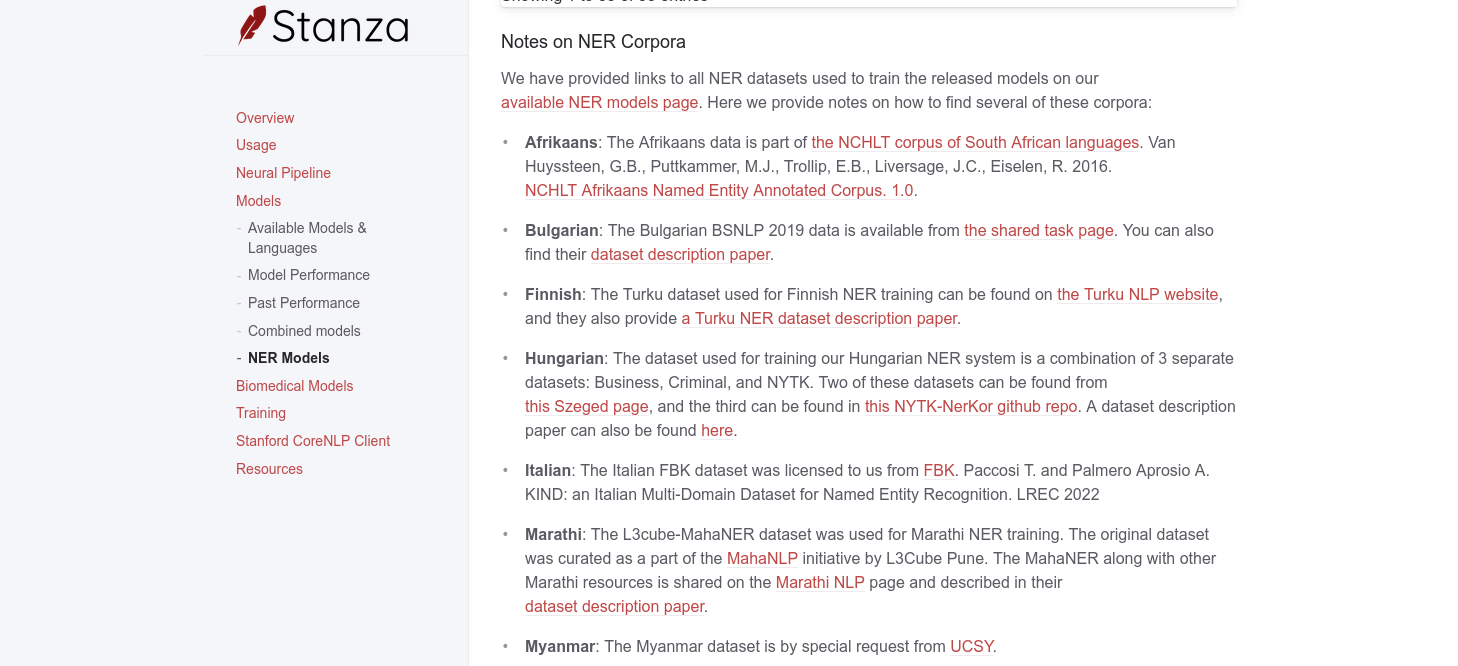

The Italian model has been trained by the `Stanza` team on our same dataset :'(

### BERTs

This project aims to fine-tune pre-trained BERT models for named-entity recognition (NER) on Italian Data. 

The Dataset is organized in 3 splits: train, test, and validation taken for the BIO-tagged version of our `MERGED_train.tsv` and `MERGED_test.tsv` files. The sentences are cased and contain punctuation. The **entity categories** are  encoded as illustrated below:  
```
{'O': 0, 'B-PER': 1, 'I-PER': 2, 'B-ORG': 3, 'I-ORG': 4, 'B-LOC': 5, 'I-LOC': 6}
```

We used the following pretrained `BERT` models to fine-tune on our dataset:
  - [bert-base-multilingual-cased](https://huggingface.co/bert-base-multilingual-cased) pre-trained on 104 languages with the largest Wikipedia Dataset.  
  The model evaluated on the Italian Content Annotation Bank (I-CAB) for the NER task scored an average accuracy of 84.69 ± 0.51. [Report by Schweter (2020)](https://github.com/stefan-it/italian-bertelectra)
  - [bert-base-italian-cased](https://huggingface.co/dbmdz/bert-base-italian-cased) pre-trained on Wikipedia texts and OPUS corpora for a total Corpus of the size of 13GB. On the same evaluation task of the multilingual version this model reached an average accuracy of 85.96 (± 0.23). 

Both models are case-sensitive. 

#### Dataset load

In [ ]:
!nvidia-smi

/bin/bash: riga 1: nvidia-smi: comando non trovato


In [ ]:
# ner tags in the Dataset
label_list = ['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC']
labels_vocab = {'O': 0, 'B-PER': 1, 'I-PER': 2, 'B-ORG': 3, 'I-ORG': 4, 'B-LOC': 5, 'I-LOC': 6}
labels_vocab_reverse = {v:k for k,v in labels_vocab.items()}


In [ ]:
def read_for_sentence_and_split(file_path):
    """splits a file into list in which each element reprefents a sentence and 
    is composed by a list of the words in the sentence and their tag"""
    with open(file_path, 'r', encoding='UTF-8') as f:
        lines = f.readlines()
        

    lines = [line.strip() for line in lines]
    sentences = {"tokens":[], "ner_tags":[]}
    tmp1, tmp2 = [], []
    for line in lines:
        if line == '':
            sentences["tokens"].append(tmp1)
            sentences["ner_tags"].append(tmp2)
            tmp1, tmp2 = [], []
        else:
            word, tag = line.split()
            tmp1.append(word)
            tmp2.append(labels_vocab[tag])

    index = np.random.permutation(len(sentences["tokens"]))
    sentences["tokens"] = [sentences["tokens"][i] for i in index]
    sentences["ner_tags"] = [sentences["ner_tags"][i] for i in index]
    
    return Dataset.from_dict(sentences)

In [ ]:
datasets = dict()
np.random.seed(0)
datasets['train_it'] = read_for_sentence_and_split('dataset/BIO-tagged-version/MERGED_train.tsv')
datasets['test_it'] = read_for_sentence_and_split('dataset/BIO-tagged-version/MERGED_test.tsv')

datasets


{'train_it': Dataset({
     features: ['tokens', 'ner_tags'],
     num_rows: 37765
 }),
 'test_it': Dataset({
     features: ['tokens', 'ner_tags'],
     num_rows: 7385
 })}

In [ ]:
print(datasets['train_it']['tokens'][0])

In [ ]:
print(datasets['train_it']['ner_tags'][0])

Let's give an example on how data are prepared:
- import tokenizer from the pre-trained model
- input a sentence
- output: the encoded sentence as input_ids, token_type_ids, attention mask

<a id="s1"></a> 

In [ ]:
mult_tokenizer = AutoTokenizer.from_pretrained("bert-base-multilingual-cased") 
ita_tokenizer = AutoTokenizer.from_pretrained("dbmdz/bert-base-italian-cased") 

In [ ]:
print( "multilingual bert", mult_tokenizer(datasets["train_it"]['tokens'][0], is_split_into_words=True) )
print("italian bert", ita_tokenizer(datasets["train_it"]['tokens'][0], is_split_into_words=True) )

multilingual bert {'input_ids': [101, 10109, 12870, 10228, 10119, 12596, 36084, 12037, 12318, 10120, 12318, 41244, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}
italian bert {'input_ids': [102, 146, 984, 278, 141, 1605, 3446, 340, 882, 120, 882, 17523, 103], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [ ]:
example = datasets["train_it"][0]
tokenized_input = mult_tokenizer(example["tokens"], is_split_into_words=True)
tokens = mult_tokenizer.convert_ids_to_tokens(tokenized_input["input_ids"])

print("multilingual bert tokenizer: \n", example["tokens"])
print(tokens)
print(tokenized_input.word_ids())

word_ids = tokenized_input.word_ids()
aligned_labels = [-100 if i is None else example["ner_tags"][i] for i in word_ids] 
print(len(aligned_labels), len(tokenized_input["input_ids"]))    

multilingual bert tokenizer: 
 ['Fondatore', 'del', 'diritto', 'commerciale', 'è', 'considerato', 'il', 'giurista', 'cinquecentesco', 'anconitano', 'Benvenuto', 'Stracca', '.']
['[CLS]', 'Fonda', '##tore', 'del', 'diritto', 'commerciale', 'è', 'considerato', 'il', 'gi', '##uris', '##ta', 'cinque', '##centes', '##co', 'an', '##con', '##itano', 'Ben', '##venu', '##to', 'St', '##rac', '##ca', '.', '[SEP]']
[None, 0, 0, 1, 2, 3, 4, 5, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, None]
26 26


In [ ]:
example = datasets["train_it"][0]
tokenized_input = ita_tokenizer(example["tokens"], is_split_into_words=True)
tokens = ita_tokenizer.convert_ids_to_tokens(tokenized_input["input_ids"])

print("italian bert tokenizer: \n", example["tokens"])
print(tokens)
print(tokenized_input.word_ids())

word_ids = tokenized_input.word_ids()
aligned_labels = [-100 if i is None else example["ner_tags"][i] for i in word_ids]
print(len(aligned_labels), len(tokenized_input["input_ids"]))

italian bert tokenizer: 
 ['Fondatore', 'del', 'diritto', 'commerciale', 'è', 'considerato', 'il', 'giurista', 'cinquecentesco', 'anconitano', 'Benvenuto', 'Stracca', '.']
['[CLS]', 'Fonda', '##tore', 'del', 'diritto', 'commerciale', 'è', 'considerato', 'il', 'giuris', '##ta', 'cinque', '##centesco', 'an', '##coni', '##tano', 'Benvenuto', 'Stra', '##cca', '.', '[SEP]']
[None, 0, 0, 1, 2, 3, 4, 5, 6, 7, 7, 8, 8, 9, 9, 9, 10, 11, 11, 12, None]
21 21


BERT WordPiece tokenization:  
The word piecies are converted into their corresponding IDs, and special tokens are added. 

Notice the difference of how the two models tokenize the sentence: 26 tokens (multilingual) vs 21 tokens (italian).

ex. word : cinquecentesco
- multilingual: cinque', '##centes', '##co',
- italian: 'cinque', '##centesco',

During data preprocessing we align labels and token_ids: set special tokens labels to - 100 (index ignored by PyTorch), the labels of all other tokens are set to the label of the word they come from.

#### Data Preparation

Let's prepare the data to fine-tune the pre-trained model.

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("dbmdz/bert-base-italian-cased") 

In [ ]:
print("vocabulary size: ", len(tokenizer.vocab))

In [ ]:
label_all_tokens = True

def tokenize_and_align_labels(examples, tokenizer=tokenizer):  #set the tokenizer
    tokenized_inputs = tokenizer(examples["tokens"], truncation=True, is_split_into_words=True)
    
    labels = []
    for i, label in enumerate(examples["ner_tags"]):
        word_ids = tokenized_inputs.word_ids(batch_index=i)
        previous_word_idx = None
        label_ids = []
        for word_idx in word_ids:
            # Special tokens have a word id that is None. We set the label to -100 so they are automatically
            # ignored in the loss function.
            if word_idx is None:
                label_ids.append(-100)
            # We set the label for the first token of each word.
            elif word_idx != previous_word_idx:
                label_ids.append(label[word_idx])
            # For the other tokens in a word, we set the label to either the current label or -100, depending on
            # the label_all_tokens flag.
            else:
                label_ids.append(label[word_idx] if label_all_tokens else -100)
            previous_word_idx = word_idx

        labels.append(label_ids)

    tokenized_inputs["labels"] = labels
    return tokenized_inputs

In [ ]:
tokenize_and_align_labels(datasets['train_it'][:1])

{'input_ids': [[102, 2141, 2052, 5397, 179, 4393, 8035, 141, 1553, 5241, 30561, 3827, 111, 1953, 3251, 593, 162, 17852, 1307, 417, 175, 6420, 1307, 21079, 207, 955, 677, 13741, 162, 5272, 298, 1553, 202, 179, 202, 158, 24645, 334, 2299, 3606, 9962, 146, 7959, 157, 284, 15331, 285, 1023, 163, 284, 697, 103], [102, 329, 1912, 14323, 212, 529, 710, 482, 14930, 2251, 1307, 1105, 134, 4913, 136, 1953, 13270, 4701, 29736, 30876, 126, 136, 23224, 30876, 1365, 5106, 116, 273, 28254, 697, 103], [102, 654, 288, 1030, 141, 1835, 1259, 120, 4685, 126, 120, 11279, 3785, 3035, 1307, 9388, 273, 13090, 2987, 483, 8356, 348, 30895, 208, 697, 103]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attent

In [ ]:
train_dataset = Dataset.from_dict(datasets['train_it'][:int(len(datasets['train_it']) * 0.8)])
val_dataset = Dataset.from_dict(datasets['train_it'][int(len(datasets['train_it']) * 0.8):])
test_dataset = datasets['test_it']

train_tokenized = train_dataset.map(tokenize_and_align_labels, batched=True)
val_tokenized = val_dataset.map(tokenize_and_align_labels, batched=True)
test_tokenized = test_dataset.map(tokenize_and_align_labels, batched=True)

Loading cached processed dataset at /home/leonardo/.cache/huggingface/datasets/Babelscape___parquet/Babelscape--wikineural-579d1dc98d2a6b93/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-88998d06b5d85230.arrow
Loading cached processed dataset at /home/leonardo/.cache/huggingface/datasets/Babelscape___parquet/Babelscape--wikineural-579d1dc98d2a6b93/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-061b3536d4e40af4.arrow


#### Model load

The same procedure is applied to fine-tune both models, just change the model directory.

In [ ]:
model = AutoModelForTokenClassification.from_pretrained("dbmdz/bert-base-italian-cased", num_labels=len(label_list), label2id=labels_vocab, id2label=labels_vocab_reverse)

Some weights of the model checkpoint at dbmdz/bert-base-italian-cased were not used when initializing BertForTokenClassification: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at

In [ ]:
print(model)

In [ ]:
n_params = sum(param.numel() for param in model.parameters())
n_params

#### Training Arguments

The hyperparameters we decided to use are:
- learning rate: $2^{-5}$
- batch size: 16 (as advised by the official documentation), 
- number of epochs: we tried with 1 and 2 

In [ ]:
"""set here the model of choice"""
model_name = "dbmdz/bert-base-italian-cased"

args = TrainingArguments(
    "./content/bert-NER-base-ita",
    evaluation_strategy = "epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=4,
    weight_decay=0.01,
    push_to_hub=False,
    #eval_steps=10000,
    #save_steps=10000,
    save_strategy= "epoch",
)

#### Tokenization

The model's tokenizer was imported [here](#s1).

Let's import the correct tokenizer according to the model we have chosen in the previous cells.

In [ ]:
tokenizer = ita_tokenizer

#### Data collator

This object batches the processed samples together, and apply padding (to obtain the same size).

In [ ]:
data_collator = DataCollatorForTokenClassification(tokenizer)

#### [seqeval](https://huggingface.co/spaces/evaluate-metric/seqeval) metric

In [ ]:
metric = load_metric("seqeval")

labels = [label_list[i] for i in example["ner_tags"]]
metric.compute(predictions=[labels], references=[labels])

this function will post-process the output and measure the accuracy. 
- convert the predicted index of each token to a string of labels. 
- pass to the metric the list of predicted labels and the ground truth. The output of the metric is: 
  - accuracy 
  - precision 
  - recall
  - f1 score (harmonic mean of the precision and recall)



In [ ]:
def compute_metrics(p):
    predictions, labels = p
    predictions = np.argmax(predictions, axis=2)

    # Remove ignored index (special tokens)
    true_predictions = [
        [label_list[p] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]
    true_labels = [
        [label_list[l] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]

    results = metric.compute(predictions=true_predictions, references=true_labels)
    return {
        "precision": results["overall_precision"],
        "recall": results["overall_recall"],
        "f1": results["overall_f1"],
        "accuracy": results["overall_accuracy"],
    }

#### Trainer

In [ ]:
trainer = Trainer(
    model,
    args,
    train_dataset=train_tokenized,
    eval_dataset=val_tokenized,
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

#### Unfitted model performances

In [ ]:
trainer.evaluate()

In [ ]:
predictions, labels, _ = trainer.predict(test_tokenized)
predictions = np.argmax(predictions, axis=2)

# Remove ignored index (special tokens)
true_predictions = [
    [label_list[p] for (p, l) in zip(prediction, label) if l != -100]
    for prediction, label in zip(predictions, labels)
]
true_labels = [
    [label_list[l] for (p, l) in zip(prediction, label) if l != -100]
    for prediction, label in zip(predictions, labels)
]

results = metric.compute(predictions=true_predictions, references=true_labels)
results

#### alBERTo model training

In [ ]:
# (if the training stops you can restarted from the last checkpoint, uncomment the line)
trainer.train()
#trainer.train(resume_from_checkpoint = True)

#### alBERTo performances evaluation

In this section we will perform the following tasks:
- test the model on the test set
- compute precision, recall, f1 for each category

In [ ]:
trainer.evaluate()

In [ ]:
predictions, labels, _ = trainer.predict(test_tokenized)
predictions = np.argmax(predictions, axis=2)

# Remove ignored index (special tokens)
true_predictions = [
    [label_list[p] for (p, l) in zip(prediction, label) if l != -100]
    for prediction, label in zip(predictions, labels)
]
true_labels = [
    [label_list[l] for (p, l) in zip(prediction, label) if l != -100]
    for prediction, label in zip(predictions, labels)
]

results = metric.compute(predictions=true_predictions, references=true_labels)
results

In [ ]:
trainer.save_model("/content/bert_wn")

In [ ]:
print(classification_report(list(flatten(true_labels)), list(flatten(true_predictions))))

              precision    recall  f1-score   support

       B-LOC       0.91      0.90      0.91      2023
       B-ORG       0.85      0.81      0.83      1741
       B-PER       0.93      0.96      0.94      1722
       I-LOC       0.83      0.84      0.83       675
       I-ORG       0.82      0.85      0.84      1086
       I-PER       0.97      0.99      0.98      1500
           O       0.99      0.99      0.99     71640

    accuracy                           0.98     80387
   macro avg       0.90      0.91      0.90     80387
weighted avg       0.98      0.98      0.98     80387



### Cross BERTs


To run the following cells you need to run the previous section.

Since it takes a lot to train a model, we fine-tuned BERT just on the merged dataset

In [ ]:
datasets = dict()
np.random.seed(0)
train_file = os.path.join(os.getcwd(), 'dataset/BIO-tagged-version/MERGED_train.tsv')
test_file = os.path.join(os.getcwd(), 'dataset/BIO-tagged-version/MERGED_test.tsv')
datasets['train_it'] = read_for_sentence_and_split(train_file)
datasets['test_it'] = read_for_sentence_and_split(test_file)

train_dataset = Dataset.from_dict(datasets['train_it'][:int(len(datasets['train_it']) * 0.8)])
val_dataset = Dataset.from_dict(datasets['train_it'][int(len(datasets['train_it']) * 0.8):])
test_dataset = datasets['test_it']

datasets

{'train_it': Dataset({
     features: ['tokens', 'ner_tags'],
     num_rows: 37765
 }),
 'test_it': Dataset({
     features: ['tokens', 'ner_tags'],
     num_rows: 7385
 })}

In [ ]:
def get_trainer(model_name):

  current_tokenizer= AutoTokenizer.from_pretrained(model_name) 
  data_collator = DataCollatorForTokenClassification(tokenizer)
  model = AutoModelForTokenClassification.from_pretrained(model_name, num_labels=len(label_list), label2id=labels_vocab, id2label=labels_vocab_reverse)

  train_tokenized = train_dataset.map(lambda example: tokenize_and_align_labels(example, current_tokenizer), batched=True)
  val_tokenized = val_dataset.map(lambda example: tokenize_and_align_labels(example, current_tokenizer), batched=True)
  test_tokenized = test_dataset.map(lambda example: tokenize_and_align_labels(example, current_tokenizer), batched=True)

  args = TrainingArguments(
      "./content/bert-NER-base-ita",
      evaluation_strategy = "epoch",
      learning_rate=2e-5,
      per_device_train_batch_size=16,
      per_device_eval_batch_size=16,
      num_train_epochs=3,
      weight_decay=0.01,
      push_to_hub=False,
      #eval_steps=10000,
      #save_steps=10000,
      save_strategy= "epoch",
  )

  trainer = Trainer(
      model,
      args,
      train_dataset=train_tokenized,
      eval_dataset=val_tokenized,
      data_collator=data_collator,
      tokenizer=tokenizer,
      compute_metrics=compute_metrics
  )

  return trainer, test_tokenized

def get_results(trainer, test_tokenized):
  predictions, labels, _ = trainer.predict(test_tokenized)
  predictions = np.argmax(predictions, axis=2)

  # Remove ignored index (special tokens)
  true_predictions = [
      [label_list[p] for (p, l) in zip(prediction, label) if l != -100]
      for prediction, label in zip(predictions, labels)
  ]
  true_labels = [
      [label_list[l] for (p, l) in zip(prediction, label) if l != -100]
      for prediction, label in zip(predictions, labels)
  ]

  results = metric.compute(predictions=true_predictions, references=true_labels)
  return results, test_tokenized


In [ ]:
model_name = ["bert-base-multilingual-cased", "bert-base-cased"]

for model in model_name:
  print(f'Model used: {model}')
  if os.path.exists(os.path.join(os.getcwd(), f"bert-models/{model}")):
    model_path = os.path.join(os.getcwd(), f"bert-models/{model}")
    trained_model = AutoModelForTokenClassification.from_pretrained(model_path, num_labels=len(label_list), label2id=labels_vocab, id2label=labels_vocab_reverse)
    tokenizer = AutoTokenizer.from_pretrained(model)
    data_collator = DataCollatorForTokenClassification(tokenizer)
    test_tokenized = test_dataset.map(lambda example: tokenize_and_align_labels(example, tokenizer), batched=True) 
    trainer = Trainer(model=trained_model, data_collator=data_collator, tokenizer=tokenizer)
  else:  
    trainer, test_tokenized = get_trainer(model)
    trainer.train()
    trainer.save_model("/content/"+model)

  print(get_results(trainer, test_tokenized))

Model used: bert-base-multilingual-cased


Map:   0%|          | 0/7385 [00:00<?, ? examples/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


({'LOC': {'precision': 0.877090724784592, 'recall': 0.9053099659952917, 'f1': 0.8909769597116747, 'number': 3823}, 'ORG': {'precision': 0.7885326757090012, 'recall': 0.7885326757090012, 'f1': 0.7885326757090012, 'number': 3244}, 'PER': {'precision': 0.9310998735777497, 'recall': 0.9084181313598519, 'f1': 0.9196191665366006, 'number': 3243}, 'overall_precision': 0.8658489472667568, 'overall_recall': 0.8695441319107663, 'overall_f1': 0.8676926054974836, 'overall_accuracy': 0.9892845170711784}, Dataset({
    features: ['tokens', 'ner_tags', 'input_ids', 'token_type_ids', 'attention_mask', 'labels'],
    num_rows: 7385
}))
Model used: bert-base-cased


Map:   0%|          | 0/7385 [00:00<?, ? examples/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


({'LOC': {'precision': 0.8334873406024764, 'recall': 0.839851024208566, 'f1': 0.8366570819033484, 'number': 5370}, 'ORG': {'precision': 0.7411805197040097, 'recall': 0.7816696914700545, 'f1': 0.7608868474516387, 'number': 5510}, 'PER': {'precision': 0.8737887596899225, 'recall': 0.8637452107279694, 'f1': 0.8687379576107901, 'number': 4176}, 'overall_precision': 0.8093811074918567, 'overall_recall': 0.8251859723698194, 'overall_f1': 0.8172071301716767, 'overall_accuracy': 0.9859172460392255}, Dataset({
    features: ['tokens', 'ner_tags', 'input_ids', 'token_type_ids', 'attention_mask', 'labels'],
    num_rows: 7385
}))


### Small BERTs for Italian

In [ ]:
datasets = dict()
np.random.seed(0)
# change here the name of dataset
train_file = os.path.join(os.getcwd(), 'dataset/BIO-tagged-version/ADG_train.tsv')
test_file = os.path.join(os.getcwd(), 'dataset/BIO-tagged-version/ADG_test.tsv')
datasets['train_it'] = read_for_sentence_and_split(train_file)
datasets['test_it'] = read_for_sentence_and_split(test_file)

train_dataset = Dataset.from_dict(datasets['train_it'][:int(len(datasets['train_it']) * 0.8)])
val_dataset = Dataset.from_dict(datasets['train_it'][int(len(datasets['train_it']) * 0.8):])
test_dataset = datasets['test_it']

datasets

{'train_it': Dataset({
     features: ['tokens', 'ner_tags'],
     num_rows: 5147
 }),
 'test_it': Dataset({
     features: ['tokens', 'ner_tags'],
     num_rows: 1122
 })}

In [ ]:
model_name = "dbmdz/bert-base-italian-cased"
trainer, test_tokenized = get_trainer(model_name)
trainer.train()
# change here the name of the model to save
trainer.save_model(os.path.join(os.getcwd(), 'bert-models/bert-base-italian-cased-ADG'))
print(get_results(trainer, test_tokenized))

Some weights of the model checkpoint at dbmdz/bert-base-italian-cased were not used when initializing BertForTokenClassification: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at

Map:   0%|          | 0/4117 [00:00<?, ? examples/s]

Map:   0%|          | 0/1030 [00:00<?, ? examples/s]

Map:   0%|          | 0/1122 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,No log,0.047082,0.686842,0.794118,0.736595,0.985133
2,0.100900,0.036612,0.755471,0.805274,0.779578,0.988134


## Conclusions


**TODO**

Regarding the NER task, we basically tried two different approaches: one more classical which is the `CRF` and one more modern which is `BERT`.

CRF is a rather simple model that doesn't make use of a neural network but instead is a statistical approach that allows to take into consideration neighbouring words. This model showed acceptable performance considering that it is much less complex than BERT and takes less than a minute to be trained. In addition, adding more features it could be possible to improve even more this model.

On the other hand, BERT which makes use of transformers usually requires ten times more to train with respect to the previous approach and could probably improve having more training data to fine-tune the model.
In the majority of cases, BERT achieves better performance.

---
- Does it make sense to use a transformer for this task instead of CRF?
- Check the considerations based on the data/results we obtain